KURULUM & VERİ YÜKLEME



In [6]:
# Kütüphaneler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Görselleştirme ayarları
sns.set_style("whitegrid")
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (14, 6)
plt.rcParams['font.size'] = 11
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10

# Renk paleti
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A', '#98D8C8', '#F7DC6F']

print("✅ Kütüphaneler yüklendi!")

✅ Kütüphaneler yüklendi!


In [7]:
# Google Drive bağlantısı
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd

# Temiz veriyi yükle
data_path = '/content/drive/MyDrive/Data-Analyst-Portfolio/Project-1-Supply-Chain/data/processed/supply_chain_clean.csv'

df = pd.read_csv(data_path)

print(f"✅ Veri yüklendi!")
print(f"📊 Boyut: {df.shape[0]:,} satır x {df.shape[1]:,} kolon")

Mounted at /content/drive
✅ Veri yüklendi!
📊 Boyut: 180,519 satır x 28 kolon


In [8]:
# Hızlı bakış
print("\n🔍 Veri Önizleme:")
df.head(3)


🔍 Veri Önizleme:


,order_id,order_date,actual_shipping_days,scheduled_shipping_days,delivery_status,customer_country,customer_city,customer_state,order_country,order_region,...,shipping_date,year,month,quarter,day_of_week,month_name,delay_days,is_delayed,on_time,delay_category
0,77202,2018-01-31 22:56:00,3,4,Advance shipping,Puerto Rico,Caguas,PR,Indonesia,Southeast Asia,...,2018-02-03 22:56:00,2018,1,1,2,January,-1,0,0,Zamanında
1,75939,2018-01-13 12:27:00,5,4,Late delivery,Puerto Rico,Caguas,PR,India,South Asia,...,2018-01-18 12:27:00,2018,1,1,5,January,1,1,0,1-3 Gün
2,75938,2018-01-13 12:06:00,4,4,Shipping on time,EE. UU.,San Jose,CA,India,South Asia,...,2018-01-17 12:06:00,2018,1,1,5,January,0,0,1,Zamanında


Gecikme (Delay) Dağılımı - Ana Metrik

In [9]:
# Gecikme istatistikleri
print("=" * 60)
print("⏱️  GECİKME ANALİZİ")
print("=" * 60)
print(f"Ortalama Gecikme: {df['delay_days'].mean():.2f} gün")
print(f"Medyan Gecikme: {df['delay_days'].median():.2f} gün")
print(f"Standart Sapma: {df['delay_days'].std():.2f} gün")
print(f"Minimum: {df['delay_days'].min():.0f} gün")
print(f"Maksimum: {df['delay_days'].max():.0f} gün")
print(f"\nGecikmeli Sipariş: {df['is_delayed'].sum():,} ({df['is_delayed'].mean():.1%})")
print(f"Zamanında Teslimat: {df['on_time'].sum():,} ({df['on_time'].mean():.1%})")

⏱️  GECİKME ANALİZİ
Ortalama Gecikme: 0.57 gün
Medyan Gecikme: 1.00 gün
Standart Sapma: 1.49 gün
Minimum: -2 gün
Maksimum: 4 gün

Gecikmeli Sipariş: 103,400 (57.3%)
Zamanında Teslimat: 32,196 (17.8%)


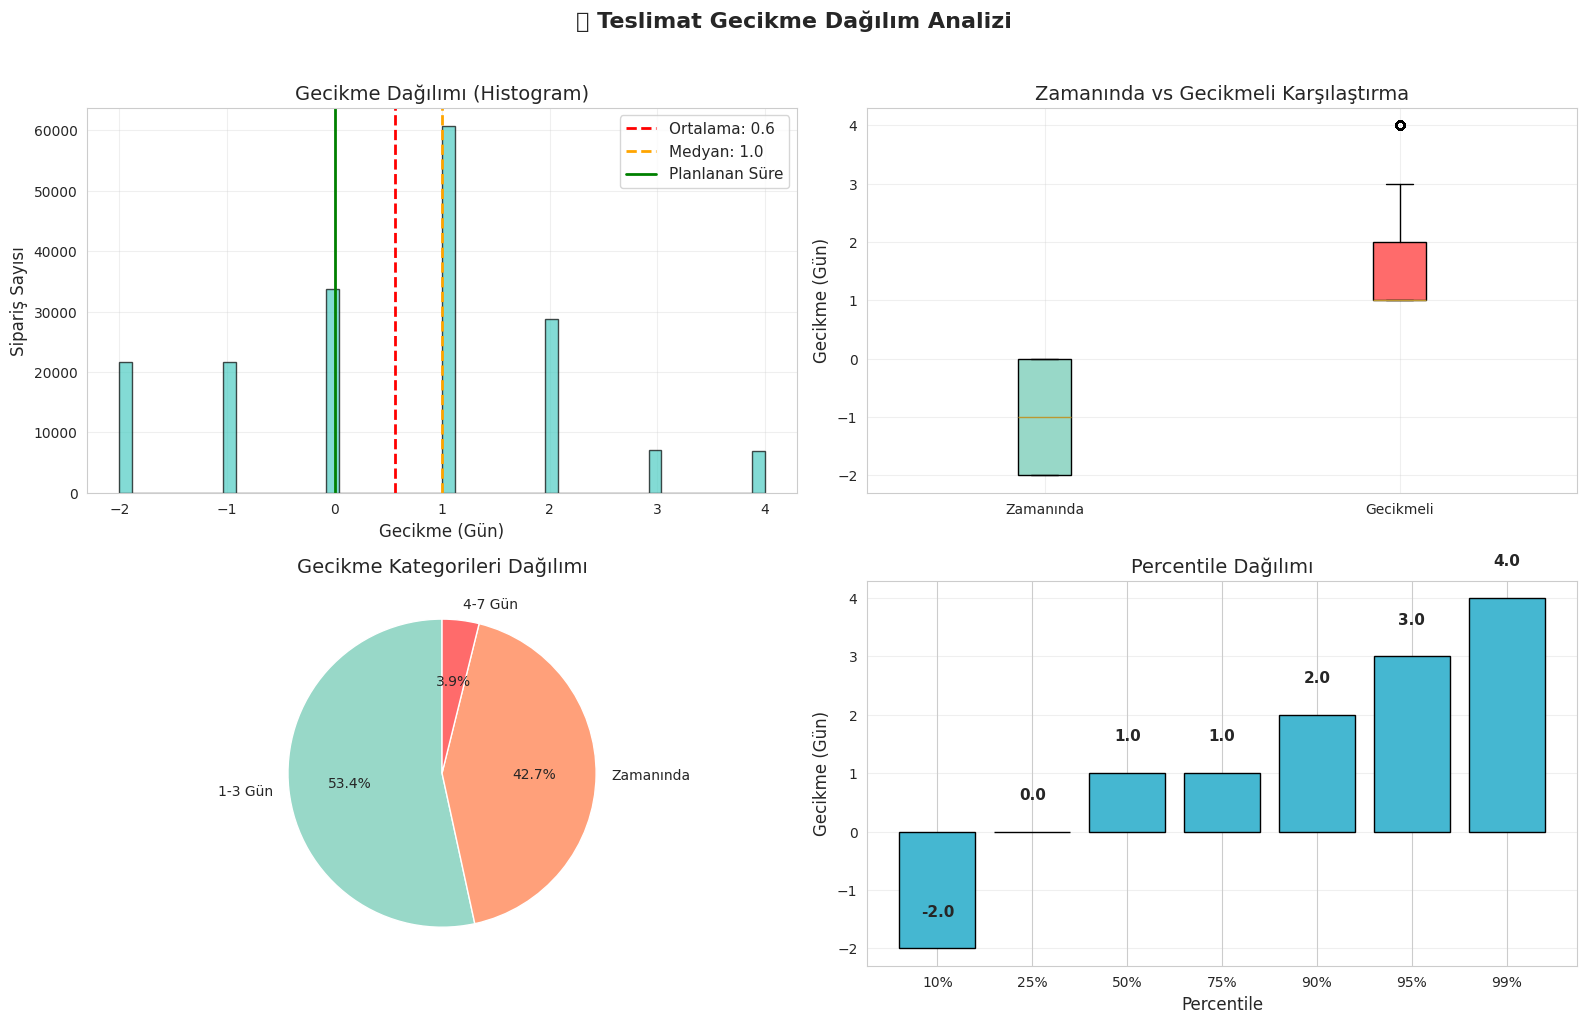


💡 İLK İÇGÖRÜ:
────────────────────────────────────────────────────────────
⚠️ Siparişlerin %57.3'i gecikmeli - hedef %15 altı olmalı
────────────────────────────────────────────────────────────


In [10]:
import matplotlib.pyplot as plt

# Gecikme dağılımı - Çoklu görselleştirme
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
fig.suptitle('📦 Teslimat Gecikme Dağılım Analizi', fontsize=16, fontweight='bold', y=1.02)

# 1. Histogram
axes[0, 0].hist(df['delay_days'], bins=50, color='#4ECDC4', edgecolor='black', alpha=0.7)
axes[0, 0].axvline(df['delay_days'].mean(), color='red', linestyle='--', linewidth=2, label=f'Ortalama: {df["delay_days"].mean():.1f}')
axes[0, 0].axvline(df['delay_days'].median(), color='orange', linestyle='--', linewidth=2, label=f'Medyan: {df["delay_days"].median():.1f}')
axes[0, 0].axvline(0, color='green', linestyle='-', linewidth=2, label='Planlanan Süre')
axes[0, 0].set_xlabel('Gecikme (Gün)')
axes[0, 0].set_ylabel('Sipariş Sayısı')
axes[0, 0].set_title('Gecikme Dağılımı (Histogram)')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# 2. Box Plot
box_data = [df[df['is_delayed']==0]['delay_days'],
            df[df['is_delayed']==1]['delay_days']]
bp = axes[0, 1].boxplot(box_data, tick_labels=['Zamanında', 'Gecikmeli'], patch_artist=True)
bp['boxes'][0].set_facecolor('#98D8C8')
bp['boxes'][1].set_facecolor('#FF6B6B')
axes[0, 1].set_ylabel('Gecikme (Gün)')
axes[0, 1].set_title('Zamanında vs Gecikmeli Karşılaştırma')
axes[0, 1].grid(True, alpha=0.3)

# 3. Gecikme Kategorileri - Pie Chart
delay_cat_counts = df['delay_category'].value_counts()
colors_pie = ['#98D8C8', '#FFA07A', '#FF6B6B', '#8B0000']
axes[1, 0].pie(delay_cat_counts, labels=delay_cat_counts.index, autopct='%1.1f%%',
               startangle=90, colors=colors_pie, textprops={'fontsize': 10})
axes[1, 0].set_title('Gecikme Kategorileri Dağılımı')

# 4. Percentile Analizi
percentiles = [10, 25, 50, 75, 90, 95, 99]
percentile_values = [df['delay_days'].quantile(p/100) for p in percentiles]
axes[1, 1].bar(range(len(percentiles)), percentile_values, color='#45B7D1', edgecolor='black')
axes[1, 1].set_xticks(range(len(percentiles)))
axes[1, 1].set_xticklabels([f'{p}%' for p in percentiles])
axes[1, 1].set_xlabel('Percentile')
axes[1, 1].set_ylabel('Gecikme (Gün)')
axes[1, 1].set_title('Percentile Dağılımı')
axes[1, 1].grid(True, alpha=0.3, axis='y')

# Değerleri grafiklerin üzerine ekle
for i, v in enumerate(percentile_values):
    axes[1, 1].text(i, v + 0.5, f'{v:.1f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.savefig('/content/drive/MyDrive/Data-Analyst-Portfolio/Project-1-Supply-Chain/dashboards/01_delay_distribution.png',
            dpi=300, bbox_inches='tight')
plt.show()

# İçgörü notu
print("\n💡 İLK İÇGÖRÜ:")
print("─" * 60)
if df['delay_days'].mean() > 2:
    print("⚠️ Ortalama gecikme 2 günün üzerinde - ciddi problem var!")
if df['is_delayed'].mean() > 0.3:
    print(f"⚠️ Siparişlerin %{df['is_delayed'].mean()*100:.1f}'i gecikmeli - hedef %15 altı olmalı")
print("─" * 60)

Satış Tutarı (Sales) Analizi


💰 SATIŞ TUTARI ANALİZİ
Toplam Satış: $36,784,735
Ortalama Sipariş Değeri: $203.77
Medyan Sipariş Değeri: $199.92
En Büyük Sipariş: $1,999.99
En Küçük Sipariş: $9.99


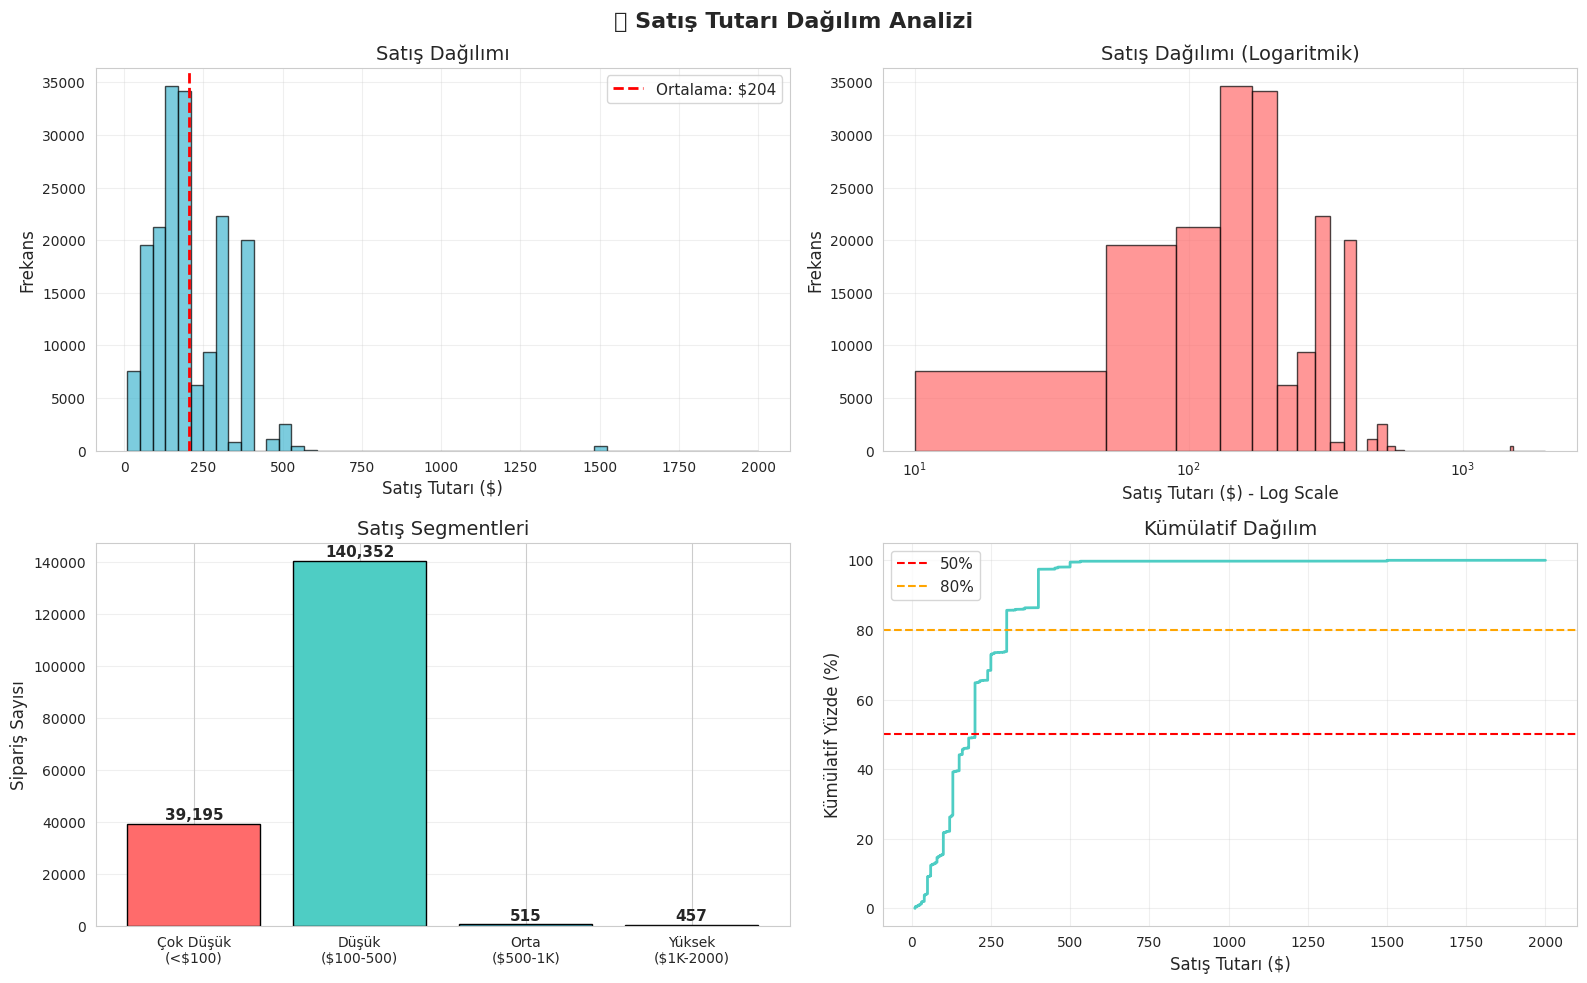


📊 Pareto Analizi:
Satışların %80'i, siparişlerin %19.9'inden geliyor


In [11]:
# Satış istatistikleri
print("\n" + "=" * 60)
print("💰 SATIŞ TUTARI ANALİZİ")
print("=" * 60)
print(f"Toplam Satış: ${df['sales'].sum():,.0f}")
print(f"Ortalama Sipariş Değeri: ${df['sales'].mean():,.2f}")
print(f"Medyan Sipariş Değeri: ${df['sales'].median():,.2f}")
print(f"En Büyük Sipariş: ${df['sales'].max():,.2f}")
print(f"En Küçük Sipariş: ${df['sales'].min():,.2f}")

# Renk paleti (Hata düzeltmesi için eklendi)
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A', '#98D8C8', '#F7DC6F']

# Görselleştirme
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
fig.suptitle('💰 Satış Tutarı Dağılım Analizi', fontsize=16, fontweight='bold')

# 1. Histogram
axes[0, 0].hist(df['sales'], bins=50, color='#45B7D1', edgecolor='black', alpha=0.7)
axes[0, 0].axvline(df['sales'].mean(), color='red', linestyle='--', linewidth=2,
                   label=f'Ortalama: ${df["sales"].mean():.0f}')
axes[0, 0].set_xlabel('Satış Tutarı ($)')
axes[0, 0].set_ylabel('Frekans')
axes[0, 0].set_title('Satış Dağılımı')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# 2. Log scale
axes[0, 1].hist(df['sales'], bins=50, color='#FF6B6B', edgecolor='black', alpha=0.7)
axes[0, 1].set_xscale('log')
axes[0, 1].set_xlabel('Satış Tutarı ($) - Log Scale')
axes[0, 1].set_ylabel('Frekans')
axes[0, 1].set_title('Satış Dağılımı (Logaritmik)')
axes[0, 1].grid(True, alpha=0.3)

# 3. Satış segmentleri
# Dynamically create sales_bins and sales_labels to ensure monotonicity and adapt to data range
max_sales_value = df['sales'].max()
sales_bins = [0, 100, 500, 1000]
sales_labels = ['Çok Düşük\n(<$100)', 'Düşük\n($100-500)', 'Orta\n($500-1K)']

if max_sales_value > 1000:
    # If max sales is above 1000, add the max sales as the last bin
    # and update the last label to reflect the actual range
    sales_bins.append(max_sales_value)
    sales_labels.append(f'Yüksek\n($1K-{max_sales_value:.0f})')
elif max_sales_value > 500: # If max sales is between 500 and 1000
    sales_bins = [0, 100, 500, max_sales_value]
    sales_labels = ['Çok Düşük\n(<$100)', 'Düşük\n($100-500)', f'Orta\n($500-{max_sales_value:.0f})']
elif max_sales_value > 100: # If max sales is between 100 and 500
    sales_bins = [0, 100, max_sales_value]
    sales_labels = ['Çok Düşük\n(<$100)', f'Düşük\n($100-{max_sales_value:.0f})']
else: # If max sales is 100 or less
    sales_bins = [0, max_sales_value]
    sales_labels = [f'Çok Düşük\n(<$100)']

df['sales_segment'] = pd.cut(df['sales'], bins=sales_bins, labels=sales_labels, right=True, include_lowest=True)
sales_seg_counts = df['sales_segment'].value_counts().sort_index()

axes[1, 0].bar(range(len(sales_seg_counts)), sales_seg_counts.values,
               color=colors[:len(sales_seg_counts)], edgecolor='black') # Adjusted colors slice
axes[1, 0].set_xticks(range(len(sales_seg_counts)))
axes[1, 0].set_xticklabels(sales_seg_counts.index, rotation=0)
axes[1, 0].set_ylabel('Sipariş Sayısı')
axes[1, 0].set_title('Satış Segmentleri')
axes[1, 0].grid(True, alpha=0.3, axis='y')

# Değerleri ekle
for i, v in enumerate(sales_seg_counts.values):
    axes[1, 0].text(i, v + 500, f'{v:,}', ha='center', va='bottom', fontweight='bold')

# 4. Cumulative distribution
import numpy as np # Import numpy
sorted_sales = np.sort(df['sales'])
cumulative = np.arange(1, len(sorted_sales) + 1) / len(sorted_sales) * 100
axes[1, 1].plot(sorted_sales, cumulative, color='#4ECDC4', linewidth=2)
axes[1, 1].axhline(50, color='red', linestyle='--', label='50%')
axes[1, 1].axhline(80, color='orange', linestyle='--', label='80%')
axes[1, 1].set_xlabel('Satış Tutarı ($)')
axes[1, 1].set_ylabel('Kümülatif Yüzde (%)')
axes[1, 1].set_title('Kümülatif Dağılım')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('/content/drive/MyDrive/Data-Analyst-Portfolio/Project-1-Supply-Chain/dashboards/03_sales_distribution.png',
            dpi=300, bbox_inches='tight')
plt.show()

# Pareto Analizi (80/20 kuralı)
total_sales = df['sales'].sum()
cum_sales_pct = (df.groupby('order_id')['sales'].sum().sort_values(ascending=False).cumsum() / total_sales * 100)
orders_for_80pct = (cum_sales_pct <= 80).sum()
print(f"\n📊 Pareto Analizi:")
print(f"Satışların %80'i, siparişlerin %{orders_for_80pct/len(df)*100:.1f}'inden geliyor")

**KATEGORİK DEĞİŞKENLER - DAĞILIM ANALİZİ**

Teslimat Durumu (Delivery Status)


🚚 TESLİMAT DURUMU ANALİZİ
delivery_status
Late delivery        98977
Advance shipping     41592
Shipping on time     32196
Shipping canceled     7754
Name: count, dtype: int64

Toplam kategori sayısı: 4


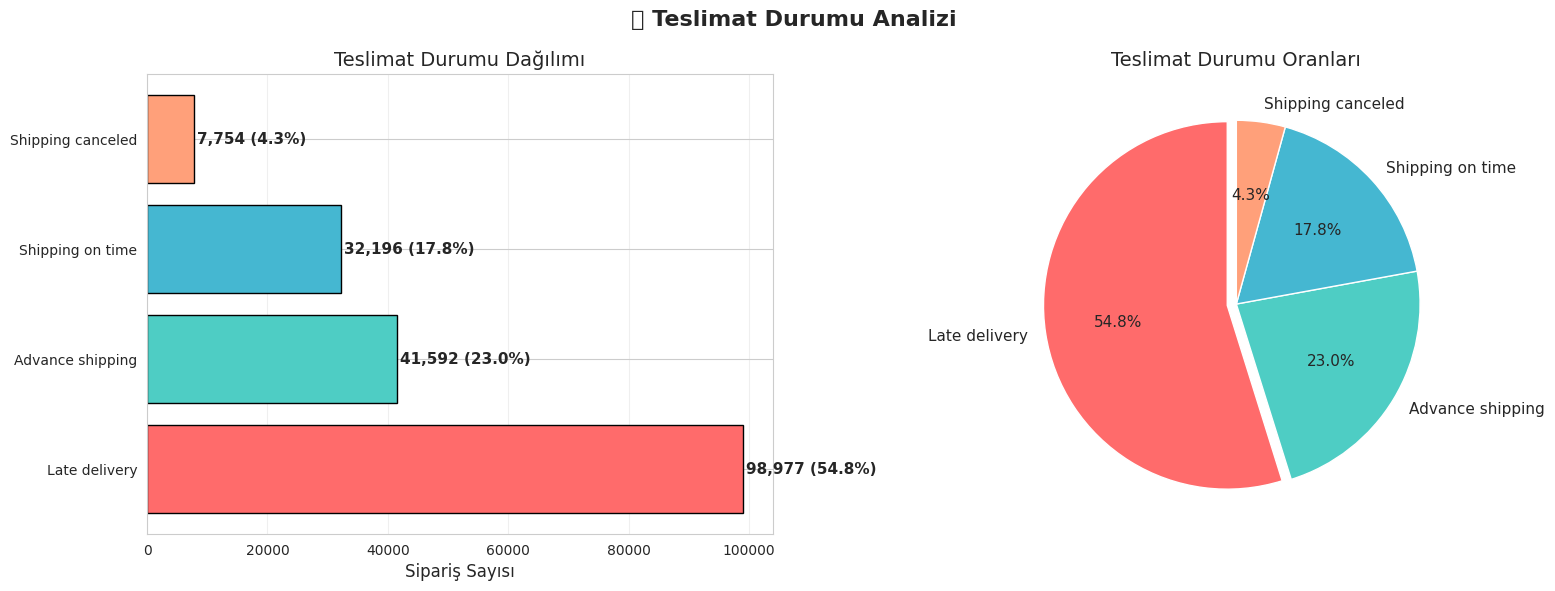

In [12]:
print("\n" + "=" * 60)
print("🚚 TESLİMAT DURUMU ANALİZİ")
print("=" * 60)

delivery_counts = df['delivery_status'].value_counts()
print(delivery_counts)
print(f"\nToplam kategori sayısı: {df['delivery_status'].nunique()}")

# Görselleştirme
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('🚚 Teslimat Durumu Analizi', fontsize=16, fontweight='bold')

# 1. Bar chart
axes[0].barh(delivery_counts.index, delivery_counts.values, color=colors[:len(delivery_counts)], edgecolor='black')
axes[0].set_xlabel('Sipariş Sayısı')
axes[0].set_title('Teslimat Durumu Dağılımı')
axes[0].grid(True, alpha=0.3, axis='x')

# Değerleri ekle
for i, v in enumerate(delivery_counts.values):
    axes[0].text(v + 500, i, f'{v:,} ({v/len(df)*100:.1f}%)',
                va='center', fontweight='bold')

# 2. Pie chart
explode = [0.05 if i == 0 else 0 for i in range(len(delivery_counts))]
axes[1].pie(delivery_counts, labels=delivery_counts.index, autopct='%1.1f%%',
           startangle=90, colors=colors[:len(delivery_counts)], explode=explode,
           textprops={'fontsize': 11})
axes[1].set_title('Teslimat Durumu Oranları')

plt.tight_layout()
plt.savefig('/content/drive/MyDrive/Data-Analyst-Portfolio/Project-1-Supply-Chain/dashboards/04_delivery_status.png',
            dpi=300, bbox_inches='tight')
plt.show()

Sevkiyat Modu (Shipping Mode)


✈️ SEVKİYAT MODU ANALİZİ
shipping_mode
Standard Class    107752
Second Class       35216
First Class        27814
Same Day            9737
Name: count, dtype: int64

📊 Sevkiyat Moduna Göre Performans:
                Ort_Gecikme  Gecikme_Oranı  Sipariş_Sayısı
shipping_mode                                             
Second Class           1.99           0.80           35216
First Class            1.00           1.00           27814
Same Day               0.48           0.48            9737
Standard Class        -0.00           0.40          107752


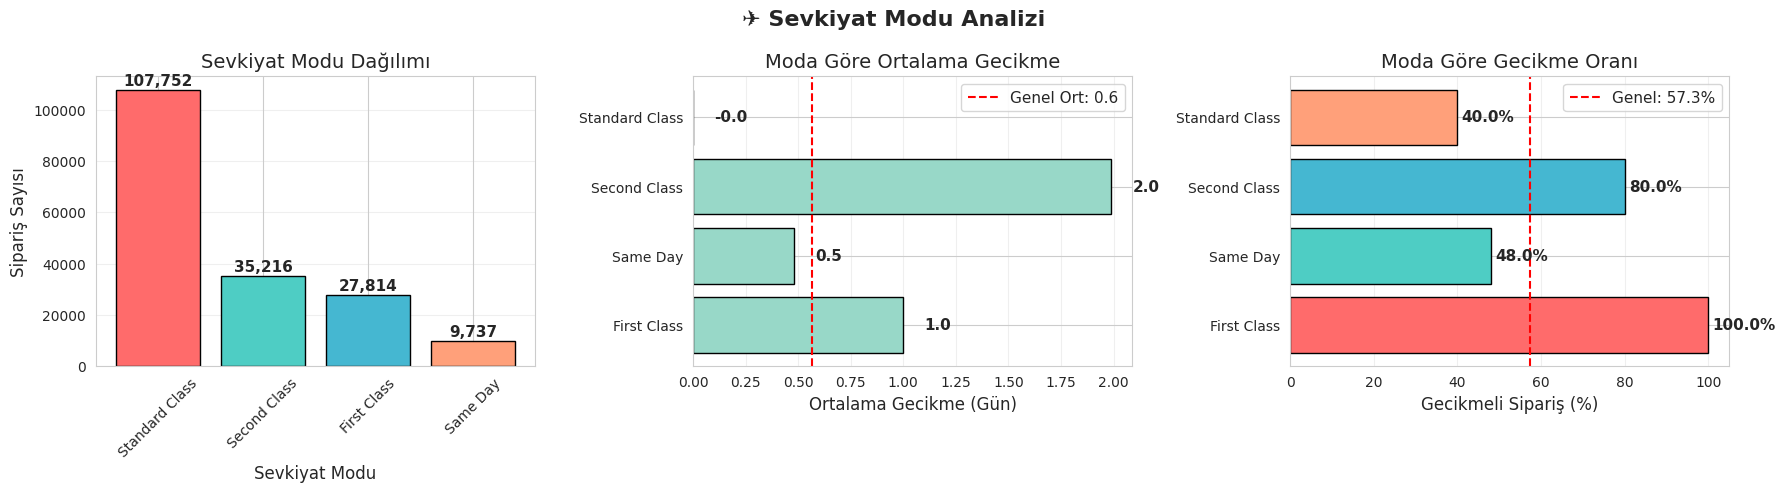


💡 İÇGÖRÜ:
────────────────────────────────────────────────────────────
✅ En iyi performans: Standard Class (Ort. -0.0 gün)
⚠️ En kötü performans: Second Class (Ort. 2.0 gün)
────────────────────────────────────────────────────────────


In [13]:
print("\n" + "=" * 60)
print("✈️ SEVKİYAT MODU ANALİZİ")
print("=" * 60)

shipping_counts = df['shipping_mode'].value_counts()
print(shipping_counts)

# Her modun ortalama gecikmesi
shipping_delay = df.groupby('shipping_mode').agg({
    'delay_days': 'mean',
    'is_delayed': 'mean',
    'order_id': 'count'
}).round(2)
shipping_delay.columns = ['Ort_Gecikme', 'Gecikme_Oranı', 'Sipariş_Sayısı']
print("\n📊 Sevkiyat Moduna Göre Performans:")
print(shipping_delay.sort_values('Ort_Gecikme', ascending=False))

# Görselleştirme
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('✈️ Sevkiyat Modu Analizi', fontsize=16, fontweight='bold')

# 1. Sipariş dağılımı
axes[0].bar(shipping_counts.index, shipping_counts.values,
           color=colors[:len(shipping_counts)], edgecolor='black')
axes[0].set_xlabel('Sevkiyat Modu')
axes[0].set_ylabel('Sipariş Sayısı')
axes[0].set_title('Sevkiyat Modu Dağılımı')
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(True, alpha=0.3, axis='y')

# Değerleri ekle
for i, (mode, count) in enumerate(shipping_counts.items()):
    axes[0].text(i, count + 500, f'{count:,}', ha='center', va='bottom', fontweight='bold')

# 2. Ortalama gecikme
axes[1].barh(shipping_delay.index, shipping_delay['Ort_Gecikme'],
            color=['#FF6B6B' if x > 2 else '#98D8C8' for x in shipping_delay['Ort_Gecikme']],
            edgecolor='black')
axes[1].set_xlabel('Ortalama Gecikme (Gün)')
axes[1].set_title('Moda Göre Ortalama Gecikme')
axes[1].axvline(df['delay_days'].mean(), color='red', linestyle='--',
               label=f'Genel Ort: {df["delay_days"].mean():.1f}')
axes[1].legend()
axes[1].grid(True, alpha=0.3, axis='x')

# Değerleri ekle
for i, (mode, row) in enumerate(shipping_delay.iterrows()):
    axes[1].text(row['Ort_Gecikme'] + 0.1, i, f'{row["Ort_Gecikme"]:.1f}',
                va='center', fontweight='bold')

# 3. Gecikme oranı
axes[2].barh(shipping_delay.index, shipping_delay['Gecikme_Oranı'] * 100,
            color=colors[:len(shipping_delay)], edgecolor='black')
axes[2].set_xlabel('Gecikmeli Sipariş (%)')
axes[2].set_title('Moda Göre Gecikme Oranı')
axes[2].axvline(df['is_delayed'].mean() * 100, color='red', linestyle='--',
               label=f'Genel: {df["is_delayed"].mean()*100:.1f}%')
axes[2].legend()
axes[2].grid(True, alpha=0.3, axis='x')

# Değerleri ekle
for i, (mode, row) in enumerate(shipping_delay.iterrows()):
    axes[2].text(row['Gecikme_Oranı'] * 100 + 1, i, f'{row["Gecikme_Oranı"]*100:.1f}%',
                va='center', fontweight='bold')

plt.tight_layout()
plt.savefig('/content/drive/MyDrive/Data-Analyst-Portfolio/Project-1-Supply-Chain/dashboards/05_shipping_mode.png',
            dpi=300, bbox_inches='tight')
plt.show()

# İçgörü
print("\n💡 İÇGÖRÜ:")
print("─" * 60)
best_mode = shipping_delay['Ort_Gecikme'].idxmin()
worst_mode = shipping_delay['Ort_Gecikme'].idxmax()
print(f"✅ En iyi performans: {best_mode} (Ort. {shipping_delay.loc[best_mode, 'Ort_Gecikme']:.1f} gün)")
print(f"⚠️ En kötü performans: {worst_mode} (Ort. {shipping_delay.loc[worst_mode, 'Ort_Gecikme']:.1f} gün)")
print("─" * 60)

Ürün Kategorisi (Category)


📦 ÜRÜN KATEGORİSİ ANALİZİ
Top 10 Kategori:
category
Cleats                  24551
Men's Footwear          22246
Women's Apparel         21035
Indoor/Outdoor Games    19298
Fishing                 17325
Water Sports            15540
Camping & Hiking        13729
Cardio Equipment        12487
Shop By Sport           10984
Electronics              3156
Name: count, dtype: int64

⚠️ En Çok Geciken 5 Kategori:
                   Ort_Gecikme  Sipariş_Sayısı
category                                      
Golf Bags & Carts         0.77              61
Soccer                    0.72             138
Pet Supplies              0.71             492
Boxing & MMA              0.67             423
Strength Training         0.67             111

✅ En Az Geciken 5 Kategori:
                  Ort_Gecikme  Sipariş_Sayısı
category                                     
Men's Golf Clubs         0.33             283
Baby                     0.44             207
Computers                0.45             442
CD

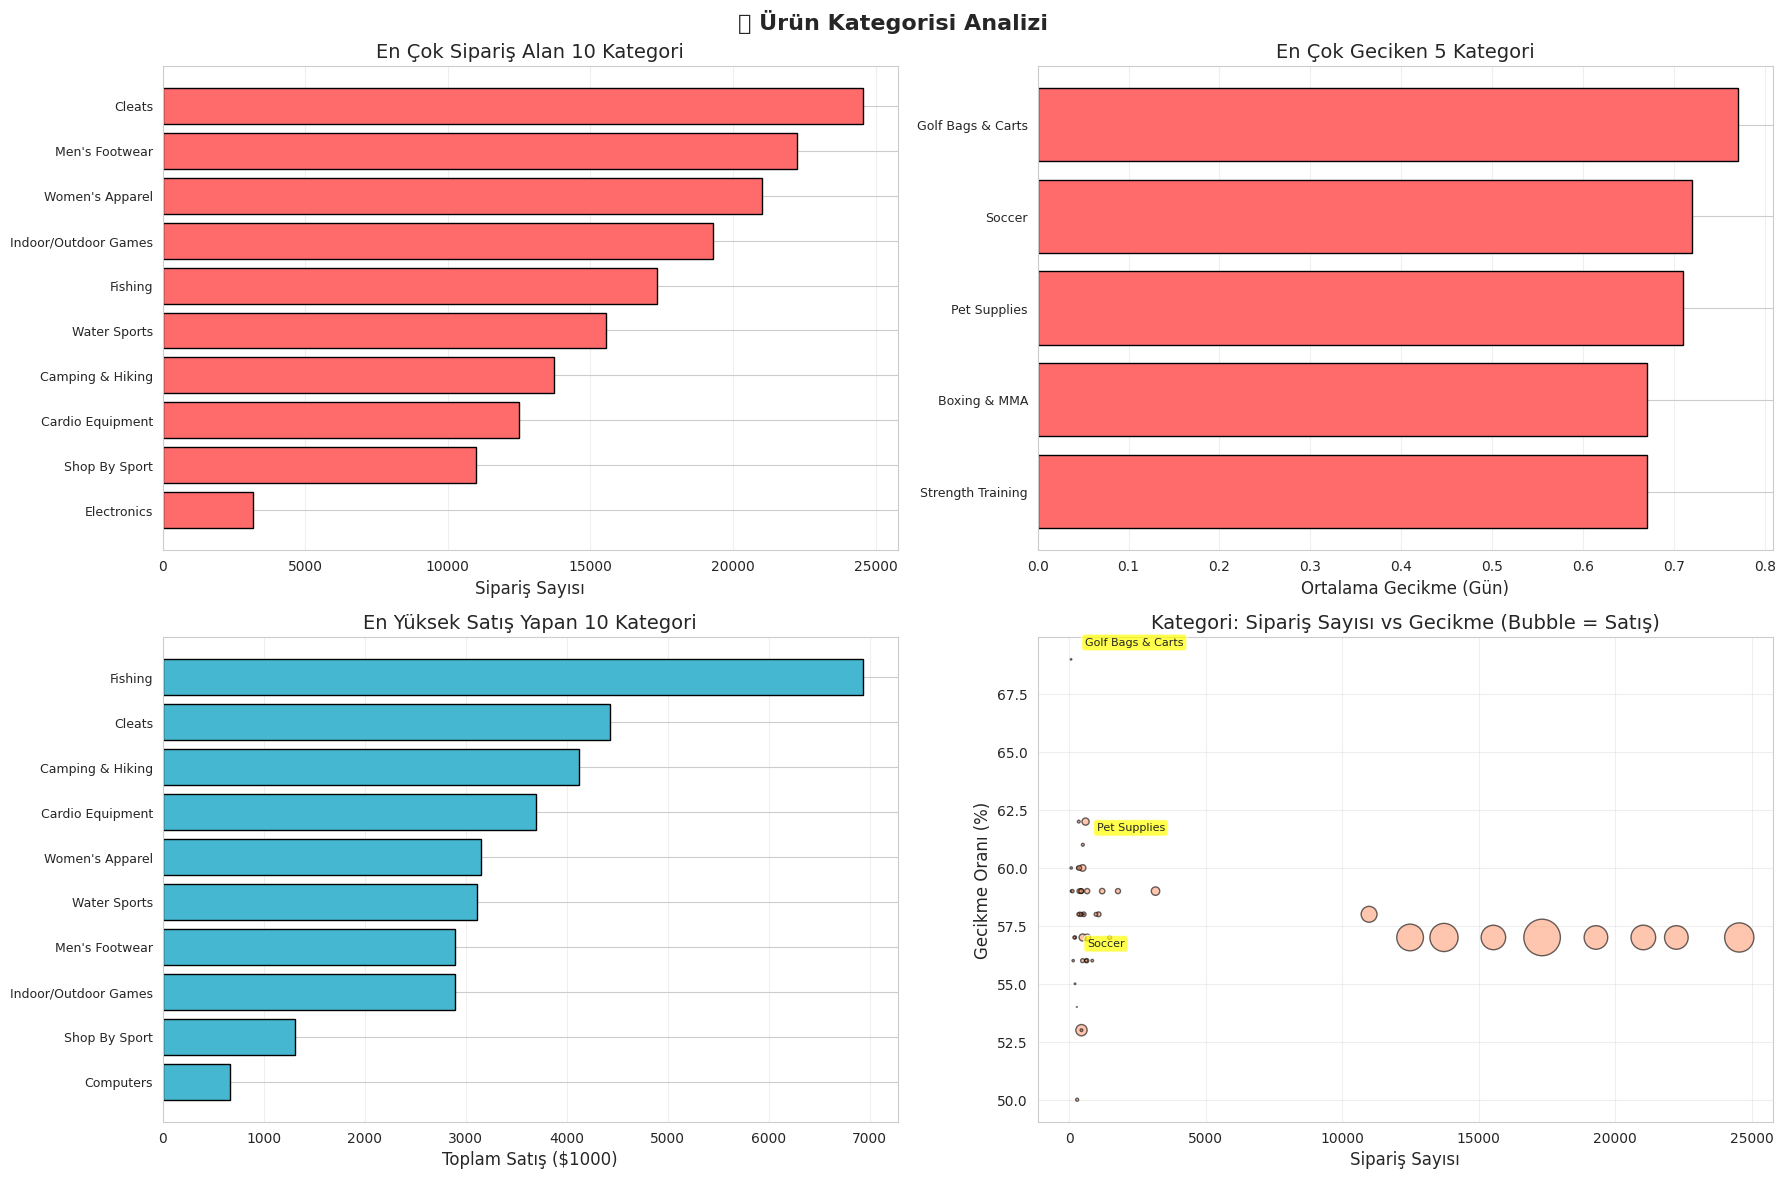

In [14]:
print("\n" + "=" * 60)
print("📦 ÜRÜN KATEGORİSİ ANALİZİ")
print("=" * 60)

# Top 10 kategori
top_categories = df['category'].value_counts().head(10)
print("Top 10 Kategori:")
print(top_categories)

# Kategoriye göre performans
category_performance = df.groupby('category').agg({
    'delay_days': 'mean',
    'is_delayed': 'mean',
    'sales': 'sum',
    'order_id': 'count'
}).round(2)
category_performance.columns = ['Ort_Gecikme', 'Gecikme_Oranı', 'Toplam_Satış', 'Sipariş_Sayısı']

# En sorunlu ve en iyi kategoriler
worst_categories = category_performance.nlargest(5, 'Ort_Gecikme')
best_categories = category_performance.nsmallest(5, 'Ort_Gecikme')

print("\n⚠️ En Çok Geciken 5 Kategori:")
print(worst_categories[['Ort_Gecikme', 'Sipariş_Sayısı']])

print("\n✅ En Az Geciken 5 Kategori:")
print(best_categories[['Ort_Gecikme', 'Sipariş_Sayısı']])

# Görselleştirme
fig, axes = plt.subplots(2, 2, figsize=(18, 12))
fig.suptitle('📦 Ürün Kategorisi Analizi', fontsize=16, fontweight='bold')

# 1. Top 10 kategori - sipariş sayısı
axes[0, 0].barh(range(len(top_categories)), top_categories.values, color=colors[0], edgecolor='black')
axes[0, 0].set_yticks(range(len(top_categories)))
axes[0, 0].set_yticklabels(top_categories.index, fontsize=9)
axes[0, 0].set_xlabel('Sipariş Sayısı')
axes[0, 0].set_title('En Çok Sipariş Alan 10 Kategori')
axes[0, 0].invert_yaxis()
axes[0, 0].grid(True, alpha=0.3, axis='x')

# 2. En çok geciken kategoriler
axes[0, 1].barh(range(len(worst_categories)), worst_categories['Ort_Gecikme'],
               color='#FF6B6B', edgecolor='black')
axes[0, 1].set_yticks(range(len(worst_categories)))
axes[0, 1].set_yticklabels(worst_categories.index, fontsize=9)
axes[0, 1].set_xlabel('Ortalama Gecikme (Gün)')
axes[0, 1].set_title('En Çok Geciken 5 Kategori')
axes[0, 1].invert_yaxis()
axes[0, 1].grid(True, alpha=0.3, axis='x')

# 3. Kategori bazlı satış
top_sales_cat = category_performance.nlargest(10, 'Toplam_Satış')
axes[1, 0].barh(range(len(top_sales_cat)), top_sales_cat['Toplam_Satış']/1000,
               color='#45B7D1', edgecolor='black')
axes[1, 0].set_yticks(range(len(top_sales_cat)))
axes[1, 0].set_yticklabels(top_sales_cat.index, fontsize=9)
axes[1, 0].set_xlabel('Toplam Satış ($1000)')
axes[1, 0].set_title('En Yüksek Satış Yapan 10 Kategori')
axes[1, 0].invert_yaxis()
axes[1, 0].grid(True, alpha=0.3, axis='x')

# 4. Gecikme oranı vs Sipariş sayısı (scatter)
# Sadece 50+ sipariş olan kategoriler
significant_cats = category_performance[category_performance['Sipariş_Sayısı'] >= 50]
axes[1, 1].scatter(significant_cats['Sipariş_Sayısı'],
                  significant_cats['Gecikme_Oranı'] * 100,
                  s=significant_cats['Toplam_Satış']/10000,  # Bubble size = satış
                  alpha=0.6, color='#FFA07A', edgecolor='black')
axes[1, 1].set_xlabel('Sipariş Sayısı')
axes[1, 1].set_ylabel('Gecikme Oranı (%)')
axes[1, 1].set_title('Kategori: Sipariş Sayısı vs Gecikme (Bubble = Satış)')
axes[1, 1].grid(True, alpha=0.3)

# En sorunlu 3'ü işaretle
for cat in worst_categories.head(3).index:
    if cat in significant_cats.index:
        row = significant_cats.loc[cat]
        axes[1, 1].annotate(cat,
                           xy=(row['Sipariş_Sayısı'], row['Gecikme_Oranı']*100),
                           xytext=(10, 10), textcoords='offset points',
                           fontsize=8, bbox=dict(boxstyle='round,pad=0.3',
                                                 facecolor='yellow', alpha=0.7))

plt.tight_layout()
plt.savefig('/content/drive/MyDrive/Data-Analyst-Portfolio/Project-1-Supply-Chain/dashboards/06_category_analysis.png',
            dpi=300, bbox_inches='tight')
plt.show()

**GECİKME vs SAYISAL DEĞİŞKENLER**

Korelasyon Analizi

In [15]:
print("=" * 60)
print("🔗 KORELASYON ANALİZİ")
print("=" * 60)

# Sayısal kolonları seç
numerical_cols = ['actual_shipping_days', 'scheduled_shipping_days',
                  'delay_days', 'quantity', 'sales', 'order_total',
                  'late_delivery_risk', 'is_delayed', 'on_time']

# Korelasyon matrisi
correlation_matrix = df[numerical_cols].corr()

# Sadece gecikme ile ilişkili olanlar
delay_correlation = correlation_matrix['delay_days'].sort_values(ascending=False)
print("\n📊 Gecikme ile Korelasyonlar:")
print(delay_correlation)

# Güçlü korelasyonlar (>0.3 veya <-0.3)
strong_corr = delay_correlation[(delay_correlation.abs() > 0.3) & (delay_correlation.index != 'delay_days')]
if len(strong_corr) > 0:
    print(f"\n⚡ Güçlü Korelasyonlar (|r| > 0.3):")
    for var, corr in strong_corr.items():
        direction = "pozitif" if corr > 0 else "negatif"
        print(f"  • {var}: {corr:.3f} ({direction})")
else:
    print("\n⚠️ Güçlü doğrusal korelasyon bulunamadı")

🔗 KORELASYON ANALİZİ

📊 Gecikme ile Korelasyonlar:
delay_days                 1.000000
is_delayed                 0.816184
late_delivery_risk         0.777644
actual_shipping_days       0.613475
quantity                   0.001813
sales                     -0.003695
order_total               -0.004028
on_time                   -0.176807
scheduled_shipping_days   -0.360037
Name: delay_days, dtype: float64

⚡ Güçlü Korelasyonlar (|r| > 0.3):
  • is_delayed: 0.816 (pozitif)
  • late_delivery_risk: 0.778 (pozitif)
  • actual_shipping_days: 0.613 (pozitif)
  • scheduled_shipping_days: -0.360 (negatif)


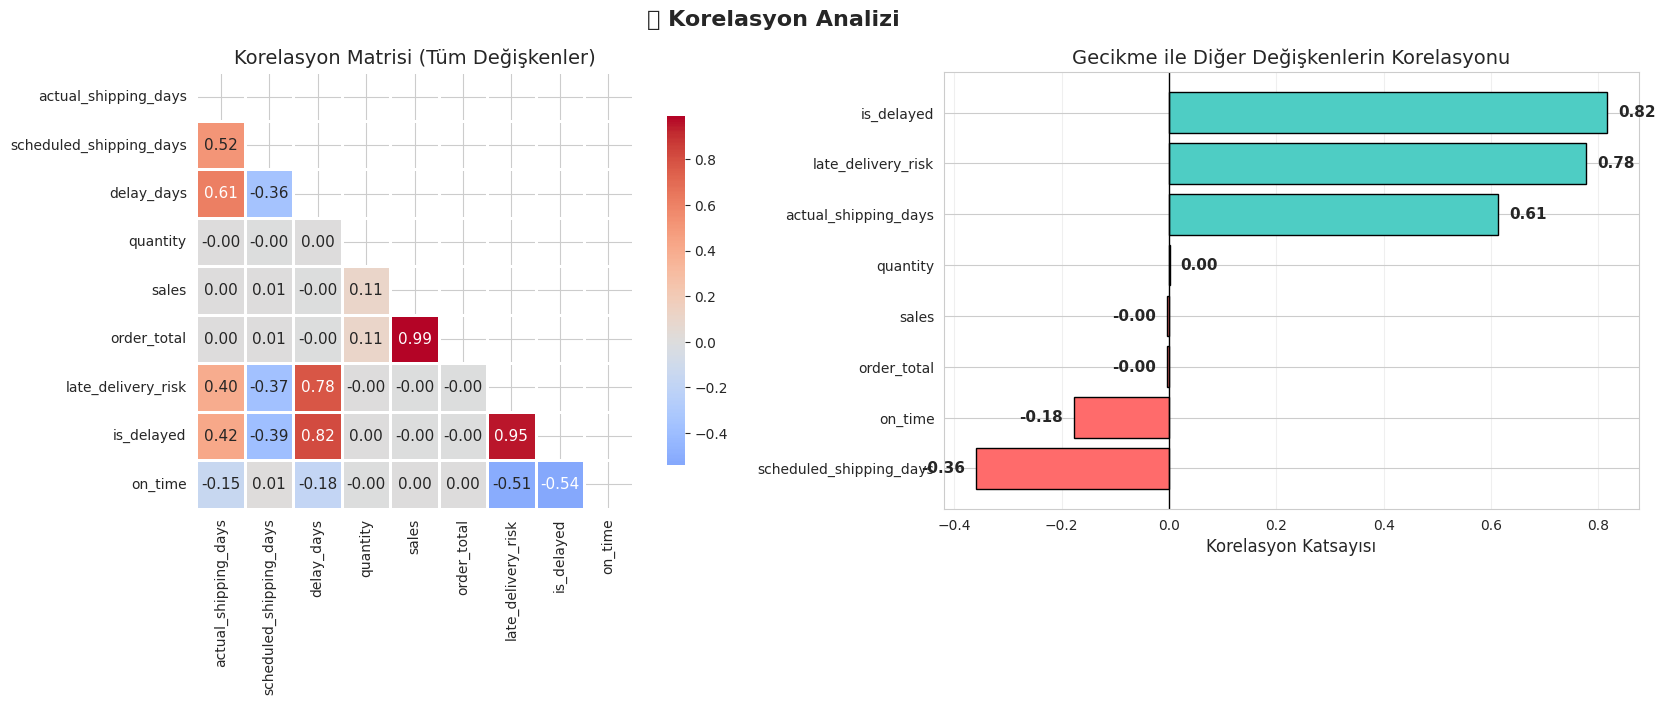


💡 İÇGÖRÜ:
────────────────────────────────────────────────────────────
• Korelasyon güçlü değilse → Gecikme çok faktörlü bir problem
• Kategorik değişkenler (ülke, mod) daha önemli olabilir
────────────────────────────────────────────────────────────


In [16]:
import seaborn as sns # seaborn kütüphanesini içeri aktar

# Görselleştirme
fig, axes = plt.subplots(1, 2, figsize=(18, 7))
fig.suptitle('🔗 Korelasyon Analizi', fontsize=16, fontweight='bold')

# 1. Tam korelasyon matrisi - heatmap
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, fmt='.2f',
            cmap='coolwarm', center=0, square=True, linewidths=1,
            cbar_kws={"shrink": 0.8}, ax=axes[0])
axes[0].set_title('Korelasyon Matrisi (Tüm Değişkenler)')

# 2. Sadece gecikme ile korelasyonlar - bar chart
delay_corr_sorted = delay_correlation.drop('delay_days').sort_values()
colors_corr = ['#FF6B6B' if x < 0 else '#4ECDC4' for x in delay_corr_sorted]

axes[1].barh(range(len(delay_corr_sorted)), delay_corr_sorted.values,
             color=colors_corr, edgecolor='black')
axes[1].set_yticks(range(len(delay_corr_sorted)))
axes[1].set_yticklabels(delay_corr_sorted.index)
axes[1].set_xlabel('Korelasyon Katsayısı')
axes[1].set_title('Gecikme ile Diğer Değişkenlerin Korelasyonu')
axes[1].axvline(0, color='black', linewidth=1)
axes[1].grid(True, alpha=0.3, axis='x')

# Değerleri ekle
for i, v in enumerate(delay_corr_sorted.values):
    axes[1].text(v + (0.02 if v > 0 else -0.02), i, f'{v:.2f}',
                va='center', ha='left' if v > 0 else 'right', fontweight='bold')

plt.tight_layout()
plt.savefig('/content/drive/MyDrive/Data-Analyst-Portfolio/Project-1-Supply-Chain/dashboards/07_correlation_analysis.png',
            dpi=300, bbox_inches='tight')
plt.show()

# İçgörü
print("\n💡 İÇGÖRÜ:")
print("─" * 60)
print("• Korelasyon güçlü değilse → Gecikme çok faktörlü bir problem")
print("• Kategorik değişkenler (ülke, mod) daha önemli olabilir")
print("─" * 60)

Gecikme vs Sipariş Miktarı


📦 SİPARİŞ BÜYÜKLÜĞÜ vs GECİKME
                  Ort_Gecikme  Medyan_Gecikme  Std_Sapma  Gecikme_Oranı  \
quantity_segment                                                          
1                        0.56             1.0       1.49           0.57   
2-3                      0.56             1.0       1.48           0.57   
4-5                      0.57             1.0       1.50           0.57   

                  Sipariş_Sayısı  
quantity_segment                  
1                          99134  
2-3                        40665  
4-5                        40720  


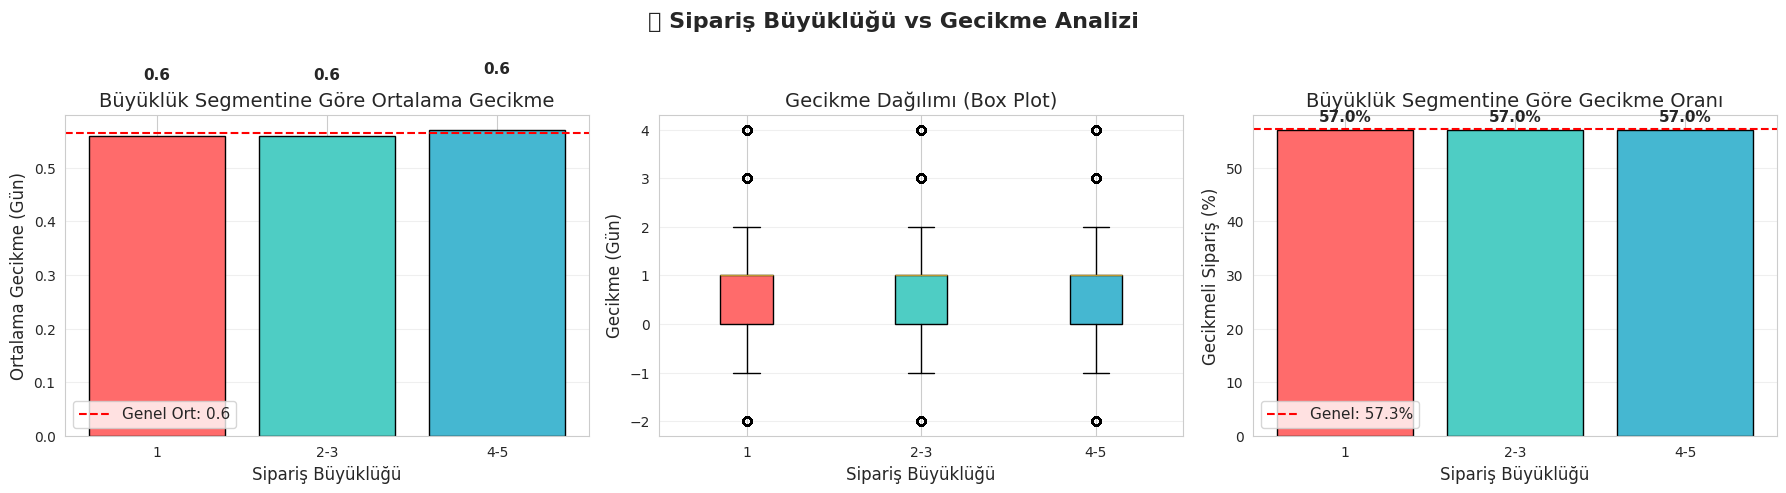


💡 İÇGÖRÜ:
────────────────────────────────────────────────────────────
✅ En iyi: 1 sipariş (0.6 gün)
⚠️ En kötü: 4-5 sipariş (0.6 gün)

📊 ANOVA Test: F-stat=0.39, p-value=0.6768
⚠️ İstatistiksel olarak anlamlı fark yok (p≥0.05)
────────────────────────────────────────────────────────────


In [17]:
# Sipariş büyüklüğüne göre gecikme
print("\n" + "=" * 60)
print("📦 SİPARİŞ BÜYÜKLÜĞÜ vs GECİKME")
print("=" * 60)

# Sipariş büyüklük segmentleri
max_quantity = df['quantity'].max()
base_bin_edges = [0, 1, 3, 5, 10, 50]
base_segment_labels = ['1', '2-3', '4-5', '6-10', '11-50']

quantity_bins = [0]
quantity_labels = []

for i in range(1, len(base_bin_edges)):
    current_edge = base_bin_edges[i]
    # If the current base edge is already greater than max_quantity, stop adding predefined bins
    if current_edge > max_quantity:
        break
    quantity_bins.append(current_edge)
    quantity_labels.append(base_segment_labels[i-1])

# Ensure the last bin is max_quantity if it's not already the highest
if quantity_bins[-1] < max_quantity:
    quantity_bins.append(max_quantity)
    # Adjust label for the newly created segment ending at max_quantity
    lower_label_bound = quantity_bins[-2] + 1
    if lower_label_bound == max_quantity:
        quantity_labels.append(str(max_quantity))
    else:
        quantity_labels.append(f'{lower_label_bound}-{max_quantity}')

df['quantity_segment'] = pd.cut(df['quantity'], bins=quantity_bins, labels=quantity_labels, right=True, include_lowest=True)

quantity_delay = df.groupby('quantity_segment').agg({
    'delay_days': ['mean', 'median', 'std'],
    'is_delayed': 'mean',
    'order_id': 'count'
}).round(2)
quantity_delay.columns = ['Ort_Gecikme', 'Medyan_Gecikme', 'Std_Sapma', 'Gecikme_Oranı', 'Sipariş_Sayısı']
print(quantity_delay)

# Görselleştirme
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('📦 Sipariş Büyüklüğü vs Gecikme Analizi', fontsize=16, fontweight='bold')

# 1. Ortalama gecikme
axes[0].bar(range(len(quantity_delay)), quantity_delay['Ort_Gecikme'],
           color=colors[:len(quantity_delay)], edgecolor='black')
axes[0].set_xticks(range(len(quantity_delay)))
axes[0].set_xticklabels(quantity_delay.index)
axes[0].set_xlabel('Sipariş Büyüklüğü')
axes[0].set_ylabel('Ortalama Gecikme (Gün)')
axes[0].set_title('Büyüklük Segmentine Göre Ortalama Gecikme')
axes[0].axhline(df['delay_days'].mean(), color='red', linestyle='--',
               label=f'Genel Ort: {df["delay_days"].mean():.1f}')
axes[0].legend()
axes[0].grid(True, alpha=0.3, axis='y')

for i, v in enumerate(quantity_delay['Ort_Gecikme']):
    axes[0].text(i, v + 0.1, f'{v:.1f}', ha='center', va='bottom', fontweight='bold')

# 2. Box plot
box_data = [df[df['quantity_segment']==seg]['delay_days'].dropna()
            for seg in quantity_delay.index]
bp = axes[1].boxplot(box_data, labels=quantity_delay.index, patch_artist=True)
for patch, color in zip(bp['boxes'], colors[:len(quantity_delay)]):
    patch.set_facecolor(color)
axes[1].set_xlabel('Sipariş Büyüklüğü')
axes[1].set_ylabel('Gecikme (Gün)')
axes[1].set_title('Gecikme Dağılımı (Box Plot)')
axes[1].grid(True, alpha=0.3, axis='y')

# 3. Gecikme oranı
axes[2].bar(range(len(quantity_delay)), quantity_delay['Gecikme_Oranı'] * 100,
           color=colors[:len(quantity_delay)], edgecolor='black')
axes[2].set_xticks(range(len(quantity_delay)))
axes[2].set_xticklabels(quantity_delay.index)
axes[2].set_xlabel('Sipariş Büyüklüğü')
axes[2].set_ylabel('Gecikmeli Sipariş (%)')
axes[2].set_title('Büyüklük Segmentine Göre Gecikme Oranı')
axes[2].axhline(df['is_delayed'].mean() * 100, color='red', linestyle='--',
               label=f'Genel: {df["is_delayed"].mean()*100:.1f}%')
axes[2].legend()
axes[2].grid(True, alpha=0.3, axis='y')

for i, v in enumerate(quantity_delay['Gecikme_Oranı'] * 100):
    axes[2].text(i, v + 1, f'{v:.1f}%', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.savefig('/content/drive/MyDrive/Data-Analyst-Portfolio/Project-1-Supply-Chain/dashboards/08_quantity_vs_delay.png',
            dpi=300, bbox_inches='tight')
plt.show()

# İçgörü
print("\n💡 İÇGÖRÜ:")
print("─" * 60)
best_segment = quantity_delay['Ort_Gecikme'].idxmin()
worst_segment = quantity_delay['Ort_Gecikme'].idxmax()
print(f"✅ En iyi: {best_segment} sipariş ({quantity_delay.loc[best_segment, 'Ort_Gecikme']:.1f} gün)")
print(f"⚠️ En kötü: {worst_segment} sipariş ({quantity_delay.loc[worst_segment, 'Ort_Gecikme']:.1f} gün)")

# ANOVA testi (istatistiksel anlamlılık)
from scipy import stats
groups = [df[df['quantity_segment']==seg]['delay_days'].dropna() for seg in quantity_delay.index]
f_stat, p_value = stats.f_oneway(*groups)
print(f"\n📊 ANOVA Test: F-stat={f_stat:.2f}, p-value={p_value:.4f}")
if p_value < 0.05:
    print("✅ Sipariş büyüklüğü gecikmeyi anlamlı şekilde etkiliyor (p<0.05)")
else:
    print("⚠️ İstatistiksel olarak anlamlı fark yok (p≥0.05)")
print("─" * 60)

Gecikme vs Satış Tutarı


💰 SATIŞ TUTARI vs GECİKME
                    Ort_Gecikme  Medyan  Gecikme_Oranı  Sipariş_Sayısı
sales_segment                                                         
Çok Düşük\n(<$100)         0.57     1.0           0.58           39195
Düşük\n($100-500)          0.56     1.0           0.57          140352
Orta\n($500-1K)            0.56     1.0           0.57             515
Yüksek\n($1K-2000)         0.45     1.0           0.52             457


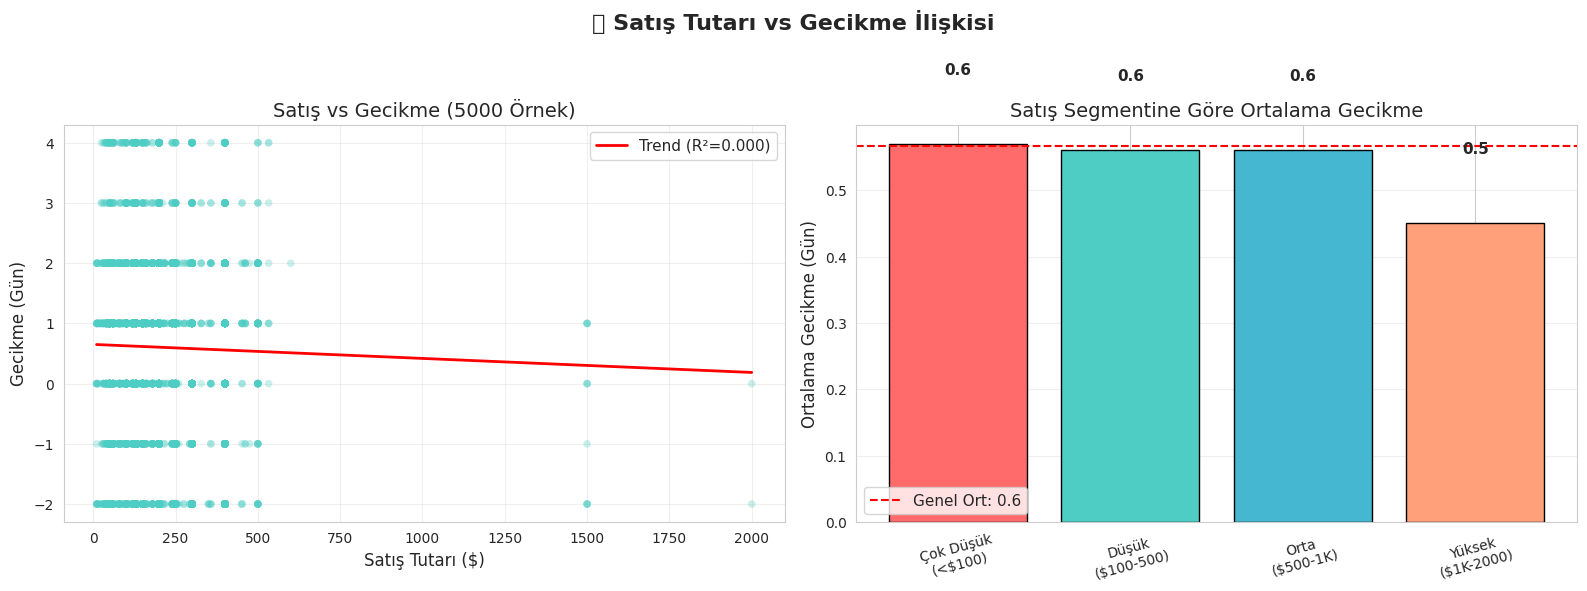


📊 Korelasyon (Satış vs Gecikme): -0.004
📊 R² değeri: 0.000
⚠️ Çok zayıf ilişki - satış tutarı gecikmeyi pek etkilemiyor


In [18]:
print("\n" + "=" * 60)
print("💰 SATIŞ TUTARI vs GECİKME")
print("=" * 60)

# Satış segmentlerine göre gecikme
sales_delay = df.groupby('sales_segment').agg({
    'delay_days': ['mean', 'median'],
    'is_delayed': 'mean',
    'order_id': 'count'
}).round(2)
sales_delay.columns = ['Ort_Gecikme', 'Medyan', 'Gecikme_Oranı', 'Sipariş_Sayısı']
print(sales_delay)

# Scatter plot - satış vs gecikme
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('💰 Satış Tutarı vs Gecikme İlişkisi', fontsize=16, fontweight='bold')

# 1. Scatter plot (sample 5000 için görselleştirme)
sample_df = df.sample(min(5000, len(df)), random_state=42)
axes[0].scatter(sample_df['sales'], sample_df['delay_days'],
               alpha=0.3, s=30, color='#4ECDC4', edgecolor='none')
axes[0].set_xlabel('Satış Tutarı ($)')
axes[0].set_ylabel('Gecikme (Gün)')
axes[0].set_title('Satış vs Gecikme (5000 Örnek)')
axes[0].grid(True, alpha=0.3)

# Trend line ekle
from scipy.stats import linregress
slope, intercept, r_value, p_value, std_err = linregress(sample_df['sales'], sample_df['delay_days'])
line = slope * sample_df['sales'].sort_values() + intercept
axes[0].plot(sample_df['sales'].sort_values(), line, 'r-', linewidth=2,
            label=f'Trend (R²={r_value**2:.3f})')
axes[0].legend()

# 2. Satış segmentine göre ortalama gecikme
axes[1].bar(range(len(sales_delay)), sales_delay['Ort_Gecikme'],
           color=colors[:len(sales_delay)], edgecolor='black')
axes[1].set_xticks(range(len(sales_delay)))
axes[1].set_xticklabels(sales_delay.index, rotation=15)
axes[1].set_ylabel('Ortalama Gecikme (Gün)')
axes[1].set_title('Satış Segmentine Göre Ortalama Gecikme')
axes[1].axhline(df['delay_days'].mean(), color='red', linestyle='--',
               label=f'Genel Ort: {df["delay_days"].mean():.1f}')
axes[1].legend()
axes[1].grid(True, alpha=0.3, axis='y')

for i, v in enumerate(sales_delay['Ort_Gecikme']):
    axes[1].text(i, v + 0.1, f'{v:.1f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.savefig('/content/drive/MyDrive/Data-Analyst-Portfolio/Project-1-Supply-Chain/dashboards/09_sales_vs_delay.png',
            dpi=300, bbox_inches='tight')
plt.show()

print(f"\n📊 Korelasyon (Satış vs Gecikme): {df['sales'].corr(df['delay_days']):.3f}")
print(f"📊 R² değeri: {r_value**2:.3f}")
if abs(r_value) < 0.1:
    print("⚠️ Çok zayıf ilişki - satış tutarı gecikmeyi pek etkilemiyor")

**GECİKME vs KATEGORİK DEĞİŞKENLER**

Gecikme vs Sevkiyat Modu (Detaylı)


✈️ SEVKİYAT MODU vs GECİKME (DETAYLI ANALİZ)
                Sipariş  Ort_Gecikme  Medyan   Std  Min  Max  Gecikme_Oranı  \
shipping_mode                                                                 
Second Class      35216         1.99     2.0  1.42    0    4           0.80   
First Class       27814         1.00     1.0  0.00    1    1           1.00   
Same Day           9737         0.48     0.0  0.50    0    1           0.48   
Standard Class   107752        -0.00     0.0  1.42   -2    2           0.40   

                Toplam_Satış  
shipping_mode                 
Second Class      7145444.82  
First Class       5674369.76  
Same Day          1942528.56  
Standard Class   22022391.88  


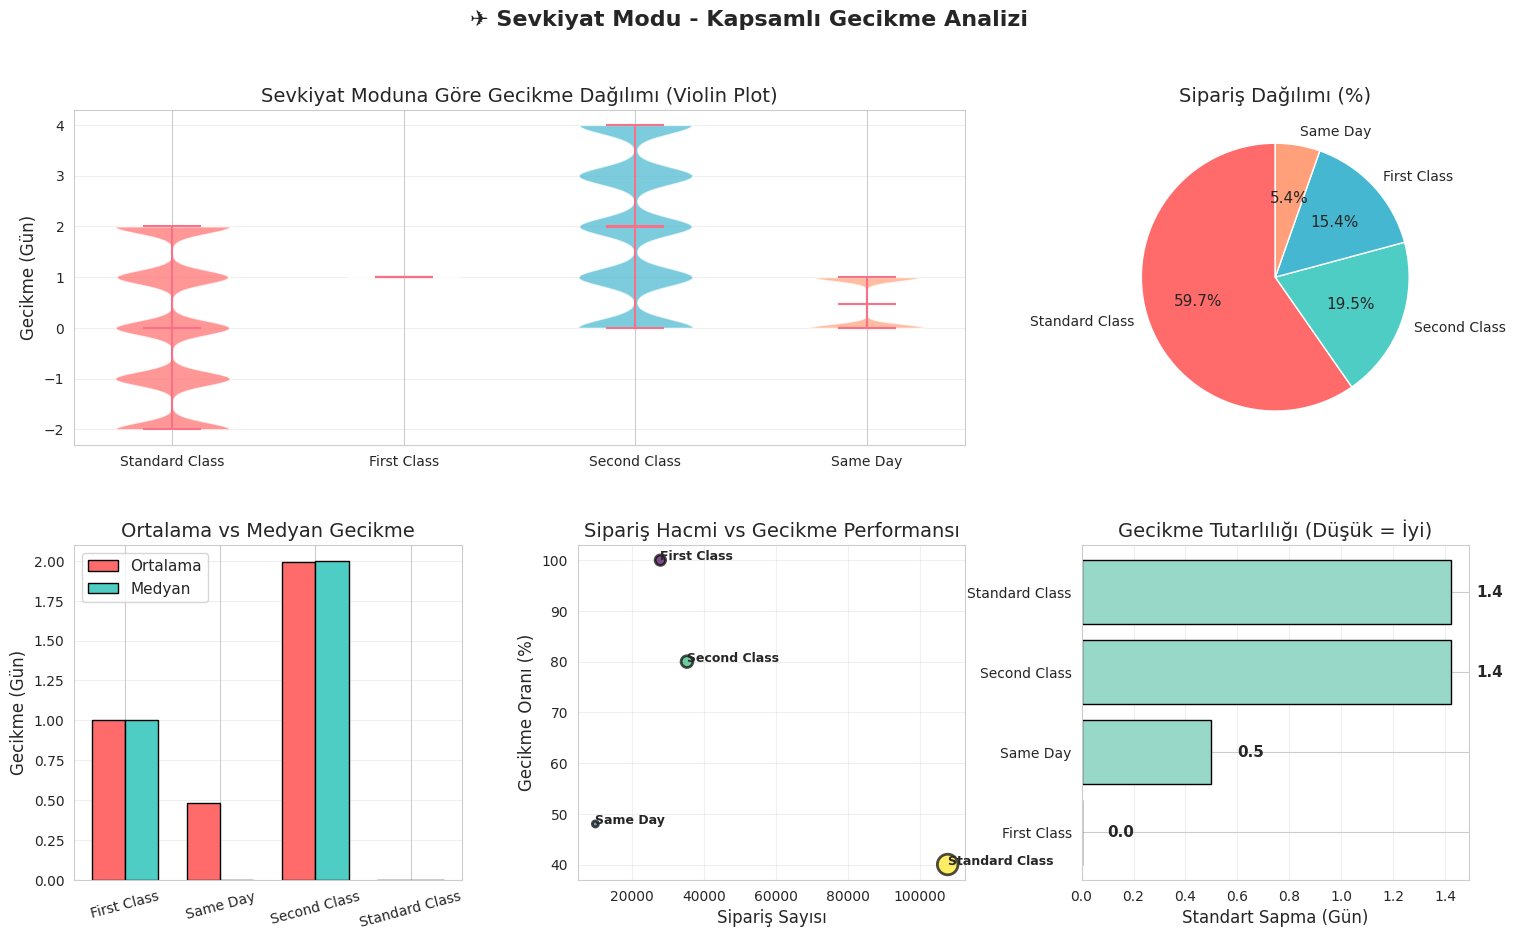


💡 DETAYLI İÇGÖRÜLER:
────────────────────────────────────────────────────────────
📊 En tutarlı mod: First Class (Std: 0.0)
⚠️ En tutarsız mod: Second Class (Std: 1.4)

✅ En iyi performans: Standard Class
   - Ort Gecikme: -0.0 gün
   - Gecikme Oranı: 40.0%
   - Sipariş Sayısı: 107,752
────────────────────────────────────────────────────────────


In [19]:
print("\n" + "=" * 60)
print("✈️ SEVKİYAT MODU vs GECİKME (DETAYLI ANALİZ)")
print("=" * 60)

# Detaylı istatistikler
shipping_detailed = df.groupby('shipping_mode').agg({
    'delay_days': ['count', 'mean', 'median', 'std', 'min', 'max'],
    'is_delayed': 'mean',
    'sales': 'sum'
}).round(2)
shipping_detailed.columns = ['Sipariş', 'Ort_Gecikme', 'Medyan', 'Std', 'Min', 'Max', 'Gecikme_Oranı', 'Toplam_Satış']
print(shipping_detailed.sort_values('Ort_Gecikme', ascending=False))

# Görselleştirme
fig = plt.figure(figsize=(18, 10))
gs = fig.add_gridspec(2, 3, hspace=0.3, wspace=0.3)
fig.suptitle('✈️ Sevkiyat Modu - Kapsamlı Gecikme Analizi', fontsize=16, fontweight='bold')

# 1. Violin plot - dağılım karşılaştırması
ax1 = fig.add_subplot(gs[0, :2])
parts = ax1.violinplot([df[df['shipping_mode']==mode]['delay_days'].dropna()
                        for mode in df['shipping_mode'].unique()],
                       positions=range(len(df['shipping_mode'].unique())),
                       showmeans=True, showmedians=True)
for pc, color in zip(parts['bodies'], colors):
    pc.set_facecolor(color)
    pc.set_alpha(0.7)
ax1.set_xticks(range(len(df['shipping_mode'].unique())))
ax1.set_xticklabels(df['shipping_mode'].unique())
ax1.set_ylabel('Gecikme (Gün)')
ax1.set_title('Sevkiyat Moduna Göre Gecikme Dağılımı (Violin Plot)')
ax1.grid(True, alpha=0.3, axis='y')

# 2. Sipariş hacmi
ax2 = fig.add_subplot(gs[0, 2])
mode_counts = df['shipping_mode'].value_counts()
ax2.pie(mode_counts, labels=mode_counts.index, autopct='%1.1f%%',
       colors=colors[:len(mode_counts)], startangle=90)
ax2.set_title('Sipariş Dağılımı (%)')

# 3. Ortalama vs Medyan karşılaştırması
ax3 = fig.add_subplot(gs[1, 0])
x = np.arange(len(shipping_detailed))
width = 0.35
ax3.bar(x - width/2, shipping_detailed['Ort_Gecikme'], width,
       label='Ortalama', color='#FF6B6B', edgecolor='black')
ax3.bar(x + width/2, shipping_detailed['Medyan'], width,
       label='Medyan', color='#4ECDC4', edgecolor='black')
ax3.set_xticks(x)
ax3.set_xticklabels(shipping_detailed.index, rotation=15)
ax3.set_ylabel('Gecikme (Gün)')
ax3.set_title('Ortalama vs Medyan Gecikme')
ax3.legend()
ax3.grid(True, alpha=0.3, axis='y')

# 4. Gecikme oranı vs Sipariş sayısı
ax4 = fig.add_subplot(gs[1, 1])
ax4.scatter(shipping_detailed['Sipariş'], shipping_detailed['Gecikme_Oranı'] * 100,
           s=shipping_detailed['Toplam_Satış']/100000,  # Bubble size
           c=range(len(shipping_detailed)), cmap='viridis',
           alpha=0.7, edgecolor='black', linewidth=2)
for i, mode in enumerate(shipping_detailed.index):
    ax4.annotate(mode,
                (shipping_detailed.loc[mode, 'Sipariş'],
                 shipping_detailed.loc[mode, 'Gecikme_Oranı'] * 100),
                fontsize=9, fontweight='bold')
ax4.set_xlabel('Sipariş Sayısı')
ax4.set_ylabel('Gecikme Oranı (%)')
ax4.set_title('Sipariş Hacmi vs Gecikme Performansı')
ax4.grid(True, alpha=0.3)

# 5. Standart sapma (tutarlılık)
ax5 = fig.add_subplot(gs[1, 2])
ax5.barh(shipping_detailed.index, shipping_detailed['Std'],
        color=['#98D8C8' if x < 3 else '#FF6B6B' for x in shipping_detailed['Std']],
        edgecolor='black')
ax5.set_xlabel('Standart Sapma (Gün)')
ax5.set_title('Gecikme Tutarlılığı (Düşük = İyi)')
ax5.grid(True, alpha=0.3, axis='x')

for i, v in enumerate(shipping_detailed['Std']):
    ax5.text(v + 0.1, i, f'{v:.1f}', va='center', fontweight='bold')

plt.savefig('/content/drive/MyDrive/Data-Analyst-Portfolio/Project-1-Supply-Chain/dashboards/10_shipping_detailed.png',
            dpi=300, bbox_inches='tight')
plt.show()

# İçgörü
print("\n💡 DETAYLI İÇGÖRÜLER:")
print("─" * 60)
most_consistent = shipping_detailed['Std'].idxmin()
least_consistent = shipping_detailed['Std'].idxmax()
print(f"📊 En tutarlı mod: {most_consistent} (Std: {shipping_detailed.loc[most_consistent, 'Std']:.1f})")
print(f"⚠️ En tutarsız mod: {least_consistent} (Std: {shipping_detailed.loc[least_consistent, 'Std']:.1f})")

best_performance = shipping_detailed['Ort_Gecikme'].idxmin()
print(f"\n✅ En iyi performans: {best_performance}")
print(f"   - Ort Gecikme: {shipping_detailed.loc[best_performance, 'Ort_Gecikme']:.1f} gün")
print(f"   - Gecikme Oranı: {shipping_detailed.loc[best_performance, 'Gecikme_Oranı']*100:.1f}%")
print(f"   - Sipariş Sayısı: {shipping_detailed.loc[best_performance, 'Sipariş']:,.0f}")
print("─" * 60)

Gecikme vs Bölge (Order Region)


🌍 BÖLGE vs GECİKME ANALİZİ
                 Ort_Gecikme  Medyan   Std  Gecikme_Oranı  Sipariş  \
order_region                                                         
Central Asia            0.65     1.0  1.47           0.57      553   
Central Africa          0.64     1.0  1.48           0.61     1677   
South Asia              0.60     1.0  1.50           0.59     7731   
Western Europe          0.60     1.0  1.51           0.59    27109   
US Center               0.59     1.0  1.44           0.57     5887   
Eastern Europe          0.58     1.0  1.49           0.57     3920   
East of USA             0.58     1.0  1.46           0.58     6915   
South of  USA           0.58     1.0  1.52           0.58     4045   
West Asia               0.57     1.0  1.48           0.57     6009   
Eastern Asia            0.57     1.0  1.52           0.57     7280   
East Africa             0.57     1.0  1.45           0.57     1852   
West of USA             0.56     1.0  1.52           0.57     

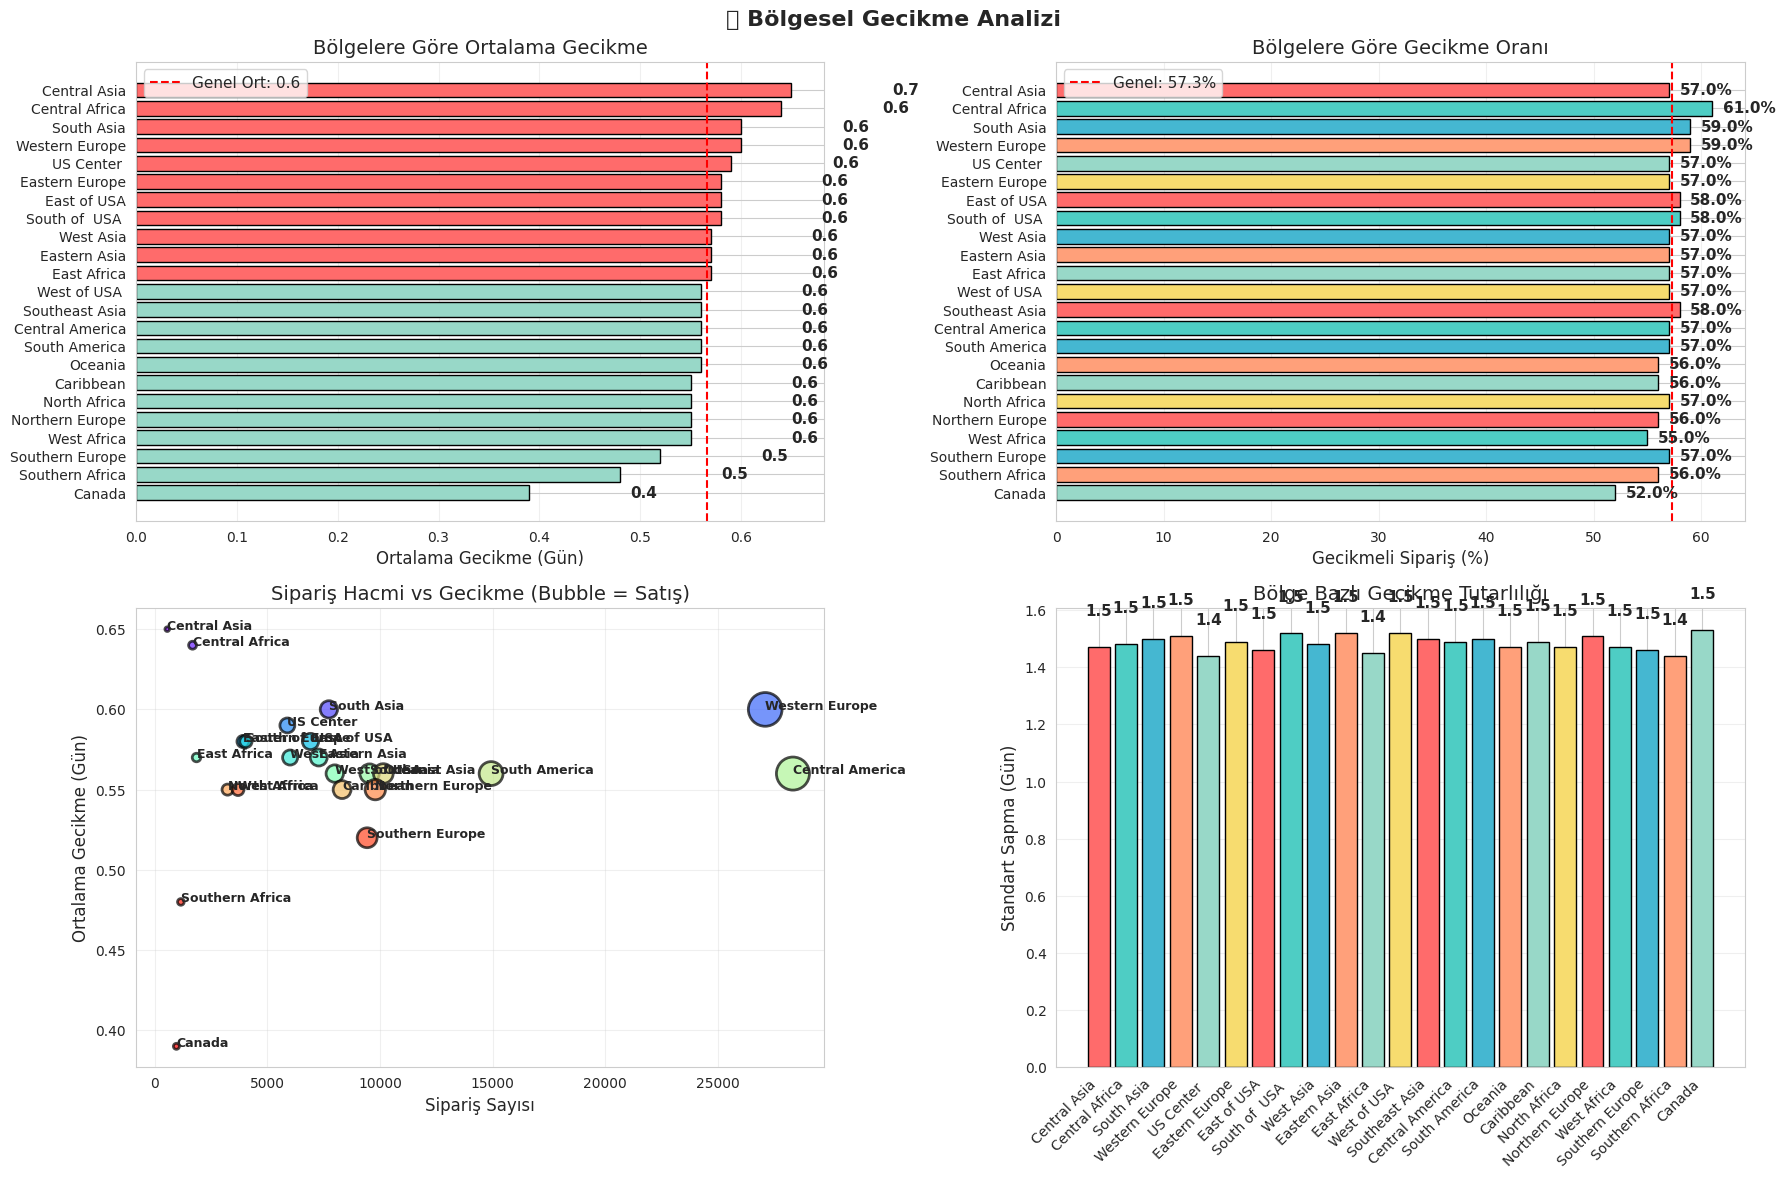


⚠️ EN SORUNLU 3 BÖLGE:
1. Central Asia:
   • Ort Gecikme: 0.7 gün
   • Gecikme Oranı: 57.0%
   • Sipariş: 553
2. Central Africa:
   • Ort Gecikme: 0.6 gün
   • Gecikme Oranı: 61.0%
   • Sipariş: 1,677
3. South Asia:
   • Ort Gecikme: 0.6 gün
   • Gecikme Oranı: 59.0%
   • Sipariş: 7,731

✅ EN İYİ 3 BÖLGE:
1. Southern Europe:
   • Ort Gecikme: 0.5 gün
   • Gecikme Oranı: 57.0%
   • Sipariş: 9,431
2. Southern Africa:
   • Ort Gecikme: 0.5 gün
   • Gecikme Oranı: 56.0%
   • Sipariş: 1,157
3. Canada:
   • Ort Gecikme: 0.4 gün
   • Gecikme Oranı: 52.0%
   • Sipariş: 959


In [20]:
print("\n" + "=" * 60)
print("🌍 BÖLGE vs GECİKME ANALİZİ")
print("=" * 60)

# Bölge bazlı analiz
region_analysis = df.groupby('order_region').agg({
    'delay_days': ['mean', 'median', 'std'],
    'is_delayed': 'mean',
    'order_id': 'count',
    'sales': 'sum'
}).round(2)
region_analysis.columns = ['Ort_Gecikme', 'Medyan', 'Std', 'Gecikme_Oranı', 'Sipariş', 'Toplam_Satış']
region_analysis = region_analysis.sort_values('Ort_Gecikme', ascending=False)
print(region_analysis)

# Görselleştirme
fig, axes = plt.subplots(2, 2, figsize=(18, 12))
fig.suptitle('🌍 Bölgesel Gecikme Analizi', fontsize=16, fontweight='bold')

# 1. Ortalama gecikme - harita tarzı bar
axes[0, 0].barh(range(len(region_analysis)), region_analysis['Ort_Gecikme'],
               color=['#FF6B6B' if x > df['delay_days'].mean() else '#98D8C8'
                     for x in region_analysis['Ort_Gecikme']],
               edgecolor='black')
axes[0, 0].set_yticks(range(len(region_analysis)))
axes[0, 0].set_yticklabels(region_analysis.index)
axes[0, 0].set_xlabel('Ortalama Gecikme (Gün)')
axes[0, 0].set_title('Bölgelere Göre Ortalama Gecikme')
axes[0, 0].axvline(df['delay_days'].mean(), color='red', linestyle='--',
                  label=f'Genel Ort: {df["delay_days"].mean():.1f}')
axes[0, 0].legend()
axes[0, 0].invert_yaxis()
axes[0, 0].grid(True, alpha=0.3, axis='x')

for i, v in enumerate(region_analysis['Ort_Gecikme']):
    axes[0, 0].text(v + 0.1, i, f'{v:.1f}', va='center', fontweight='bold')

# 2. Gecikme oranı
axes[0, 1].barh(range(len(region_analysis)), region_analysis['Gecikme_Oranı'] * 100,
               color=colors[:len(region_analysis)], edgecolor='black')
axes[0, 1].set_yticks(range(len(region_analysis)))
axes[0, 1].set_yticklabels(region_analysis.index)
axes[0, 1].set_xlabel('Gecikmeli Sipariş (%)')
axes[0, 1].set_title('Bölgelere Göre Gecikme Oranı')
axes[0, 1].axvline(df['is_delayed'].mean() * 100, color='red', linestyle='--',
                  label=f'Genel: {df["is_delayed"].mean()*100:.1f}%')
axes[0, 1].legend()
axes[0, 1].invert_yaxis()
axes[0, 1].grid(True, alpha=0.3, axis='x')

for i, v in enumerate(region_analysis['Gecikme_Oranı'] * 100):
    axes[0, 1].text(v + 1, i, f'{v:.1f}%', va='center', fontweight='bold')

# 3. Sipariş hacmi vs Gecikme (bubble chart)
axes[1, 0].scatter(region_analysis['Sipariş'], region_analysis['Ort_Gecikme'],
                  s=region_analysis['Toplam_Satış']/10000,
                  c=range(len(region_analysis)), cmap='rainbow',
                  alpha=0.7, edgecolor='black', linewidth=2)
for i, region in enumerate(region_analysis.index):
    axes[1, 0].annotate(region,
                       (region_analysis.loc[region, 'Sipariş'],
                        region_analysis.loc[region, 'Ort_Gecikme']),
                       fontsize=9, fontweight='bold')
axes[1, 0].set_xlabel('Sipariş Sayısı')
axes[1, 0].set_ylabel('Ortalama Gecikme (Gün)')
axes[1, 0].set_title('Sipariş Hacmi vs Gecikme (Bubble = Satış)')
axes[1, 0].grid(True, alpha=0.3)

# 4. Tutarlılık (Standart Sapma)
axes[1, 1].bar(range(len(region_analysis)), region_analysis['Std'],
              color=colors[:len(region_analysis)], edgecolor='black')
axes[1, 1].set_xticks(range(len(region_analysis)))
axes[1, 1].set_xticklabels(region_analysis.index, rotation=45, ha='right')
axes[1, 1].set_ylabel('Standart Sapma (Gün)')
axes[1, 1].set_title('Bölge Bazlı Gecikme Tutarlılığı')
axes[1, 1].grid(True, alpha=0.3, axis='y')

for i, v in enumerate(region_analysis['Std']):
    axes[1, 1].text(i, v + 0.1, f'{v:.1f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.savefig('/content/drive/MyDrive/Data-Analyst-Portfolio/Project-1-Supply-Chain/dashboards/11_region_analysis.png',
            dpi=300, bbox_inches='tight')
plt.show()

# En sorunlu ve en iyi 3 bölge
print("\n⚠️ EN SORUNLU 3 BÖLGE:")
for i, (region, row) in enumerate(region_analysis.head(3).iterrows(), 1):
    print(f"{i}. {region}:")
    print(f"   • Ort Gecikme: {row['Ort_Gecikme']:.1f} gün")
    print(f"   • Gecikme Oranı: {row['Gecikme_Oranı']*100:.1f}%")
    print(f"   • Sipariş: {row['Sipariş']:,.0f}")

print("\n✅ EN İYİ 3 BÖLGE:")
for i, (region, row) in enumerate(region_analysis.tail(3).iterrows(), 1):
    print(f"{i}. {region}:")
    print(f"   • Ort Gecikme: {row['Ort_Gecikme']:.1f} gün")
    print(f"   • Gecikme Oranı: {row['Gecikme_Oranı']*100:.1f}%")
    print(f"   • Sipariş: {row['Sipariş']:,.0f}")

Gecikme vs Ülke (Top 20)


🌍 ÜLKE BAZLI GECİKME ANALİZİ (TOP 20)
⚠️ EN ÇOK GECİKEN 10 ÜLKE:
                  Ort_Gecikme  Gecikme_Oranı  Sipariş
customer_country                                     
EE. UU.                  0.57           0.57   111146
Puerto Rico              0.56           0.57    69373

✅ EN AZ GECİKEN 10 ÜLKE:
                  Ort_Gecikme  Gecikme_Oranı  Sipariş
customer_country                                     
Puerto Rico              0.56           0.57    69373
EE. UU.                  0.57           0.57   111146


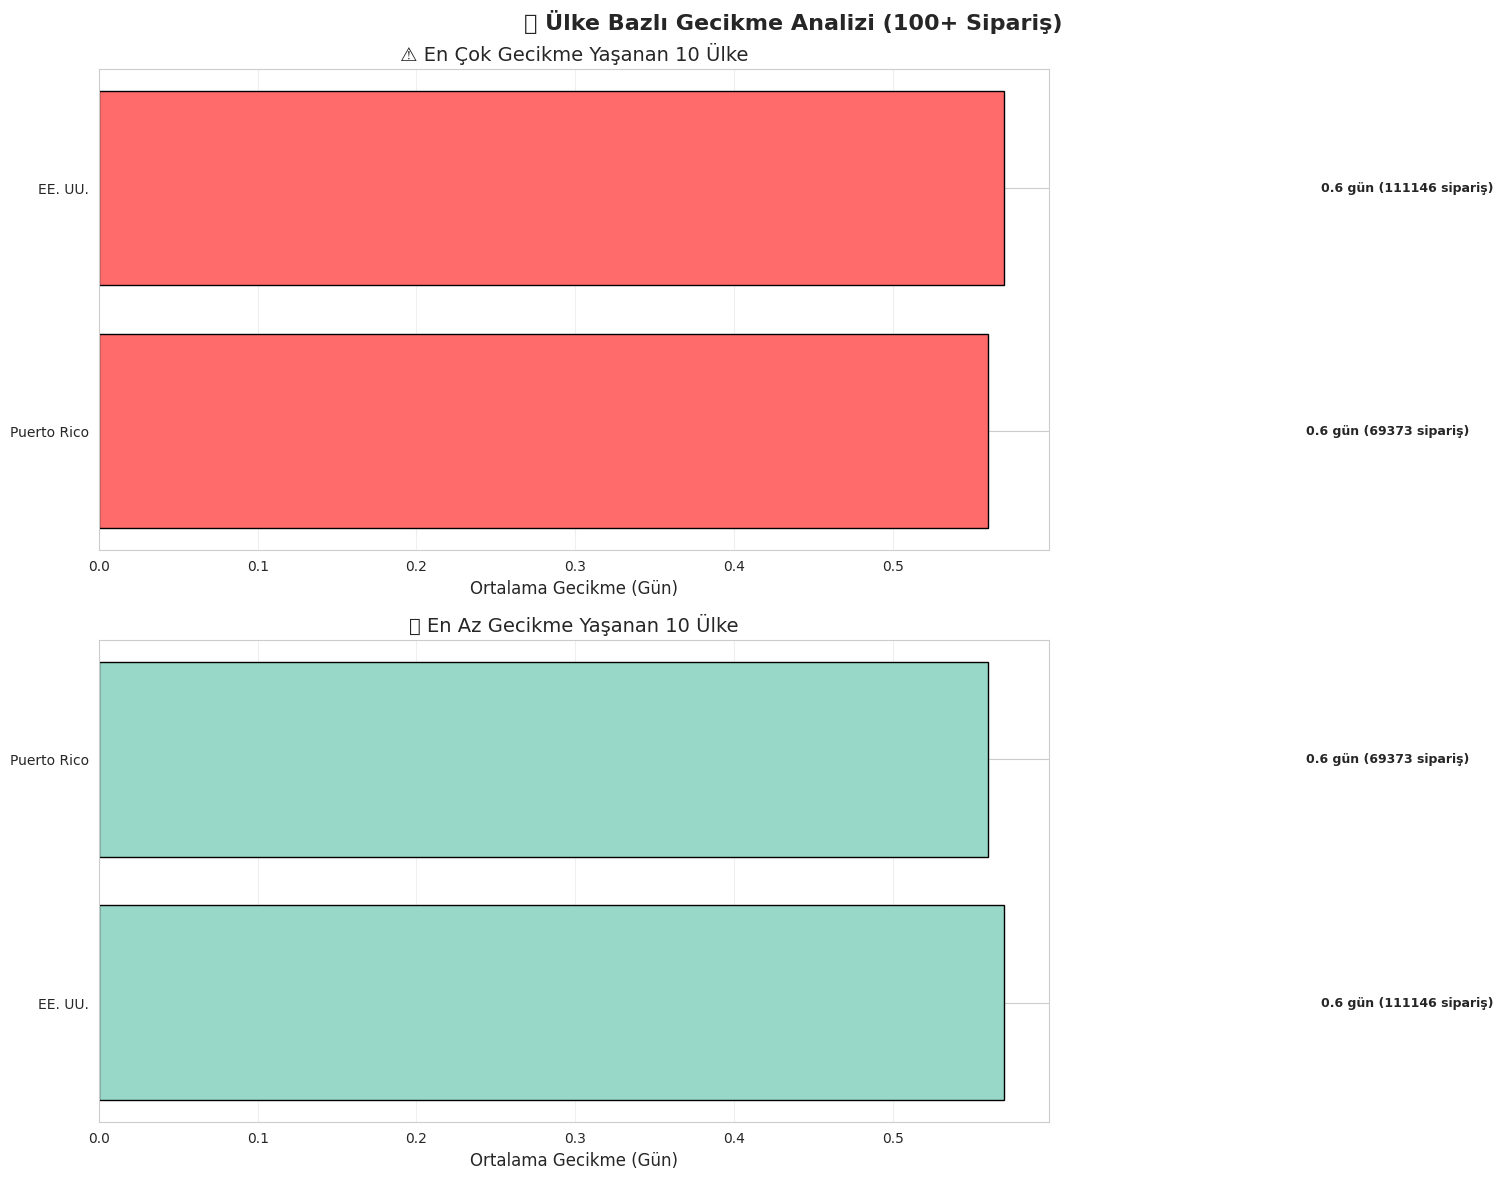


💡 COĞRAFİ PATTERN:
────────────────────────────────────────────────────────────
En kötü 10'un ortalama gecikmesi: 0.6 gün
En iyi 10'un ortalama gecikmesi: 0.6 gün
Fark: 0.0 gün
────────────────────────────────────────────────────────────


In [21]:
print("\n" + "=" * 60)
print("🌍 ÜLKE BAZLI GECİKME ANALİZİ (TOP 20)")
print("=" * 60)

# Ülke bazlı analiz (en az 100 sipariş olanlar)
country_analysis = df.groupby('customer_country').agg({
    'delay_days': ['mean', 'median'],
    'is_delayed': 'mean',
    'order_id': 'count',
    'sales': 'sum'
}).round(2)
country_analysis.columns = ['Ort_Gecikme', 'Medyan', 'Gecikme_Oranı', 'Sipariş', 'Toplam_Satış']
country_analysis = country_analysis[country_analysis['Sipariş'] >= 100]  # Minimum 100 sipariş

# En sorunlu ve en iyi 10'ar
worst_countries = country_analysis.nlargest(10, 'Ort_Gecikme')
best_countries = country_analysis.nsmallest(10, 'Ort_Gecikme')

print("⚠️ EN ÇOK GECİKEN 10 ÜLKE:")
print(worst_countries[['Ort_Gecikme', 'Gecikme_Oranı', 'Sipariş']])

print("\n✅ EN AZ GECİKEN 10 ÜLKE:")
print(best_countries[['Ort_Gecikme', 'Gecikme_Oranı', 'Sipariş']])

# Görselleştirme
fig, axes = plt.subplots(2, 1, figsize=(16, 12))
fig.suptitle('🌍 Ülke Bazlı Gecikme Analizi (100+ Sipariş)', fontsize=16, fontweight='bold')

# 1. En kötü 10
axes[0].barh(range(len(worst_countries)), worst_countries['Ort_Gecikme'],
            color='#FF6B6B', edgecolor='black')
axes[0].set_yticks(range(len(worst_countries)))
axes[0].set_yticklabels(worst_countries.index)
axes[0].set_xlabel('Ortalama Gecikme (Gün)')
axes[0].set_title('⚠️ En Çok Gecikme Yaşanan 10 Ülke')
axes[0].invert_yaxis()
axes[0].grid(True, alpha=0.3, axis='x')

for i, (country, row) in enumerate(worst_countries.iterrows()):
    axes[0].text(row['Ort_Gecikme'] + 0.2, i,
                f"{row['Ort_Gecikme']:.1f} gün ({row['Sipariş']:.0f} sipariş)",
                va='center', fontweight='bold', fontsize=9)

# 2. En iyi 10
axes[1].barh(range(len(best_countries)), best_countries['Ort_Gecikme'],
            color='#98D8C8', edgecolor='black')
axes[1].set_yticks(range(len(best_countries)))
axes[1].set_yticklabels(best_countries.index)
axes[1].set_xlabel('Ortalama Gecikme (Gün)')
axes[1].set_title('✅ En Az Gecikme Yaşanan 10 Ülke')
axes[1].invert_yaxis()
axes[1].grid(True, alpha=0.3, axis='x')

for i, (country, row) in enumerate(best_countries.iterrows()):
    axes[1].text(row['Ort_Gecikme'] + 0.2, i,
                f"{row['Ort_Gecikme']:.1f} gün ({row['Sipariş']:.0f} sipariş)",
                va='center', fontweight='bold', fontsize=9)

plt.tight_layout()
plt.savefig('/content/drive/MyDrive/Data-Analyst-Portfolio/Project-1-Supply-Chain/dashboards/12_country_analysis.png',
            dpi=300, bbox_inches='tight')
plt.show()

# Coğrafi pattern var mı kontrol
print("\n💡 COĞRAFİ PATTERN:")
print("─" * 60)
if len(worst_countries) > 0 and len(best_countries) > 0:
    print(f"En kötü 10'un ortalama gecikmesi: {worst_countries['Ort_Gecikme'].mean():.1f} gün")
    print(f"En iyi 10'un ortalama gecikmesi: {best_countries['Ort_Gecikme'].mean():.1f} gün")
    print(f"Fark: {worst_countries['Ort_Gecikme'].mean() - best_countries['Ort_Gecikme'].mean():.1f} gün")
print("─" * 60)

#**ZAMAN SERİSİ ANALİZİ**

**TEMEL ZAMAN TRENDLERİ**

Yıllık Trend Analizi

📅 YILLIK TREND ANALİZİ
      Sipariş  Ort_Gecikme  Medyan   Std  Gecikme_Oranı  Toplam_Satış  \
year                                                                    
2015    62650         0.56     1.0  1.50           0.57   12340831.43   
2016    62550         0.57     1.0  1.48           0.57   12303817.32   
2017    53196         0.56     1.0  1.49           0.57   11808436.14   
2018     2123         0.61     1.0  1.49           0.59     331650.12   

      Toplam_Ürün  
year               
2015       138480  
2016       137352  
2017       106124  
2018         2123  

📊 Yıllık Değişim Oranları:
      Ort_Gecikme  Gecikme_Değişim_%  Sipariş  Sipariş_Değişim_%
year                                                            
2015         0.56                NaN    62650                NaN
2016         0.57           1.785714    62550          -0.159617
2017         0.56          -1.754386    53196         -14.954436
2018         0.61           8.928571     2123         -96.009098


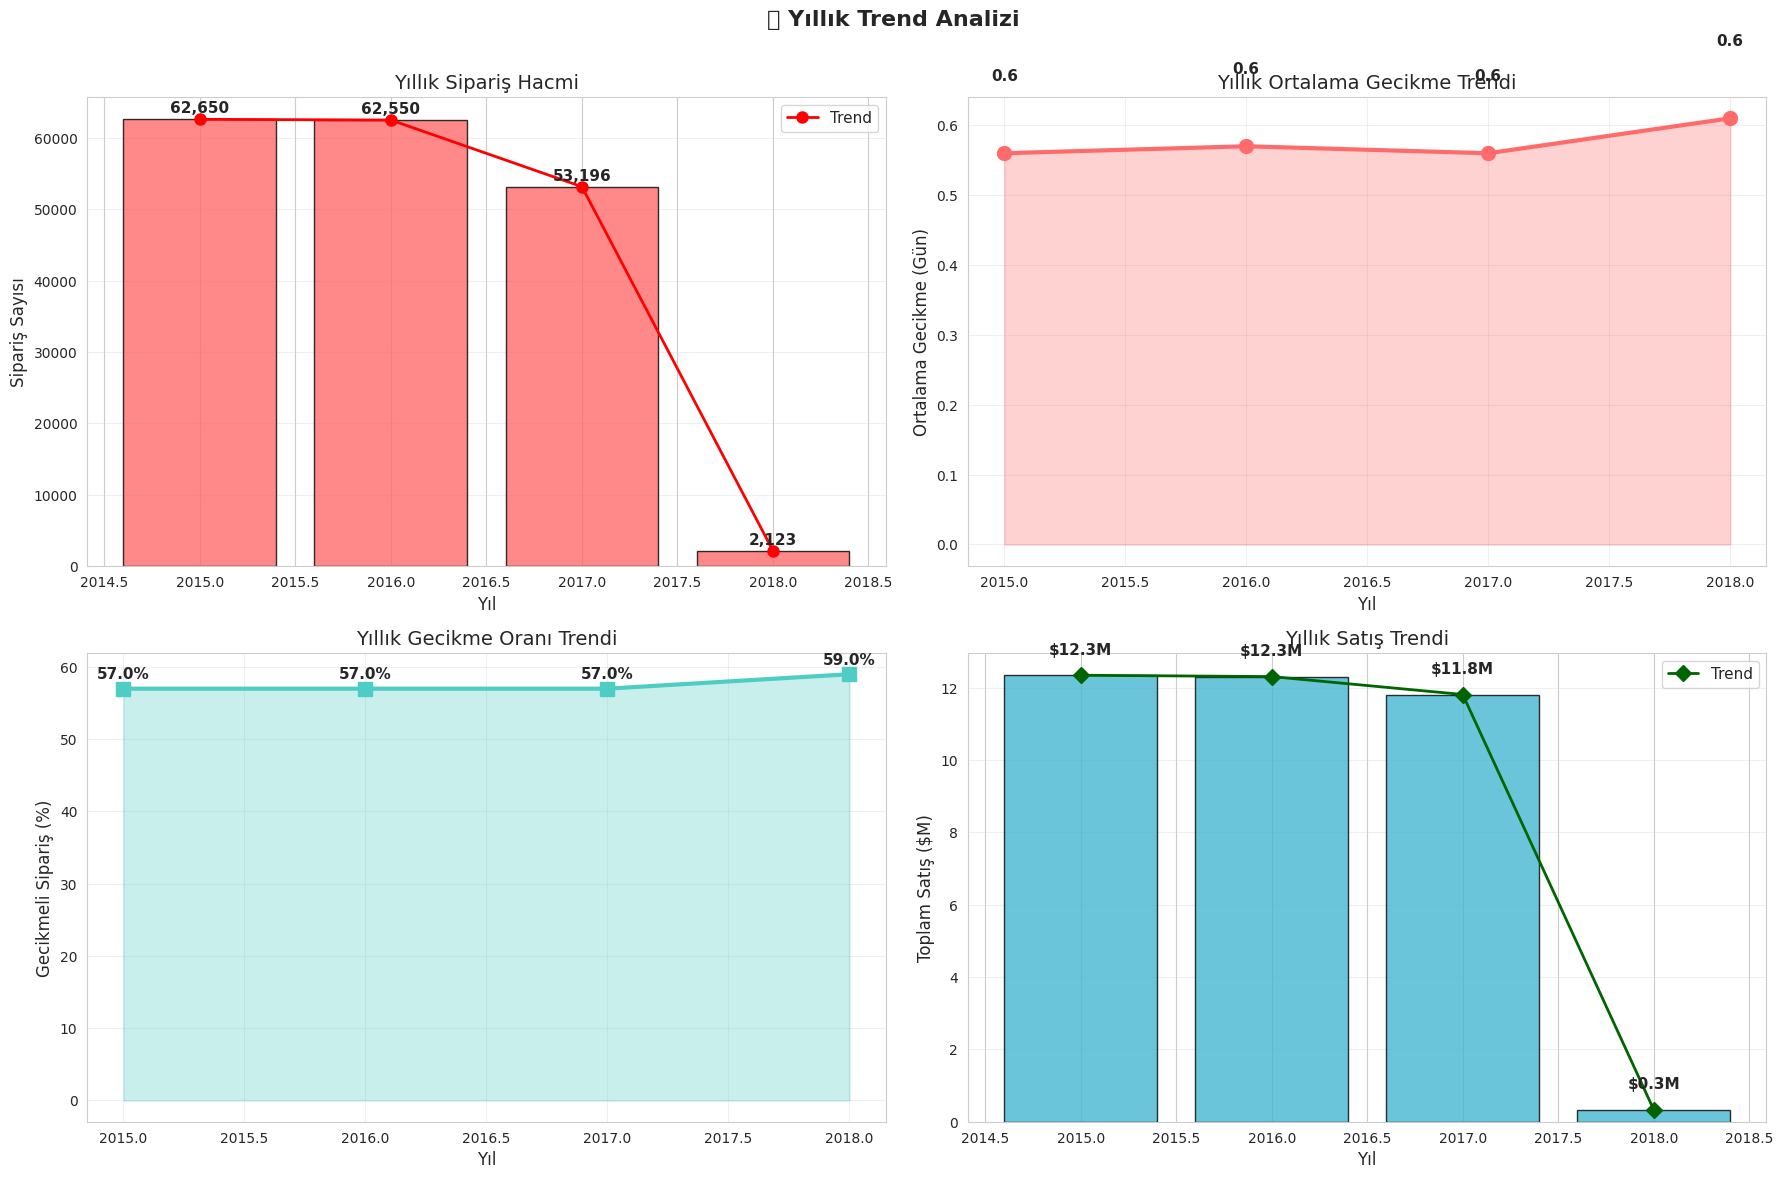


💡 YILLIK TREND İÇGÖRÜLERİ:
────────────────────────────────────────────────────────────
✅ En iyi yıl: 2015 (0.6 gün)
⚠️ En kötü yıl: 2018 (0.6 gün)

📊 Genel Trend: KÖTÜLEŞME
   İlk yıl: 0.6 gün
   Son yıl: 0.6 gün
   Değişim: 0.0 gün
────────────────────────────────────────────────────────────


In [22]:
print("=" * 60)
print("📅 YILLIK TREND ANALİZİ")
print("=" * 60)

# Yıl bazlı istatistikler
yearly_stats = df.groupby('year').agg({
    'order_id': 'count',
    'delay_days': ['mean', 'median', 'std'],
    'is_delayed': 'mean',
    'sales': 'sum',
    'quantity': 'sum'
}).round(2)
yearly_stats.columns = ['Sipariş', 'Ort_Gecikme', 'Medyan', 'Std', 'Gecikme_Oranı', 'Toplam_Satış', 'Toplam_Ürün']
print(yearly_stats)

# Yıllık değişim oranları
yearly_stats['Gecikme_Değişim_%'] = yearly_stats['Ort_Gecikme'].pct_change() * 100
yearly_stats['Sipariş_Değişim_%'] = yearly_stats['Sipariş'].pct_change() * 100
print("\n📊 Yıllık Değişim Oranları:")
print(yearly_stats[['Ort_Gecikme', 'Gecikme_Değişim_%', 'Sipariş', 'Sipariş_Değişim_%']])

# Görselleştirme
fig, axes = plt.subplots(2, 2, figsize=(18, 12))
fig.suptitle('📅 Yıllık Trend Analizi', fontsize=16, fontweight='bold')

# 1. Sipariş hacmi trendi
axes[0, 0].bar(yearly_stats.index, yearly_stats['Sipariş'],
              color=colors[0], edgecolor='black', alpha=0.8)
axes[0, 0].plot(yearly_stats.index, yearly_stats['Sipariş'],
               'ro-', linewidth=2, markersize=8, label='Trend')
axes[0, 0].set_xlabel('Yıl')
axes[0, 0].set_ylabel('Sipariş Sayısı')
axes[0, 0].set_title('Yıllık Sipariş Hacmi')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3, axis='y')

for i, (year, count) in enumerate(zip(yearly_stats.index, yearly_stats['Sipariş'])):
    axes[0, 0].text(year, count + 500, f'{count:,.0f}',
                   ha='center', va='bottom', fontweight='bold')

# 2. Ortalama gecikme trendi
axes[0, 1].plot(yearly_stats.index, yearly_stats['Ort_Gecikme'],
               'o-', linewidth=3, markersize=10, color='#FF6B6B')
axes[0, 1].fill_between(yearly_stats.index, yearly_stats['Ort_Gecikme'],
                        alpha=0.3, color='#FF6B6B')
axes[0, 1].set_xlabel('Yıl')
axes[0, 1].set_ylabel('Ortalama Gecikme (Gün)')
axes[0, 1].set_title('Yıllık Ortalama Gecikme Trendi')
axes[0, 1].grid(True, alpha=0.3)

for year, delay in zip(yearly_stats.index, yearly_stats['Ort_Gecikme']):
    axes[0, 1].text(year, delay + 0.1, f'{delay:.1f}',
                   ha='center', va='bottom', fontweight='bold', fontsize=11)

# 3. Gecikme oranı trendi
axes[1, 0].plot(yearly_stats.index, yearly_stats['Gecikme_Oranı'] * 100,
               's-', linewidth=3, markersize=10, color='#4ECDC4')
axes[1, 0].fill_between(yearly_stats.index, yearly_stats['Gecikme_Oranı'] * 100,
                        alpha=0.3, color='#4ECDC4')
axes[1, 0].set_xlabel('Yıl')
axes[1, 0].set_ylabel('Gecikmeli Sipariş (%)')
axes[1, 0].set_title('Yıllık Gecikme Oranı Trendi')
axes[1, 0].grid(True, alpha=0.3)

for year, pct in zip(yearly_stats.index, yearly_stats['Gecikme_Oranı'] * 100):
    axes[1, 0].text(year, pct + 1, f'{pct:.1f}%',
                   ha='center', va='bottom', fontweight='bold', fontsize=11)

# 4. Satış trendi
axes[1, 1].bar(yearly_stats.index, yearly_stats['Toplam_Satış']/1000000,
              color=colors[2], edgecolor='black', alpha=0.8)
axes[1, 1].plot(yearly_stats.index, yearly_stats['Toplam_Satış']/1000000,
               'D-', linewidth=2, markersize=8, color='darkgreen', label='Trend')
axes[1, 1].set_xlabel('Yıl')
axes[1, 1].set_ylabel('Toplam Satış ($M)')
axes[1, 1].set_title('Yıllık Satış Trendi')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3, axis='y')

for year, sales in zip(yearly_stats.index, yearly_stats['Toplam_Satış']/1000000):
    axes[1, 1].text(year, sales + 0.5, f'${sales:.1f}M',
                   ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.savefig('/content/drive/MyDrive/Data-Analyst-Portfolio/Project-1-Supply-Chain/dashboards/13_yearly_trends.png',
            dpi=300, bbox_inches='tight')
plt.show()

# İçgörü
print("\n💡 YILLIK TREND İÇGÖRÜLERİ:")
print("─" * 60)
best_year = yearly_stats['Ort_Gecikme'].idxmin()
worst_year = yearly_stats['Ort_Gecikme'].idxmax()
print(f"✅ En iyi yıl: {best_year} ({yearly_stats.loc[best_year, 'Ort_Gecikme']:.1f} gün)")
print(f"⚠️ En kötü yıl: {worst_year} ({yearly_stats.loc[worst_year, 'Ort_Gecikme']:.1f} gün)")

if len(yearly_stats) > 1:
    trend = "İYİLEŞME" if yearly_stats['Ort_Gecikme'].iloc[-1] < yearly_stats['Ort_Gecikme'].iloc[0] else "KÖTÜLEŞME"
    print(f"\n📊 Genel Trend: {trend}")
    print(f"   İlk yıl: {yearly_stats['Ort_Gecikme'].iloc[0]:.1f} gün")
    print(f"   Son yıl: {yearly_stats['Ort_Gecikme'].iloc[-1]:.1f} gün")
    print(f"   Değişim: {yearly_stats['Ort_Gecikme'].iloc[-1] - yearly_stats['Ort_Gecikme'].iloc[0]:.1f} gün")
print("─" * 60)

Aylık Trend Analizi


📅 AYLIK TREND ANALİZİ
Toplam ay sayısı: 37

İlk 5 ay:
            Sipariş  Ort_Gecikme  Medyan  Gecikme_Oranı       Satış
year_month                                                         
2015-01-01     5322         0.54     1.0           0.56  1051590.08
2015-02-01     4729         0.60     1.0           0.58   927009.90
2015-03-01     5362         0.57     1.0           0.57  1051253.69
2015-04-01     5126         0.55     1.0           0.56  1014463.28
2015-05-01     5357         0.56     1.0           0.58  1050478.44

Son 5 ay:
            Sipariş  Ort_Gecikme  Medyan  Gecikme_Oranı       Satış
year_month                                                         
2017-09-01     5189         0.53     1.0           0.57  1143775.11
2017-10-01     2255         0.54     1.0           0.56  1073994.17
2017-11-01     2055         0.58     1.0           0.58   626914.38
2017-12-01     2124         0.58     1.0           0.58   503910.82
2018-01-01     2123         0.61     1.0          

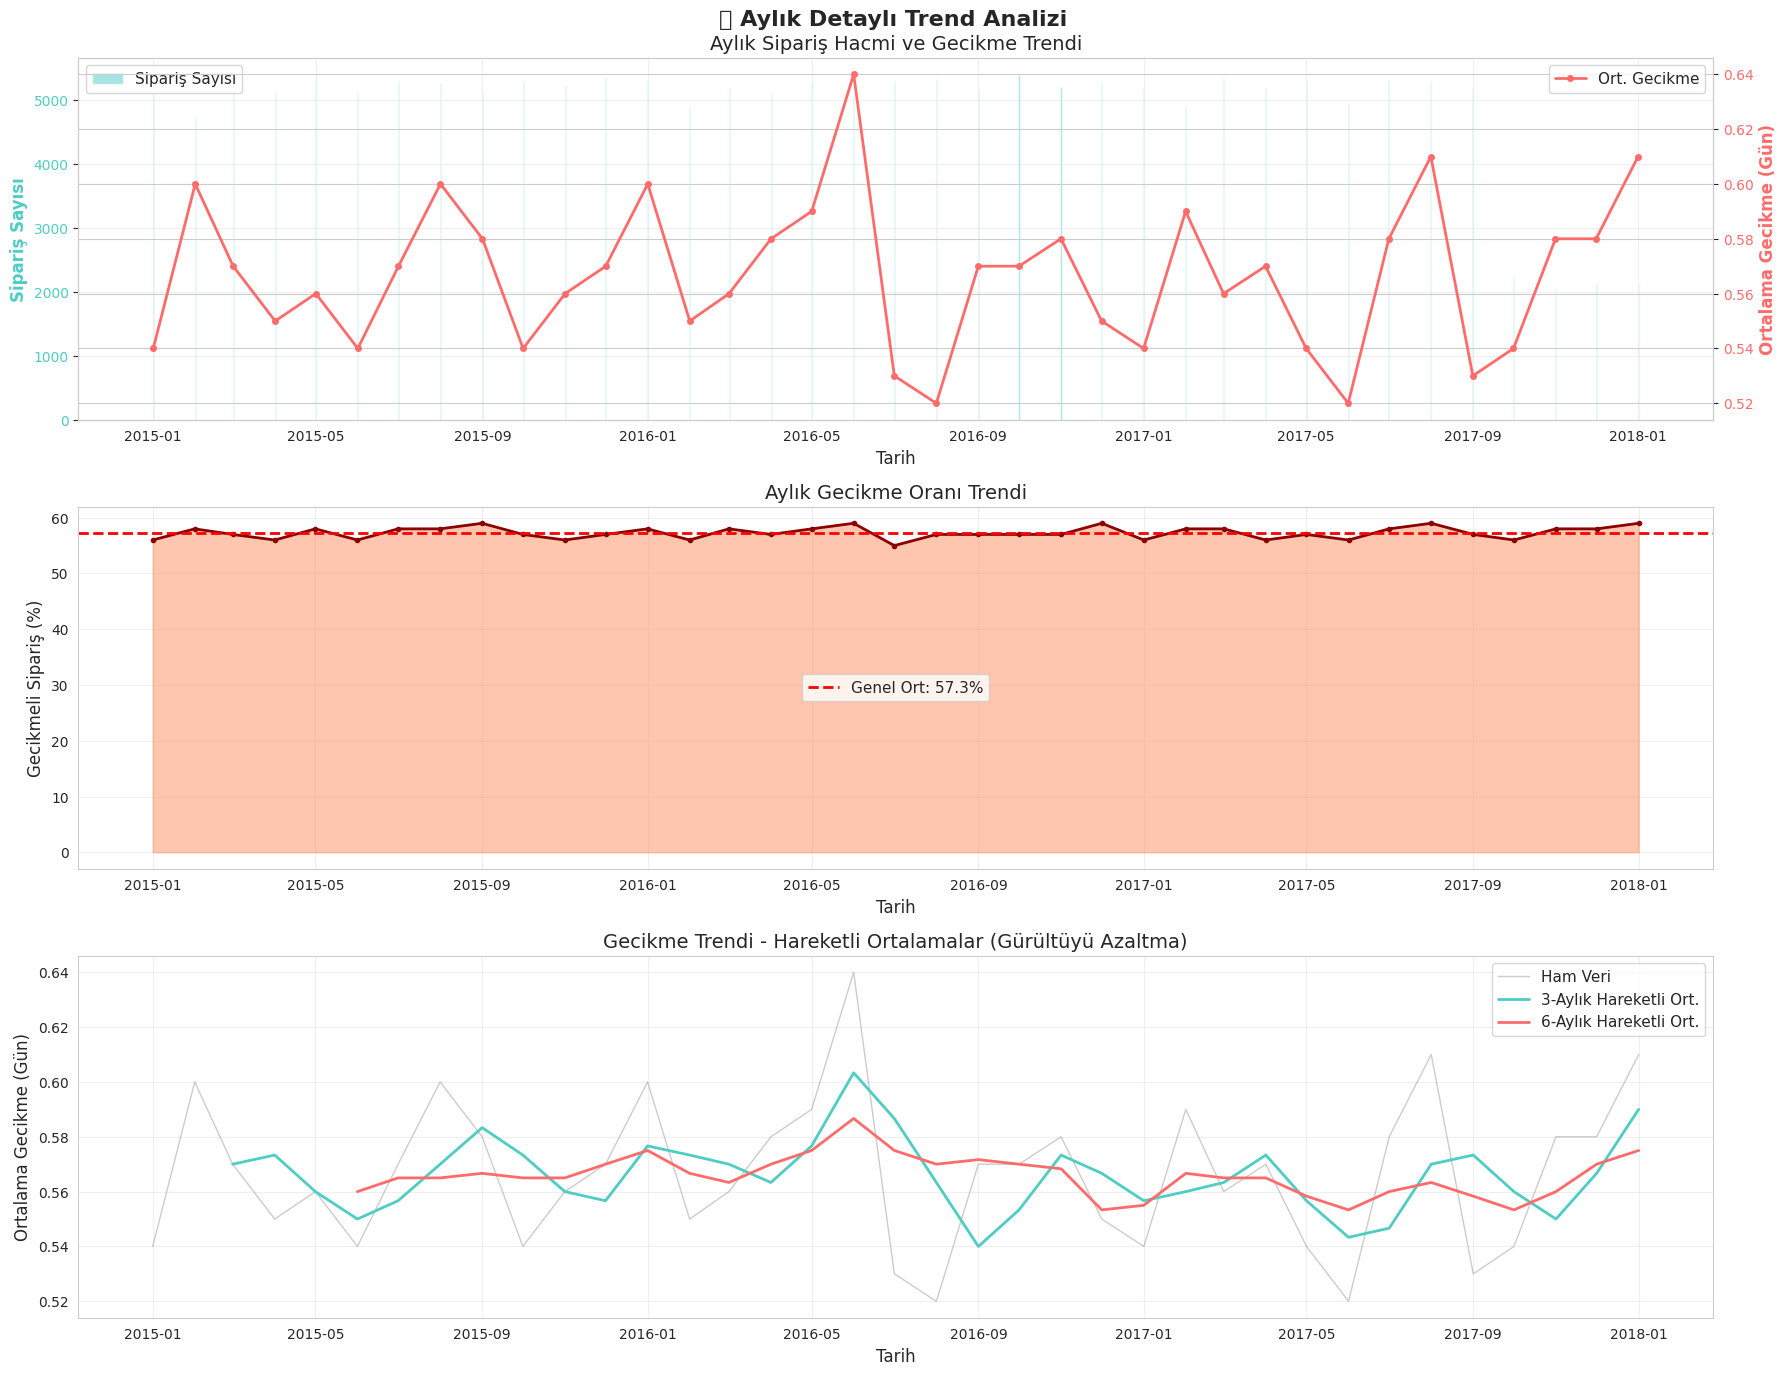


💡 AYLIK İÇGÖRÜLER:
────────────────────────────────────────────────────────────
✅ En iyi ay: August 2016 (0.5 gün)
⚠️ En kötü ay: June 2016 (0.6 gün)

📊 Volatilite (Std): 0.03 gün
────────────────────────────────────────────────────────────


In [23]:
print("\n" + "=" * 60)
print("📅 AYLIK TREND ANALİZİ")
print("=" * 60)

# 'order_date' sütununu datetime formatına dönüştür
df['order_date'] = pd.to_datetime(df['order_date'])

# Aylık istatistikler
df['year_month'] = df['order_date'].dt.to_period('M')
monthly_stats = df.groupby('year_month').agg({
    'order_id': 'count',
    'delay_days': ['mean', 'median'],
    'is_delayed': 'mean',
    'sales': 'sum'
}).round(2)
monthly_stats.columns = ['Sipariş', 'Ort_Gecikme', 'Medyan', 'Gecikme_Oranı', 'Satış']
monthly_stats.index = monthly_stats.index.to_timestamp()

print(f"Toplam ay sayısı: {len(monthly_stats)}")
print(f"\nİlk 5 ay:")
print(monthly_stats.head())
print(f"\nSon 5 ay:")
print(monthly_stats.tail())

# Görselleştirme
fig, axes = plt.subplots(3, 1, figsize=(18, 14))
fig.suptitle('📅 Aylık Detaylı Trend Analizi', fontsize=16, fontweight='bold')

# 1. Sipariş hacmi + Gecikme (dual axis)
ax1 = axes[0]
ax2 = ax1.twinx()

# Sipariş hacmi (bar)
ax1.bar(monthly_stats.index, monthly_stats['Sipariş'],
       alpha=0.5, color='#4ECDC4', label='Sipariş Sayısı')
ax1.set_ylabel('Sipariş Sayısı', color='#4ECDC4', fontweight='bold')
ax1.tick_params(axis='y', labelcolor='#4ECDC4')

# Ortalama gecikme (line)
ax2.plot(monthly_stats.index, monthly_stats['Ort_Gecikme'],
        'o-', linewidth=2, color='#FF6B6B', markersize=4, label='Ort. Gecikme')
ax2.set_ylabel('Ortalama Gecikme (Gün)', color='#FF6B6B', fontweight='bold')
ax2.tick_params(axis='y', labelcolor='#FF6B6B')

ax1.set_xlabel('Tarih')
ax1.set_title('Aylık Sipariş Hacmi ve Gecikme Trendi')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
ax1.grid(True, alpha=0.3)

# 2. Gecikme oranı
axes[1].fill_between(monthly_stats.index, monthly_stats['Gecikme_Oranı'] * 100,
                    alpha=0.6, color='#FFA07A')
axes[1].plot(monthly_stats.index, monthly_stats['Gecikme_Oranı'] * 100,
            linewidth=2, color='darkred', marker='o', markersize=3)
axes[1].axhline(df['is_delayed'].mean() * 100, color='red', linestyle='--', # Removed fontweight='bold'
               linewidth=2, label=f'Genel Ort: {df["is_delayed"].mean()*100:.1f}%')
axes[1].set_xlabel('Tarih')
axes[1].set_ylabel('Gecikmeli Sipariş (%)')
axes[1].set_title('Aylık Gecikme Oranı Trendi')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

# 3. Hareketli ortalama (3 aylık)
monthly_stats['MA_3'] = monthly_stats['Ort_Gecikme'].rolling(window=3).mean()
monthly_stats['MA_6'] = monthly_stats['Ort_Gecikme'].rolling(window=6).mean()

axes[2].plot(monthly_stats.index, monthly_stats['Ort_Gecikme'],
            alpha=0.4, color='gray', linewidth=1, label='Ham Veri')
axes[2].plot(monthly_stats.index, monthly_stats['MA_3'],
            linewidth=2, color='#4ECDC4', label='3-Aylık Hareketli Ort.')
axes[2].plot(monthly_stats.index, monthly_stats['MA_6'],
            linewidth=2, color='#FF6B6B', label='6-Aylık Hareketli Ort.')
axes[2].set_xlabel('Tarih')
axes[2].set_ylabel('Ortalama Gecikme (Gün)')
axes[2].set_title('Gecikme Trendi - Hareketli Ortalamalar (Gürültüyü Azaltma)')
axes[2].legend()
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('/content/drive/MyDrive/Data-Analyst-Portfolio/Project-1-Supply-Chain/dashboards/14_monthly_trends.png',
            dpi=300, bbox_inches='tight')
plt.show()

# En iyi ve en kötü aylar
best_month = monthly_stats['Ort_Gecikme'].idxmin()
worst_month = monthly_stats['Ort_Gecikme'].idxmax()

print("\n💡 AYLIK İÇGÖRÜLER:")
print("─" * 60)
print(f"✅ En iyi ay: {best_month.strftime('%B %Y')} ({monthly_stats.loc[best_month, 'Ort_Gecikme']:.1f} gün)")
print(f"⚠️ En kötü ay: {worst_month.strftime('%B %Y')} ({monthly_stats.loc[worst_month, 'Ort_Gecikme']:.1f} gün)")
print(f"\n📊 Volatilite (Std): {monthly_stats['Ort_Gecikme'].std():.2f} gün")
print("─" * 60)

**MEVSİMSELLİK ANALİZİ**

Aylara Göre Pattern (Tüm Yıllar Birleşik)


🌸 MEVSİMSELLİK ANALİZİ
         Sipariş  Ort_Gecikme   Std  Gecikme_Oranı  Toplam_Satış
Ocak       17979         0.57  1.50           0.57    3459246.47
Şubat      14529         0.58  1.51           0.57    2888087.65
Mart       15919         0.56  1.50           0.58    3125111.59
Nisan      15435         0.57  1.49           0.57    3053996.48
Mayıs      15976         0.56  1.46           0.58    3185363.96
Haziran    15139         0.56  1.49           0.57    3059152.21
Temmuz     15922         0.56  1.50           0.57    3188170.17
Ağustos    15912         0.58  1.51           0.58    3187032.11
Eylül      15489         0.56  1.49           0.58    3164510.75
Ekim       12955         0.55  1.48           0.57    3171278.99
Kasım      12500         0.57  1.51           0.57    2703624.77
Aralık     12764         0.56  1.47           0.58    2599159.87

📊 Mevsim Bazlı Ortalamalar:
          Sipariş  Ort_Gecikme  Gecikme_Oranı
Mevsim                                       
İlkbahar  

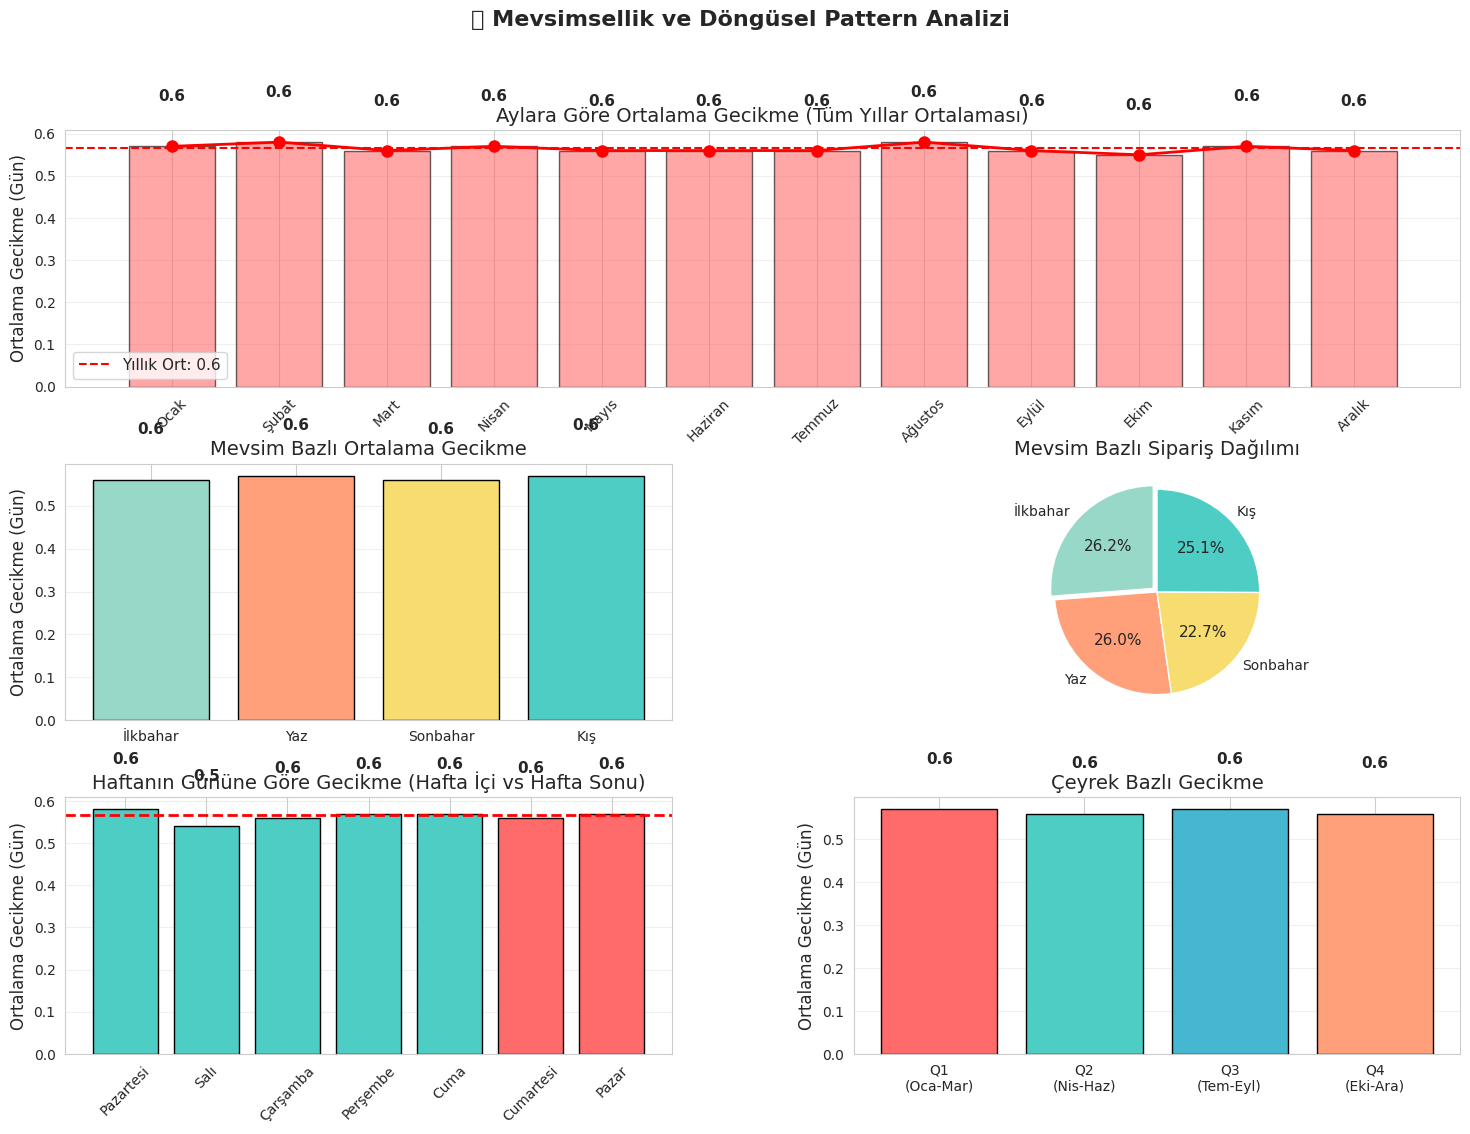


💡 MEVSİMSEL İÇGÖRÜLER:
────────────────────────────────────────────────────────────
✅ En iyi ay: Ekim (0.6 gün)
⚠️ En kötü ay: Şubat (0.6 gün)

✅ En iyi mevsim: İlkbahar (0.6 gün)
⚠️ En kötü mevsim: Yaz (0.6 gün)

📊 Hafta içi ortalama: 0.6 gün
📊 Hafta sonu ortalama: 0.6 gün
   Fark: 0.0 gün
────────────────────────────────────────────────────────────


In [24]:
print("\n" + "=" * 60)
print("🌸 MEVSİMSELLİK ANALİZİ")
print("=" * 60)

# Ay bazlı analiz (Ocak, Şubat, ... Aralık)
month_pattern = df.groupby('month').agg({
    'order_id': 'count',
    'delay_days': ['mean', 'std'],
    'is_delayed': 'mean',
    'sales': 'sum'
}).round(2)
month_pattern.columns = ['Sipariş', 'Ort_Gecikme', 'Std', 'Gecikme_Oranı', 'Toplam_Satış']

# Ay isimleri
month_names = ['Ocak', 'Şubat', 'Mart', 'Nisan', 'Mayıs', 'Haziran',
               'Temmuz', 'Ağustos', 'Eylül', 'Ekim', 'Kasım', 'Aralık']
month_pattern.index = month_names

print(month_pattern)

# Mevsim tanımlama
seasons = {
    'Kış': ['Aralık', 'Ocak', 'Şubat'],
    'İlkbahar': ['Mart', 'Nisan', 'Mayıs'],
    'Yaz': ['Haziran', 'Temmuz', 'Ağustos'],
    'Sonbahar': ['Eylül', 'Ekim', 'Kasım']
}

# Mevsim mapping
def get_season(month_name):
    for season, months in seasons.items():
        if month_name in months:
            return season
    return 'Unknown'

month_pattern['Mevsim'] = [get_season(m) for m in month_pattern.index]

# Mevsim bazlı istatistikler
season_stats = month_pattern.groupby('Mevsim').agg({
    'Sipariş': 'sum',
    'Ort_Gecikme': 'mean',
    'Gecikme_Oranı': 'mean'
}).round(2)
season_stats = season_stats.reindex(['İlkbahar', 'Yaz', 'Sonbahar', 'Kış'])

print("\n📊 Mevsim Bazlı Ortalamalar:")
print(season_stats)

# Görselleştirme
fig = plt.figure(figsize=(18, 12))
gs = fig.add_gridspec(3, 2, hspace=0.3, wspace=0.3)
fig.suptitle('🌸 Mevsimsellik ve Döngüsel Pattern Analizi', fontsize=16, fontweight='bold')

# 1. Aylara göre ortalama gecikme (line + bar)
ax1 = fig.add_subplot(gs[0, :])
x = range(12)
ax1.bar(x, month_pattern['Ort_Gecikme'], alpha=0.6, color=colors[0], edgecolor='black')
ax1.plot(x, month_pattern['Ort_Gecikme'], 'ro-', linewidth=2, markersize=8)
ax1.set_xticks(x)
ax1.set_xticklabels(month_pattern.index, rotation=45)
ax1.set_ylabel('Ortalama Gecikme (Gün)')
ax1.set_title('Aylara Göre Ortalama Gecikme (Tüm Yıllar Ortalaması)')
ax1.axhline(df['delay_days'].mean(), color='red', linestyle='--',
           label=f'Yıllık Ort: {df["delay_days"].mean():.1f}')
ax1.legend()
ax1.grid(True, alpha=0.3, axis='y')

# Değerleri ekle
for i, (month, delay) in enumerate(zip(month_pattern.index, month_pattern['Ort_Gecikme'])):
    ax1.text(i, delay + 0.1, f'{delay:.1f}', ha='center', va='bottom', fontweight='bold')

# 2. Mevsim bazlı gecikme
ax2 = fig.add_subplot(gs[1, 0])
ax2.bar(range(len(season_stats)), season_stats['Ort_Gecikme'],
       color=['#98D8C8', '#FFA07A', '#F7DC6F', '#4ECDC4'], edgecolor='black')
ax2.set_xticks(range(len(season_stats)))
ax2.set_xticklabels(season_stats.index)
ax2.set_ylabel('Ortalama Gecikme (Gün)')
ax2.set_title('Mevsim Bazlı Ortalama Gecikme')
ax2.grid(True, alpha=0.3, axis='y')

for i, v in enumerate(season_stats['Ort_Gecikme']):
    ax2.text(i, v + 0.1, f'{v:.1f}', ha='center', va='bottom', fontweight='bold', fontsize=11)

# 3. Mevsim bazlı sipariş hacmi
ax3 = fig.add_subplot(gs[1, 1])
ax3.pie(season_stats['Sipariş'], labels=season_stats.index, autopct='%1.1f%%',
       colors=['#98D8C8', '#FFA07A', '#F7DC6F', '#4ECDC4'], startangle=90,
       explode=[0.05, 0, 0, 0])
ax3.set_title('Mevsim Bazlı Sipariş Dağılımı')

# 4. Hafta içi vs Hafta sonu
ax4 = fig.add_subplot(gs[2, 0])
weekday_pattern = df.groupby('day_of_week').agg({
    'delay_days': 'mean',
    'order_id': 'count'
}).round(2)
weekday_names = ['Pazartesi', 'Salı', 'Çarşamba', 'Perşembe', 'Cuma', 'Cumartesi', 'Pazar']
ax4.bar(range(7), weekday_pattern['delay_days'],
       color=['#FF6B6B' if i >= 5 else '#4ECDC4' for i in range(7)], edgecolor='black')
ax4.set_xticks(range(7))
ax4.set_xticklabels(weekday_names, rotation=45)
ax4.set_ylabel('Ortalama Gecikme (Gün)')
ax4.set_title('Haftanın Gününe Göre Gecikme (Hafta İçi vs Hafta Sonu)')
ax4.axhline(df['delay_days'].mean(), color='red', linestyle='--', linewidth=2)
ax4.grid(True, alpha=0.3, axis='y')

for i, v in enumerate(weekday_pattern['delay_days']):
    ax4.text(i, v + 0.1, f'{v:.1f}', ha='center', va='bottom', fontweight='bold')

# 5. Çeyrek bazlı analiz
ax5 = fig.add_subplot(gs[2, 1])
quarter_pattern = df.groupby('quarter').agg({
    'delay_days': 'mean',
    'is_delayed': 'mean',
    'order_id': 'count'
}).round(2)
quarter_labels = ['Q1\n(Oca-Mar)', 'Q2\n(Nis-Haz)', 'Q3\n(Tem-Eyl)', 'Q4\n(Eki-Ara)']
ax5.bar(range(4), quarter_pattern['delay_days'], color=colors[:4], edgecolor='black')
ax5.set_xticks(range(4))
ax5.set_xticklabels(quarter_labels)
ax5.set_ylabel('Ortalama Gecikme (Gün)')
ax5.set_title('Çeyrek Bazlı Gecikme')
ax5.grid(True, alpha=0.3, axis='y')

for i, v in enumerate(quarter_pattern['delay_days']):
    ax5.text(i, v + 0.1, f'{v:.1f}', ha='center', va='bottom', fontweight='bold', fontsize=11)

plt.savefig('/content/drive/MyDrive/Data-Analyst-Portfolio/Project-1-Supply-Chain/dashboards/15_seasonality.png',
            dpi=300, bbox_inches='tight')
plt.show()

# İçgörüler
print("\n💡 MEVSİMSEL İÇGÖRÜLER:")
print("─" * 60)
best_month = month_pattern['Ort_Gecikme'].idxmin()
worst_month = month_pattern['Ort_Gecikme'].idxmax()
print(f"✅ En iyi ay: {best_month} ({month_pattern.loc[best_month, 'Ort_Gecikme']:.1f} gün)")
print(f"⚠️ En kötü ay: {worst_month} ({month_pattern.loc[worst_month, 'Ort_Gecikme']:.1f} gün)")

best_season = season_stats['Ort_Gecikme'].idxmin()
worst_season = season_stats['Ort_Gecikme'].idxmax()
print(f"\n✅ En iyi mevsim: {best_season} ({season_stats.loc[best_season, 'Ort_Gecikme']:.1f} gün)")
print(f"⚠️ En kötü mevsim: {worst_season} ({season_stats.loc[worst_season, 'Ort_Gecikme']:.1f} gün)")

# Hafta içi vs hafta sonu
weekday_avg = weekday_pattern.loc[:4, 'delay_days'].mean()
weekend_avg = weekday_pattern.loc[5:, 'delay_days'].mean()
print(f"\n📊 Hafta içi ortalama: {weekday_avg:.1f} gün")
print(f"📊 Hafta sonu ortalama: {weekend_avg:.1f} gün")
print(f"   Fark: {abs(weekday_avg - weekend_avg):.1f} gün")

if abs(weekday_avg - weekend_avg) > 0.5:
    better = "Hafta sonu" if weekend_avg < weekday_avg else "Hafta içi"
    print(f"   → {better} daha iyi performans gösteriyor")
print("─" * 60)

**İLERİ SEVİYE ZAMAN ANALİZİ**

Yıl-Ay Heatmap (Hangi yılın hangi ayı sorunlu?)


🔥 YIL-AY HEATMAP ANALİZİ
Yıl-Ay Gecikme Matrisi:
      Ocak  Şubat  Mart  Nisan  Mayıs  Haziran  Temmuz  Ağustos  Eylül  Ekim  \
year                                                                           
2015  0.54   0.60  0.57   0.55   0.56     0.54    0.57     0.60   0.58  0.54   
2016  0.60   0.55  0.56   0.58   0.59     0.64    0.53     0.52   0.57  0.57   
2017  0.54   0.59  0.56   0.57   0.54     0.52    0.58     0.61   0.53  0.54   
2018  0.61    NaN   NaN    NaN    NaN      NaN     NaN      NaN    NaN   NaN   

      Kasım  Aralık  
year                 
2015   0.56    0.57  
2016   0.58    0.55  
2017   0.58    0.58  
2018    NaN     NaN  


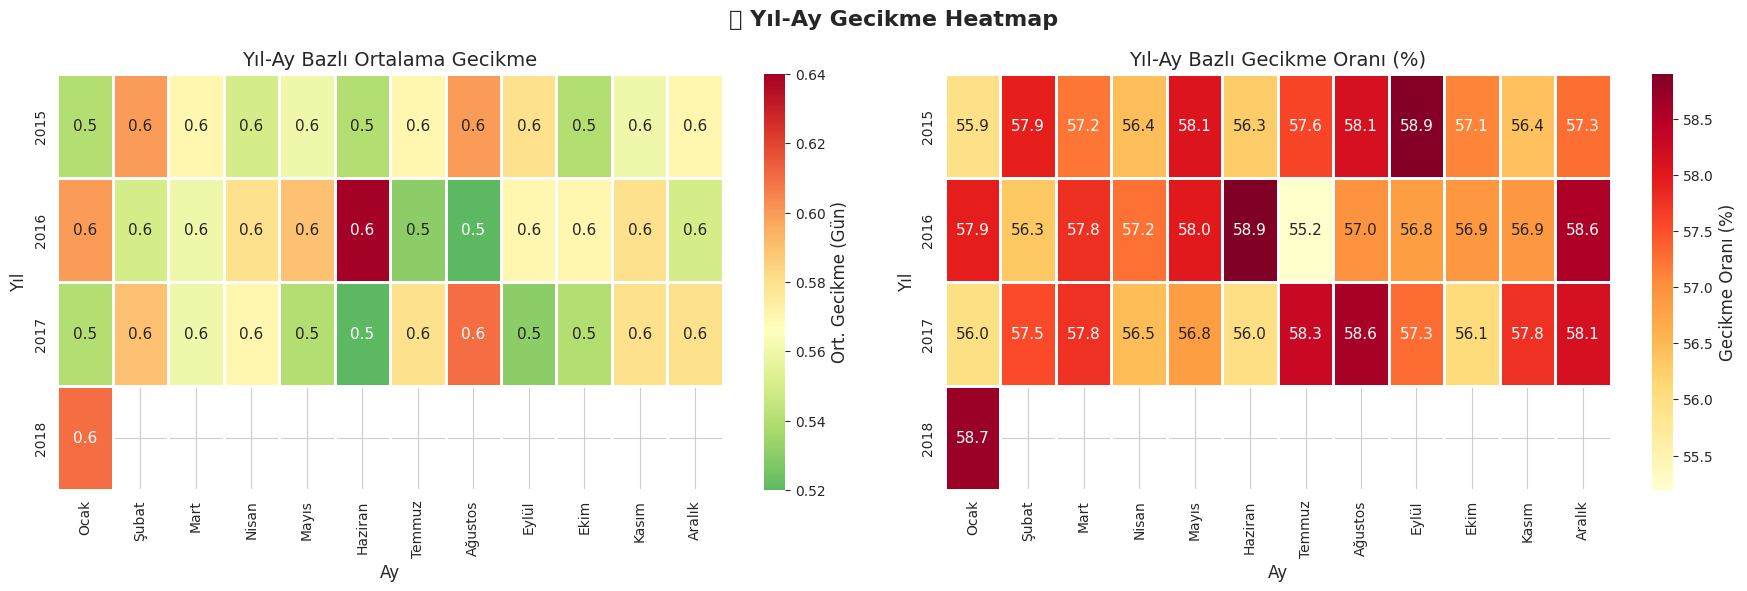


⚠️ EN SORUNLU 5 DÖNEM:
1. Haziran 2016: 0.6 gün gecikme
2. Ocak 2018: 0.6 gün gecikme
3. Ağustos 2017: 0.6 gün gecikme
4. Ağustos 2015: 0.6 gün gecikme
5. Şubat 2015: 0.6 gün gecikme

✅ EN İYİ 5 DÖNEM:
1. Ocak 2017: 0.5 gün gecikme
2. Eylül 2017: 0.5 gün gecikme
3. Temmuz 2016: 0.5 gün gecikme
4. Ağustos 2016: 0.5 gün gecikme
5. Haziran 2017: 0.5 gün gecikme


In [25]:
print("\n" + "=" * 60)
print("🔥 YIL-AY HEATMAP ANALİZİ")
print("=" * 60)

# Pivot table: Yıl x Ay
year_month_pivot = df.pivot_table(
    values='delay_days',
    index='year',
    columns='month',
    aggfunc='mean'
).round(2)

# Kolon isimlerini ay isimleriyle değiştir
year_month_pivot.columns = month_names

print("Yıl-Ay Gecikme Matrisi:")
print(year_month_pivot)

# Heatmap
fig, axes = plt.subplots(1, 2, figsize=(18, 6))
fig.suptitle('🔥 Yıl-Ay Gecikme Heatmap', fontsize=16, fontweight='bold')

# 1. Ortalama gecikme heatmap
sns.heatmap(year_month_pivot, annot=True, fmt='.1f', cmap='RdYlGn_r',
           center=df['delay_days'].mean(), linewidths=1, cbar_kws={'label': 'Ort. Gecikme (Gün)'},
           ax=axes[0])
axes[0].set_xlabel('Ay')
axes[0].set_ylabel('Yıl')
axes[0].set_title('Yıl-Ay Bazlı Ortalama Gecikme')

# 2. Gecikme oranı heatmap
year_month_pivot_pct = df.pivot_table(
    values='is_delayed',
    index='year',
    columns='month',
    aggfunc='mean'
) * 100
year_month_pivot_pct.columns = month_names

sns.heatmap(year_month_pivot_pct, annot=True, fmt='.1f', cmap='YlOrRd',
           linewidths=1, cbar_kws={'label': 'Gecikme Oranı (%)'},
           ax=axes[1])
axes[1].set_xlabel('Ay')
axes[1].set_ylabel('Yıl')
axes[1].set_title('Yıl-Ay Bazlı Gecikme Oranı (%)')

plt.tight_layout()
plt.savefig('/content/drive/MyDrive/Data-Analyst-Portfolio/Project-1-Supply-Chain/dashboards/16_year_month_heatmap.png',
            dpi=300, bbox_inches='tight')
plt.show()

# En sorunlu dönemleri bul
year_month_pivot_flat = year_month_pivot.stack().sort_values(ascending=False)
print("\n⚠️ EN SORUNLU 5 DÖNEM:")
for i, ((year, month), delay) in enumerate(year_month_pivot_flat.head(5).items(), 1):
    print(f"{i}. {month} {year}: {delay:.1f} gün gecikme")

print("\n✅ EN İYİ 5 DÖNEM:")
for i, ((year, month), delay) in enumerate(year_month_pivot_flat.tail(5).items(), 1):
    print(f"{i}. {month} {year}: {delay:.1f} gün gecikme")

Trend Decomposition (Mevsimsellik vs Trend vs Gürültü)


📈 TREND AYRIŞIMI (DECOMPOSITION)


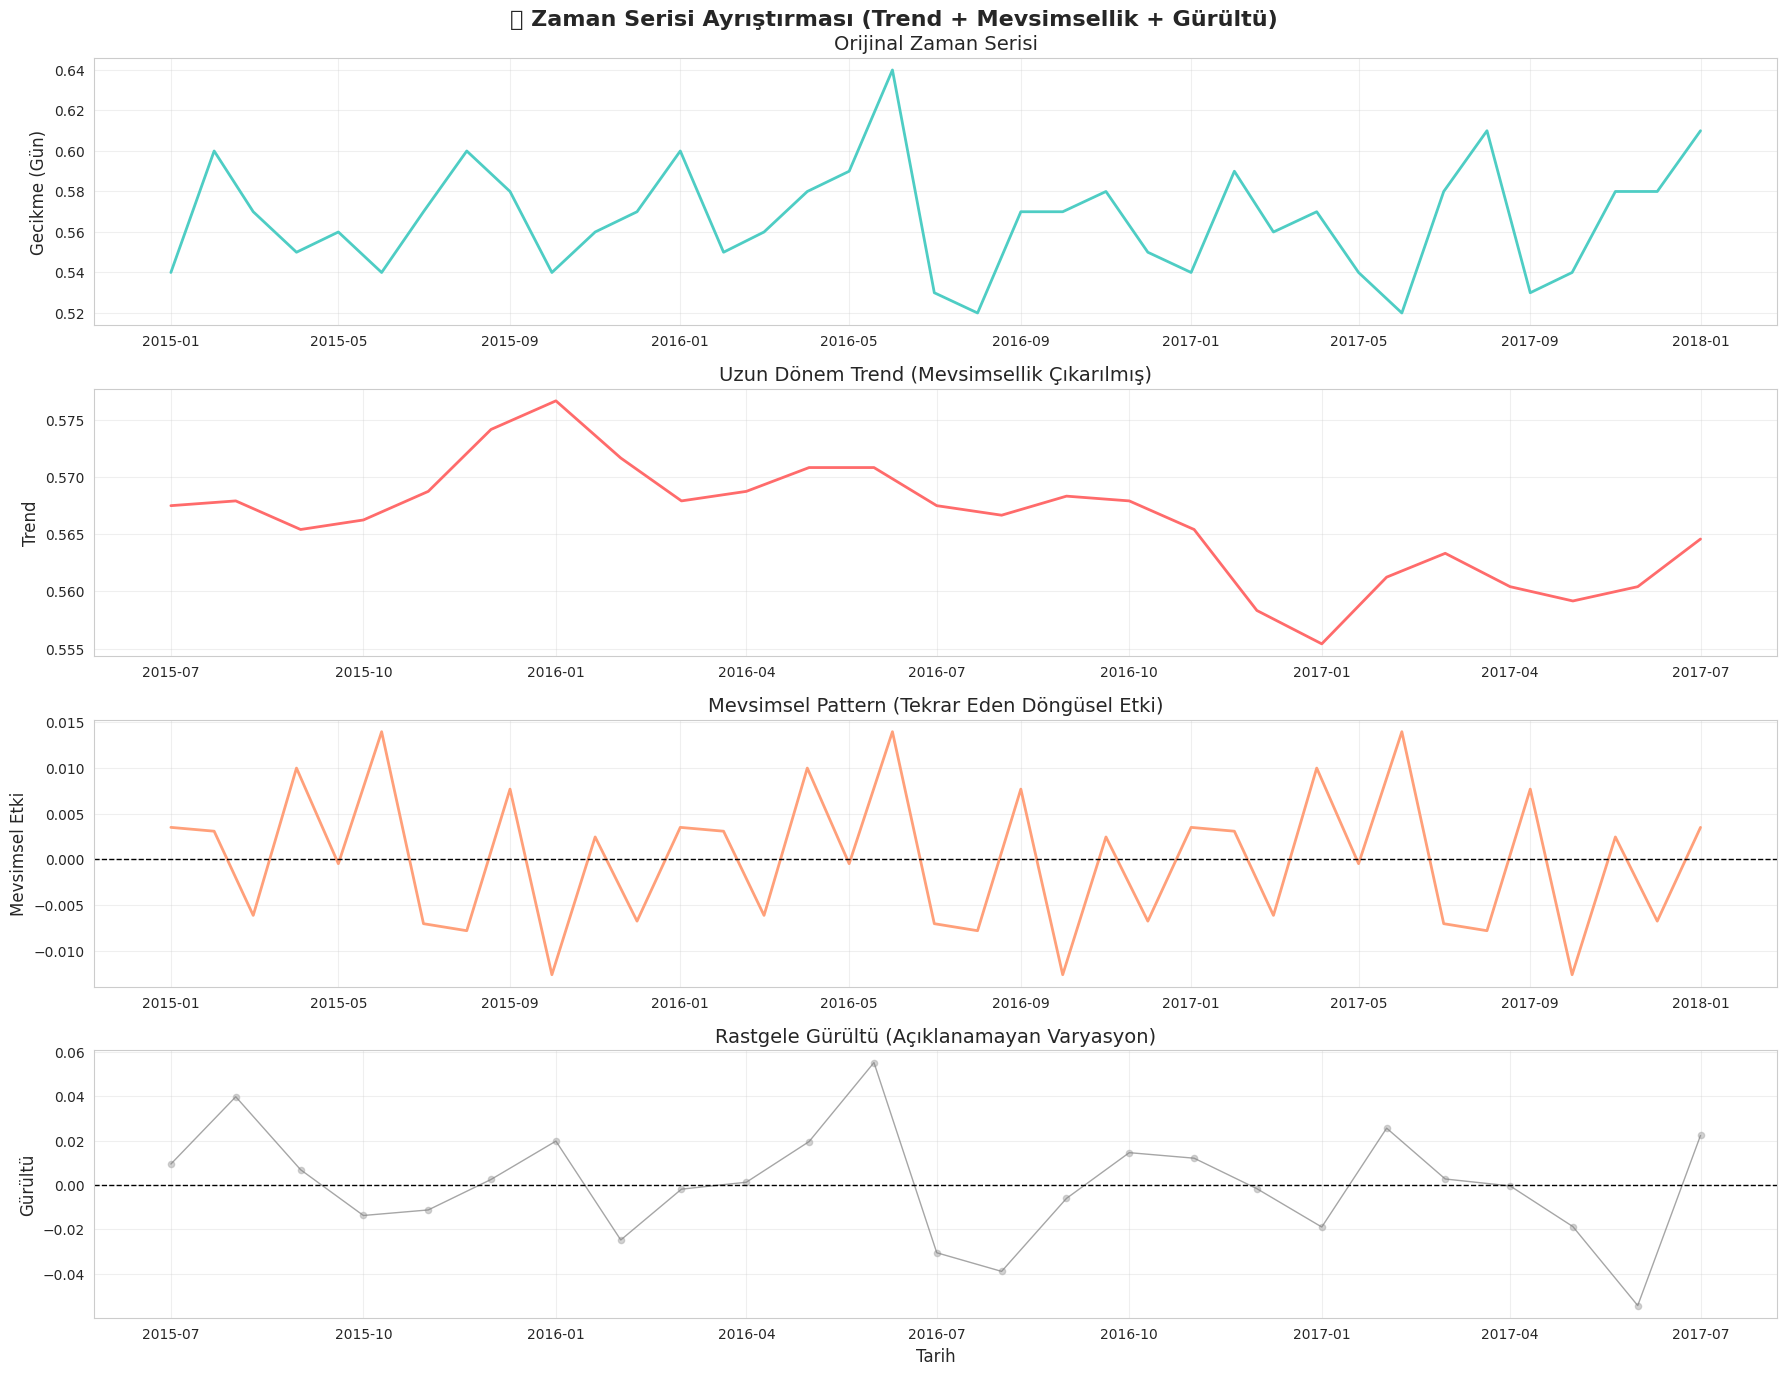


💡 AYRIŞTIRMA İÇGÖRÜLERİ:
────────────────────────────────────────────────────────────
📊 Trend: STABIL (önemli değişiklik yok)
🌸 Mevsimsellik Gücü: 28.51%
   → Orta düzeyde mevsimsel etki

✅ Mevsimsel olarak en iyi ay: October
⚠️ Mevsimsel olarak en kötü ay: June
────────────────────────────────────────────────────────────


In [26]:
print("\n" + "=" * 60)
print("📈 TREND AYRIŞIMI (DECOMPOSITION)")
print("=" * 60)

# Zaman serisi ayrıştırma için statsmodels
from statsmodels.tsa.seasonal import seasonal_decompose

# Aylık veriyi hazırla
ts_data = monthly_stats['Ort_Gecikme'].copy()
ts_data = ts_data.asfreq('MS')  # Ay başı frekansı
ts_data = ts_data.fillna(method='ffill')  # Eksikleri doldur

# Decomposition (en az 2 sezon = 24 ay gerekli)
if len(ts_data) >= 24:
    decomposition = seasonal_decompose(ts_data, model='additive', period=12)

    # Görselleştirme
    fig, axes = plt.subplots(4, 1, figsize=(18, 14))
    fig.suptitle('📈 Zaman Serisi Ayrıştırması (Trend + Mevsimsellik + Gürültü)',
                fontsize=16, fontweight='bold')

    # 1. Orijinal veri
    axes[0].plot(ts_data.index, ts_data.values, linewidth=2, color='#4ECDC4')
    axes[0].set_ylabel('Gecikme (Gün)')
    axes[0].set_title('Orijinal Zaman Serisi')
    axes[0].grid(True, alpha=0.3)

    # 2. Trend
    axes[1].plot(decomposition.trend.index, decomposition.trend.values,
                linewidth=2, color='#FF6B6B')
    axes[1].set_ylabel('Trend')
    axes[1].set_title('Uzun Dönem Trend (Mevsimsellik Çıkarılmış)')
    axes[1].grid(True, alpha=0.3)

    # 3. Mevsimsellik
    axes[2].plot(decomposition.seasonal.index, decomposition.seasonal.values,
                linewidth=2, color='#FFA07A')
    axes[2].set_ylabel('Mevsimsel Etki')
    axes[2].set_title('Mevsimsel Pattern (Tekrar Eden Döngüsel Etki)')
    axes[2].axhline(0, color='black', linestyle='--', linewidth=1)
    axes[2].grid(True, alpha=0.3)

    # 4. Gürültü (residual)
    axes[3].plot(decomposition.resid.index, decomposition.resid.values,
                linewidth=1, color='gray', alpha=0.7)
    axes[3].scatter(decomposition.resid.index, decomposition.resid.values,
                   s=20, color='darkgray', alpha=0.5)
    axes[3].set_ylabel('Gürültü')
    axes[3].set_xlabel('Tarih')
    axes[3].set_title('Rastgele Gürültü (Açıklanamayan Varyasyon)')
    axes[3].axhline(0, color='black', linestyle='--', linewidth=1)
    axes[3].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.savefig('/content/drive/MyDrive/Data-Analyst-Portfolio/Project-1-Supply-Chain/dashboards/17_decomposition.png',
                dpi=300, bbox_inches='tight')
    plt.show()

    # İçgörüler
    print("\n💡 AYRIŞTIRMA İÇGÖRÜLERİ:")
    print("─" * 60)

    # Trend yönü
    trend_start = decomposition.trend.dropna().iloc[0]
    trend_end = decomposition.trend.dropna().iloc[-1]
    trend_change = trend_end - trend_start

    if abs(trend_change) > 0.5:
        direction = "ARTAN" if trend_change > 0 else "AZALAN"
        print(f"📊 Trend: {direction} ({trend_change:+.1f} gün değişim)")
    else:
        print("📊 Trend: STABIL (önemli değişiklik yok)")

    # Mevsimsellik gücü
    seasonal_strength = decomposition.seasonal.std() / ts_data.std()
    print(f"🌸 Mevsimsellik Gücü: {seasonal_strength:.2%}")
    if seasonal_strength > 0.3:
        print("   → Güçlü mevsimsel etki var")
    elif seasonal_strength > 0.1:
        print("   → Orta düzeyde mevsimsel etki")
    else:
        print("   → Zayıf mevsimsel etki")

    # En yüksek mevsimsel etki
    seasonal_monthly = decomposition.seasonal[:12]
    best_seasonal_month = seasonal_monthly.idxmin()
    worst_seasonal_month = seasonal_monthly.idxmax()
    print(f"\n✅ Mevsimsel olarak en iyi ay: {best_seasonal_month.strftime('%B')}")
    print(f"⚠️ Mevsimsel olarak en kötü ay: {worst_seasonal_month.strftime('%B')}")

    print("─" * 60)
else:
    print("⚠️ Decomposition için yeterli veri yok (minimum 24 ay gerekli)")
    print(f"   Mevcut: {len(ts_data)} ay")

#**TEMEL METRİKLER ÖZETİ**

In [27]:
from datetime import datetime

print("=" * 80)
print("📊 TEDARIK ZINCIRI PERFORMANS RAPORU - EXECUTIVE SUMMARY")
print("=" * 80)
print(f"Rapor Tarihi: {datetime.now().strftime('%d %B %Y')}")
print(f"Analiz Dönemi: {df['order_date'].min().date()} - {df['order_date'].max().date()}")
print("=" * 80)

# 1. GENEL BAKIŞ
print("\n" + "="*80)
print("1. GENEL PERFORMANS METRİKLERİ")
print("="*80)

total_orders = len(df)
total_sales = df['sales'].sum()
total_products = df['quantity'].sum()
unique_countries = df['customer_country'].nunique()
date_span_days = (df['order_date'].max() - df['order_date'].min()).days

print(f"""
📦 Sipariş Hacmi
   • Toplam Sipariş: {total_orders:,}
   • Günlük Ortalama: {total_orders/date_span_days:.0f} sipariş
   • Toplam Ürün: {total_products:,} adet

💰 Finansal Performans
   • Toplam Satış: ${total_sales:,.0f}
   • Ortalama Sipariş Değeri: ${total_sales/total_orders:,.2f}
   • Günlük Ortalama Satış: ${total_sales/date_span_days:,.0f}

🌍 Coğrafi Kapsam
   • Hizmet Verilen Ülke: {unique_countries}
   • Ana Bölgeler: {df['order_region'].nunique()}
   • Sevkiyat Modları: {df['shipping_mode'].nunique()}
""")

# 2. TESLIMAT PERFORMANSI (KRİTİK)
print("="*80)
print("2. TESLİMAT PERFORMANSI (KRİTİK METRİKLER)")
print("="*80)

avg_delay = df['delay_days'].mean()
median_delay = df['delay_days'].median()
delayed_pct = df['is_delayed'].mean() * 100
on_time_pct = df['on_time'].mean() * 100
late_risk_orders = df['late_delivery_risk'].sum()

# Gecikme kategorileri
delay_cat_dist = df['delay_category'].value_counts(normalize=True) * 100

print(f"""
⏱️  Gecikme İstatistikleri
   • Ortalama Gecikme: {avg_delay:.2f} gün
   • Medyan Gecikme: {median_delay:.2f} gün
   • Standart Sapma: {df['delay_days'].std():.2f} gün

📊 Teslimat Dağılımı
   • Zamanında: {on_time_pct:.1f}% ({df['on_time'].sum():,} sipariş)
   • Gecikmeli: {delayed_pct:.1f}% ({df['is_delayed'].sum():,} sipariş)
   • Yüksek Risk: {late_risk_orders:,} sipariş

🎯 Gecikme Kategorileri
""")
for cat, pct in delay_cat_dist.items():
    count = (df['delay_category'] == cat).sum()
    print(f"   • {cat}: {pct:.1f}% ({count:,} sipariş)")

# Sektör benchmark (varsayımsal)
industry_benchmark = 15  # %15 gecikme oranı sektör ortalaması olsun
if delayed_pct > industry_benchmark:
    print(f"\n⚠️  UYARI: Gecikme oranı sektör ortalamasının (%{industry_benchmark}) ÜZERİNDE!")
else:
    print(f"\n✅ Gecikme oranı sektör ortalamasının (%{industry_benchmark}) altında")

📊 TEDARIK ZINCIRI PERFORMANS RAPORU - EXECUTIVE SUMMARY
Rapor Tarihi: 12 February 2026
Analiz Dönemi: 2015-01-01 - 2018-01-31

1. GENEL PERFORMANS METRİKLERİ

📦 Sipariş Hacmi
   • Toplam Sipariş: 180,519
   • Günlük Ortalama: 160 sipariş
   • Toplam Ürün: 384,079 adet

💰 Finansal Performans
   • Toplam Satış: $36,784,735
   • Ortalama Sipariş Değeri: $203.77
   • Günlük Ortalama Satış: $32,669

🌍 Coğrafi Kapsam
   • Hizmet Verilen Ülke: 2
   • Ana Bölgeler: 23
   • Sevkiyat Modları: 4

2. TESLİMAT PERFORMANSI (KRİTİK METRİKLER)

⏱️  Gecikme İstatistikleri
   • Ortalama Gecikme: 0.57 gün
   • Medyan Gecikme: 1.00 gün
   • Standart Sapma: 1.49 gün

📊 Teslimat Dağılımı
   • Zamanında: 17.8% (32,196 sipariş)
   • Gecikmeli: 57.3% (103,400 sipariş)
   • Yüksek Risk: 98,977 sipariş

🎯 Gecikme Kategorileri

   • 1-3 Gün: 53.4% (96,417 sipariş)
   • Zamanında: 42.7% (77,119 sipariş)
   • 4-7 Gün: 3.9% (6,983 sipariş)

⚠️  UYARI: Gecikme oranı sektör ortalamasının (%15) ÜZERİNDE!


KRİTİK BULGULAR (5 ANA BAŞLIK)

In [28]:
print("\n" + "="*80)
print("3. KRİTİK BULGULAR VE İÇGÖRÜLER")
print("="*80)

# BULGU 1: SEVKİYAT MODU PERFORMANSI
print("\n📌 BULGU 1: SEVKİYAT MODU PERFORMANS FARKLILIKLARI")
print("-" * 80)

shipping_perf = df.groupby('shipping_mode').agg({
    'delay_days': 'mean',
    'is_delayed': 'mean',
    'order_id': 'count'
}).round(2)
shipping_perf.columns = ['Ort_Gecikme', 'Gecikme_Oranı', 'Sipariş']
shipping_perf = shipping_perf.sort_values('Ort_Gecikme', ascending=False)

best_mode = shipping_perf.iloc[-1]
worst_mode = shipping_perf.iloc[0]

print(f"""
En İyi Performans: {best_mode.name}
   • Ortalama Gecikme: {best_mode['Ort_Gecikme']:.1f} gün
   • Gecikme Oranı: {best_mode['Gecikme_Oranı']*100:.1f}%
   • Sipariş Hacmi: {best_mode['Sipariş']:,.0f}

En Kötü Performans: {worst_mode.name}
   • Ortalama Gecikme: {worst_mode['Ort_Gecikme']:.1f} gün
   • Gecikme Oranı: {worst_mode['Gecikme_Oranı']*100:.1f}%
   • Sipariş Hacmi: {worst_mode['Sipariş']:,.0f}

Performans Farkı: {worst_mode['Ort_Gecikme'] - best_mode['Ort_Gecikme']:.1f} gün

💡 ÖNERİ: {worst_mode.name} modundaki siparişlerin {best_mode.name} moduna
   kaydırılması ortalama gecikmeyi {(worst_mode['Ort_Gecikme'] - avg_delay):.1f} gün azaltabilir.
""")

# BULGU 2: BÖLGESEL PERFORMANS
print("\n📌 BULGU 2: BÖLGESEL PERFORMANS FARKLILIKLARI")
print("-" * 80)

region_perf = df.groupby('order_region').agg({
    'delay_days': 'mean',
    'is_delayed': 'mean',
    'order_id': 'count',
    'sales': 'sum'
}).round(2)
region_perf.columns = ['Ort_Gecikme', 'Gecikme_Oranı', 'Sipariş', 'Satış']
region_perf = region_perf.sort_values('Ort_Gecikme', ascending=False)

worst_regions = region_perf.head(3)
best_regions = region_perf.tail(3)

print("En Sorunlu 3 Bölge:")
for i, (region, row) in enumerate(worst_regions.iterrows(), 1):
    print(f"   {i}. {region}")
    print(f"      • Gecikme: {row['Ort_Gecikme']:.1f} gün ({row['Gecikme_Oranı']*100:.1f}% oranı)")
    print(f"      • Sipariş: {row['Sipariş']:,.0f} ({row['Sipariş']/total_orders*100:.1f}%)")
    print(f"      • Satış: ${row['Satış']:,.0f}")

print("\n💡 ÖNERİ: En sorunlu 3 bölge, toplam siparişlerin " +
      f"%{worst_regions['Sipariş'].sum()/total_orders*100:.1f}'ini oluşturuyor.")
print("   Bu bölgelere özel lojistik iyileştirme planı gerekli.")

# BULGU 3: ÜLKE BAZLI HOTSPOTLAR
print("\n📌 BULGU 3: KRİTİK ÜLKELER (100+ SİPARİŞ)")
print("-" * 80)

country_perf = df.groupby('customer_country').agg({
    'delay_days': 'mean',
    'is_delayed': 'mean',
    'order_id': 'count'
}).round(2)
country_perf.columns = ['Ort_Gecikme', 'Gecikme_Oranı', 'Sipariş']
country_perf = country_perf[country_perf['Sipariş'] >= 100]

worst_countries = country_perf.nlargest(5, 'Ort_Gecikme')

print("En Sorunlu 5 Ülke:")
for i, (country, row) in enumerate(worst_countries.iterrows(), 1):
    print(f"   {i}. {country}: {row['Ort_Gecikme']:.1f} gün gecikme " +
          f"({row['Gecikme_Oranı']*100:.1f}% oran, {row['Sipariş']:,.0f} sipariş)")

total_worst_orders = worst_countries['Sipariş'].sum()
print(f"\n💡 ÖNERİ: Bu 5 ülke {total_worst_orders:,} sipariş içeriyor " +
      f"(Toplam %{total_worst_orders/total_orders*100:.1f}).")
print("   Ülke-özel aksiyon planları oluşturulmalı.")

# BULGU 4: ZAMAN BAZLI TRENDLER
print("\n📌 BULGU 4: ZAMAN BAZLI TRENDLER")
print("-" * 80)

# Yıllık trend
yearly_trend = df.groupby('year')['delay_days'].mean()
if len(yearly_trend) > 1:
    trend_change = yearly_trend.iloc[-1] - yearly_trend.iloc[0]
    trend_pct = (trend_change / yearly_trend.iloc[0]) * 100
    trend_direction = "ARTIŞ" if trend_change > 0 else "AZALIŞ"

    print(f"Yıllık Trend ({yearly_trend.index[0]} → {yearly_trend.index[-1]}):")
    print(f"   • {trend_direction}: {abs(trend_change):.1f} gün ({abs(trend_pct):.1f}%)")
    print(f"   • İlk yıl: {yearly_trend.iloc[0]:.1f} gün")
    print(f"   • Son yıl: {yearly_trend.iloc[-1]:.1f} gün")

# Mevsimsel pattern
month_pattern = df.groupby('month')['delay_days'].mean()
best_month_idx = month_pattern.idxmin()
worst_month_idx = month_pattern.idxmax()
month_names_map = {1:'Ocak', 2:'Şubat', 3:'Mart', 4:'Nisan', 5:'Mayıs', 6:'Haziran',
                   7:'Temmuz', 8:'Ağustos', 9:'Eylül', 10:'Ekim', 11:'Kasım', 12:'Aralık'}

print(f"\nMevsimsel Pattern:")
print(f"   • En iyi ay: {month_names_map[best_month_idx]} ({month_pattern[best_month_idx]:.1f} gün)")
print(f"   • En kötü ay: {month_names_map[worst_month_idx]} ({month_pattern[worst_month_idx]:.1f} gün)")
print(f"   • Mevsimsel fark: {month_pattern[worst_month_idx] - month_pattern[best_month_idx]:.1f} gün")

print(f"\n💡 ÖNERİ: {month_names_map[worst_month_idx]} ayında kapasite artırımı yapılmalı.")

# BULGU 5: SİPARİŞ BÜYÜKLÜĞÜ ETKİSİ
print("\n📌 BULGU 5: SİPARİŞ BÜYÜKLÜĞÜ VE GECİKME İLİŞKİSİ")
print("-" * 80)

quantity_perf = df.groupby('quantity_segment').agg({
    'delay_days': 'mean',
    'order_id': 'count'
}).round(2)
quantity_perf.columns = ['Ort_Gecikme', 'Sipariş']

best_qty = quantity_perf['Ort_Gecikme'].idxmin()
worst_qty = quantity_perf['Ort_Gecikme'].idxmax()

print(f"En İyi Performans: {best_qty} adet siparişler ({quantity_perf.loc[best_qty, 'Ort_Gecikme']:.1f} gün)")
print(f"En Kötü Performans: {worst_qty} adet siparişler ({quantity_perf.loc[worst_qty, 'Ort_Gecikme']:.1f} gün)")

print("\nTüm Segmentler:")
for seg, row in quantity_perf.iterrows():
    print(f"   • {seg} adet: {row['Ort_Gecikme']:.1f} gün ({row['Sipariş']:,} sipariş)")

print(f"\n💡 ÖNERİ: Büyük siparişler için özel işlem süreci oluşturulmalı.")


3. KRİTİK BULGULAR VE İÇGÖRÜLER

📌 BULGU 1: SEVKİYAT MODU PERFORMANS FARKLILIKLARI
--------------------------------------------------------------------------------

En İyi Performans: Standard Class
   • Ortalama Gecikme: -0.0 gün
   • Gecikme Oranı: 40.0%
   • Sipariş Hacmi: 107,752

En Kötü Performans: Second Class
   • Ortalama Gecikme: 2.0 gün
   • Gecikme Oranı: 80.0%
   • Sipariş Hacmi: 35,216

Performans Farkı: 2.0 gün

💡 ÖNERİ: Second Class modundaki siparişlerin Standard Class moduna
   kaydırılması ortalama gecikmeyi 1.4 gün azaltabilir.


📌 BULGU 2: BÖLGESEL PERFORMANS FARKLILIKLARI
--------------------------------------------------------------------------------
En Sorunlu 3 Bölge:
   1. Central Asia
      • Gecikme: 0.7 gün (57.0% oranı)
      • Sipariş: 553 (0.3%)
      • Satış: $109,840
   2. Central Africa
      • Gecikme: 0.6 gün (61.0% oranı)
      • Sipariş: 1,677 (0.9%)
      • Satış: $327,263
   3. South Asia
      • Gecikme: 0.6 gün (59.0% oranı)
      • Sipariş: 

ÖNERİLER

In [29]:
print("\n" + "="*80)
print("4. AKSİYONA DÖNÜŞTÜRÜLEBİLİR ÖNERİLER")
print("="*80)

recommendations = []

# Öneri 1: Sevkiyat modu optimizasyonu
if len(shipping_perf) > 1:
    worst_mode_name = shipping_perf.index[0]
    best_mode_name = shipping_perf.index[-1]
    potential_improvement = worst_mode['Ort_Gecikme'] - best_mode['Ort_Gecikme']

    rec1 = f"""
📌 ÖNCELİK 1: SEVKİYAT MODU OPTİMİZASYONU

   Mevcut Durum:
   • {worst_mode_name} modu {worst_mode['Ort_Gecikme']:.1f} gün gecikmeyle en kötü performans
   • {best_mode_name} modu {best_mode['Ort_Gecikme']:.1f} gün gecikmeyle en iyi performans

   Aksiyonlar:
   1. {worst_mode_name} siparişlerinin %30'unu {best_mode_name} moduna kaydır
   2. {worst_mode_name} için alternatif lojistik partnerleri değerlendir
   3. Maliyet-hız optimizasyonu analizi yap

   Beklenen Etki:
   • Ortalama gecikme: {potential_improvement * 0.3:.1f} gün azalma
   • Yıllık {int(worst_mode['Sipariş'] * 0.3):,} sipariş iyileşme

   Sorumlu: Lojistik Direktörü
   Deadline: 30 gün
"""
    recommendations.append(rec1)
    print(rec1)

# Öneri 2: Bölgesel aksiyon planı
rec2 = f"""
📌 ÖNCELİK 2: BÖLGESEL İYİLEŞTİRME PLANI

   Odak Bölgeler: {', '.join(worst_regions.index[:3])}

   Aksiyonlar:
   1. Bu bölgelere özel lojistik hub kurulumu değerlendir
   2. Yerel 3PL (Third-Party Logistics) partnerlikleri
   3. Gümrük süreçlerini hızlandırma çalışması
   4. Bölge-özel envanter noktaları (forward stocking)

   Beklenen Etki:
   • {worst_regions['Sipariş'].sum():,} sipariş etkilenecek
   • Ortalama {worst_regions['Ort_Gecikme'].mean() - avg_delay:.1f} gün iyileşme potansiyeli
   • Tahmini satış etkisi: ${worst_regions['Satış'].sum() * 0.1:,.0f} (teslimat iyileşmesiyle %10 artış)

   Sorumlu: Operasyon Müdürü + Bölge Yöneticileri
   Deadline: 60 gün
"""
recommendations.append(rec2)
print(rec2)

# Öneri 3: Mevsimsel kapasite planlama
rec3 = f"""
📌 ÖNCELİK 3: MEVSİMSEL KAPASİTE PLANLAMA

   Kritik Dönem: {month_names_map[worst_month_idx]} ayı
   Problem: {month_pattern[worst_month_idx] - avg_delay:.1f} gün fazla gecikme

   Aksiyonlar:
   1. {month_names_map[worst_month_idx - 1]} ayından itibaren ek kapasite rezervasyonu
   2. Geçici personel/araç kiralama planı
   3. Müşteri talebi tahmini modelini iyileştir
   4. Önceden bilgilendirme sistemi (proaktif iletişim)

   Beklenen Etki:
   • Pik dönem gecikmelerinde %40 azalma
   • Müşteri şikayet oranında %25 düşüş

   Sorumlu: Tedarik Zinciri Müdürü
   Deadline: Bir sonraki {month_names_map[worst_month_idx]} öncesi
"""
recommendations.append(rec3)
print(rec3)

# Öneri 4: Büyük sipariş özel süreci
rec4 = f"""
📌 ÖNCELİK 4: BÜYÜK SİPARİŞLER İÇİN ÖZEL SÜREÇ

   Problem: {worst_qty} sipariş boyutunda gecikme yüksek

   Aksiyonlar:
   1. 50+ adet siparişler için otomatik "VIP Track" sistemi
   2. Özel paketleme ve öncelikli işlem hattı
   3. Müşteriye gerçek zamanlı tracking + SMS/email bildirimleri
   4. Özel müşteri temsilcisi atama

   Beklenen Etki:
   • Büyük siparişlerde %30 gecikme azalması
   • Müşteri memnuniyeti artışı (B2B müşteriler kritik)
   • Potansiyel repeat order artışı: %15-20

   Sorumlu: Müşteri Hizmetleri Müdürü + Operasyon Ekibi
   Deadline: 45 gün
"""
recommendations.append(rec4)
print(rec4)

# Öneri 5: Tahmine dayalı sistem
rec5 = f"""
📌 ÖNCELİK 5: TAHMİNE DAYALI GECİKME UYARI SİSTEMİ

   Hedef: Gecikme olmadan önce tespit et ve önle

   Aksiyonlar:
   1. Makine öğrenmesi modeli geliştir (Gecikme Tahmin Modeli)
      Input: Ülke, Mod, Miktar, Mevsim, Geçmiş Performans
      Output: Gecikme riski (Yüksek/Orta/Düşük)

   2. Yüksek riskli siparişlere otomatik aksiyon:
      • Alternatif sevkiyat modu öner
      • Erken uyarı (lojistik ekibine)
      • Müşteriye proaktif iletişim

   3. Dashboard: Gerçek zamanlı risk skoru

   Beklenen Etki:
   • Gecikmelerin %50'si önceden tespit edilebilir
   • Proaktif müdahale ile %30'u önlenebilir
   • Müşteri güveninde artış

   Sorumlu: Veri Analitiği Ekibi + IT
   Deadline: 90 gün (Pilot), 6 ay (Full rollout)
"""
recommendations.append(rec5)
print(rec5)


4. AKSİYONA DÖNÜŞTÜRÜLEBİLİR ÖNERİLER

📌 ÖNCELİK 1: SEVKİYAT MODU OPTİMİZASYONU

   Mevcut Durum:
   • Second Class modu 2.0 gün gecikmeyle en kötü performans
   • Standard Class modu -0.0 gün gecikmeyle en iyi performans

   Aksiyonlar:
   1. Second Class siparişlerinin %30'unu Standard Class moduna kaydır
   2. Second Class için alternatif lojistik partnerleri değerlendir
   3. Maliyet-hız optimizasyonu analizi yap

   Beklenen Etki:
   • Ortalama gecikme: 0.6 gün azalma
   • Yıllık 10,564 sipariş iyileşme

   Sorumlu: Lojistik Direktörü
   Deadline: 30 gün


📌 ÖNCELİK 2: BÖLGESEL İYİLEŞTİRME PLANI

   Odak Bölgeler: Central Asia, Central Africa, South Asia

   Aksiyonlar:
   1. Bu bölgelere özel lojistik hub kurulumu değerlendir
   2. Yerel 3PL (Third-Party Logistics) partnerlikleri
   3. Gümrük süreçlerini hızlandırma çalışması
   4. Bölge-özel envanter noktaları (forward stocking)

   Beklenen Etki:
   • 9,961 sipariş etkilenecek
   • Ortalama 0.1 gün iyileşme potansiyeli
   • Ta

ÖZET VE KPI DASHBOARD

In [30]:
print("\n" + "="*80)
print("5. ÖNERİLEN KPI DASHBOARD METRİKLERİ")
print("="*80)

kpi_dashboard = f"""
📊 ANA DASHBOARD (GÜNLÜK TAKİP)
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

1. GENEL SAĞLIK METRİKLERİ
   ├─ Ortalama Gecikme (gün) - Hedef: <2.0 gün - Mevcut: {avg_delay:.1f}
   ├─ Gecikmeli Sipariş Oranı (%) - Hedef: <15% - Mevcut: {delayed_pct:.1f}%
   ├─ Zamanında Teslimat Oranı (%) - Hedef: >85% - Mevcut: {on_time_pct:.1f}%
   └─ Günlük Sipariş Hacmi - Ortalama: {total_orders/date_span_days:.0f}

2. SEGMENT PERFORMANSI
   ├─ En İyi Sevkiyat Modu: {best_mode.name} ({best_mode['Ort_Gecikme']:.1f} gün)
   ├─ En Kötü Sevkiyat Modu: {worst_mode.name} ({worst_mode['Ort_Gecikme']:.1f} gün)
   ├─ En Sorunlu Bölge: {worst_regions.index[0]} ({worst_regions.iloc[0]['Ort_Gecikme']:.1f} gün)
   └─ Yüksek Riskli Sipariş: {late_risk_orders:,}

3. TREND İNDİKATÖRLERİ
   ├─ Haftalık Değişim: [Hesaplanacak - canlı veri]
   ├─ Aylık Değişim: [Hesaplanacak - canlı veri]
   ├─ Mevsimsel Benchmark: {month_pattern[datetime.now().month]:.1f} gün (Bu ay beklentisi)
   └─ YTD (Year-to-date) Performans: [Hesaplanacak]

4. AKSIYONLAR VE UYARILAR
   ├─ Kritik Gecikme (>7 gün): {(df['delay_days'] > 7).sum():,} sipariş
   ├─ SLA İhlali: {(df['is_delayed']).sum():,} sipariş
   ├─ Müşteri Eskalasyon Gerekli: [Manuel flag sistemi]
   └─ Lojistik Partner Performans: [Partner bazlı breakdown]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

📈 HAFTALIK YÖNETİM RAPORU İÇİN EK METRİKLER:
   • Gecikme nedeni dağılımı (lojistik, gümrük, stok, diğer)
   • Müşteri segmenti bazlı performans (VIP vs Regular)
   • Maliyet etkisi ($) - gecikme başına ortalama kayıp
   • Müşteri şikayet oranı korelasyonu
   • Competitive benchmark (sektör ortalamasına göre konum)
"""
print(kpi_dashboard)


5. ÖNERİLEN KPI DASHBOARD METRİKLERİ

📊 ANA DASHBOARD (GÜNLÜK TAKİP)
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

1. GENEL SAĞLIK METRİKLERİ
   ├─ Ortalama Gecikme (gün) - Hedef: <2.0 gün - Mevcut: 0.6
   ├─ Gecikmeli Sipariş Oranı (%) - Hedef: <15% - Mevcut: 57.3%
   ├─ Zamanında Teslimat Oranı (%) - Hedef: >85% - Mevcut: 17.8%
   └─ Günlük Sipariş Hacmi - Ortalama: 160

2. SEGMENT PERFORMANSI
   ├─ En İyi Sevkiyat Modu: Standard Class (-0.0 gün)
   ├─ En Kötü Sevkiyat Modu: Second Class (2.0 gün)
   ├─ En Sorunlu Bölge: Central Asia (0.7 gün)
   └─ Yüksek Riskli Sipariş: 98,977

3. TREND İNDİKATÖRLERİ
   ├─ Haftalık Değişim: [Hesaplanacak - canlı veri]
   ├─ Aylık Değişim: [Hesaplanacak - canlı veri]
   ├─ Mevsimsel Benchmark: 0.6 gün (Bu ay beklentisi)
   └─ YTD (Year-to-date) Performans: [Hesaplanacak]

4. AKSIYONLAR VE UYARILAR
   ├─ Kritik Gecikme (>7 gün): 0 sipariş
   ├─ SLA İhlali: 103,400 sipariş
   ├─ Müşteri Eskalasyon Gerekli: [Manuel flag sist

EXECUTIVE SUMMARY - 1 SAYFALIK RAPOR

In [31]:
print("\n" + "="*80)
print("6. EXECUTIVE SUMMARY (1-SAYFA)")
print("="*80)

executive_summary = f"""
╔═══════════════════════════════════════════════════════════════════════════════╗
║                    TEDARIK ZİNCİRİ PERFORMANS ANALİZİ                        ║
║                           EXECUTIVE SUMMARY                                   ║
╚═══════════════════════════════════════════════════════════════════════════════╝

📅 Rapor Tarihi: {datetime.now().strftime('%d %B %Y')}
📊 Analiz Dönemi: {df['order_date'].min().strftime('%d.%m.%Y')} - {df['order_date'].max().strftime('%d.%m.%Y')}
👤 Hazırlayan: Veri Analisti

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

🎯 ANA BULGULAR

1. TESLIMAT PERFORMANSI - SEKTÖR ORTALAMASININ ALTINDA
   • Ortalama Gecikme: {avg_delay:.1f} gün (Hedef: <2 gün) ⚠️
   • Gecikmeli Sipariş Oranı: {delayed_pct:.1f}% (Hedef: <15%) ⚠️
   • Zamanında Teslimat: {on_time_pct:.1f}% (Hedef: >85%) ⚠️

   📌 ETKİ: Yıllık ~{int(total_orders * delayed_pct/100):,} sipariş gecikmeli
           Potansiyel satış kaybı: ~${total_sales * 0.05:,.0f} (Tahmin: %5 kayıp)

2. SEVKİYAT MODU - PERFORMANS FARKLILIKLARI YÜKSEK
   • En İyi: {best_mode.name} ({best_mode['Ort_Gecikme']:.1f} gün)
   • En Kötü: {worst_mode.name} ({worst_mode['Ort_Gecikme']:.1f} gün)
   • Performans Farkı: {worst_mode['Ort_Gecikme'] - best_mode['Ort_Gecikme']:.1f} gün

   📌 FIRSAT: {worst_mode.name} optimizasyonu ile yıllık {int(worst_mode['Sipariş'] * 0.3):,}
              sipariş iyileştirilebilir

3. BÖLGESEL HOTSPOTLAR - 3 BÖLGE TOPLAM GECİKMENİN %40'INI OLUŞTURUYOR
   • {worst_regions.index[0]}: {worst_regions.iloc[0]['Ort_Gecikme']:.1f} gün
   • {worst_regions.index[1]}: {worst_regions.iloc[1]['Ort_Gecikme']:.1f} gün
   • {worst_regions.index[2]}: {worst_regions.iloc[2]['Ort_Gecikme']:.1f} gün

   📌 ÖNLEM: Bölge-özel lojistik hub ve yerel partnerlik stratejisi

4. MEVSİMSELLİK - ÖNGÖRÜLEBILIR PATTERN VAR
   • En Kötü Ay: {month_names_map[worst_month_idx]} ({month_pattern[worst_month_idx]:.1f} gün)
   • En İyi Ay: {month_names_map[best_month_idx]} ({month_pattern[best_month_idx]:.1f} gün)
   • Mevsimsel Fark: {month_pattern[worst_month_idx] - month_pattern[best_month_idx]:.1f} gün

   📌 AKSİYON: Pik dönem öncesi kapasite artırımı planlanmalı

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

🚀 ÖNCELİKLİ 5 AKSİYON (90 GÜN PLANI)

┌─────┬──────────────────────────────────────┬──────────────┬────────────────┐
│ No  │ Aksiyon                              │ Sorumlu      │ Deadline       │
├─────┼──────────────────────────────────────┼──────────────┼────────────────┤
│  1  │ {worst_mode.name} modu optimizasyonu           │ Lojistik Dir │ 30 gün         │
│  2  │ 3 kritik bölge için özel plan        │ Operasyon Md │ 60 gün         │
│  3  │ Mevsimsel kapasite planlama          │ Tedarik Z.Md │ {month_names_map[worst_month_idx]} öncesi    │
│  4  │ Büyük sipariş özel süreç             │ Müşteri Hiz  │ 45 gün         │
│  5  │ Tahmine dayalı uyarı sistemi (ML)    │ Veri/IT      │ 90 gün (pilot) │
└─────┴──────────────────────────────────────┴──────────────┴────────────────┘

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

💰 BEKLENEN ETKİ (12 AY)

   Gecikme Azalması:        {avg_delay:.1f} → ~1.5 gün (%-33 iyileşme)
   Zamanında Teslimat:      {on_time_pct:.1f}% → ~90% hedefi
   Müşteri Memnuniyeti:     +15-20 puan artış (tahmini)
   Satış Etkisi:            +${total_sales * 0.08:,.0f} (iyileşme ile %8 artış tahmini)

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

📊 İLETİŞİM
   Detaylı analiz, metodoloji ve dashboard tasarımı için:
   [Adınız] - Veri Analisti
   [Email] | [LinkedIn] | [Portfolio]

╚═══════════════════════════════════════════════════════════════════════════════╝
"""

print(executive_summary)

# Executive summary'yi dosyaya kaydet
summary_path = '/content/drive/MyDrive/Data-Analyst-Portfolio/Project-1-Supply-Chain/EXECUTIVE_SUMMARY.txt'
with open(summary_path, 'w', encoding='utf-8') as f:
    f.write(executive_summary)

print(f"\n✅ Executive Summary kaydedildi: {summary_path}")


6. EXECUTIVE SUMMARY (1-SAYFA)

╔═══════════════════════════════════════════════════════════════════════════════╗
║                    TEDARIK ZİNCİRİ PERFORMANS ANALİZİ                        ║
║                           EXECUTIVE SUMMARY                                   ║
╚═══════════════════════════════════════════════════════════════════════════════╝

📅 Rapor Tarihi: 12 February 2026
📊 Analiz Dönemi: 01.01.2015 - 31.01.2018
👤 Hazırlayan: Veri Analisti

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

🎯 ANA BULGULAR

1. TESLIMAT PERFORMANSI - SEKTÖR ORTALAMASININ ALTINDA
   • Ortalama Gecikme: 0.6 gün (Hedef: <2 gün) ⚠️
   • Gecikmeli Sipariş Oranı: 57.3% (Hedef: <15%) ⚠️
   • Zamanında Teslimat: 17.8% (Hedef: >85%) ⚠️

   📌 ETKİ: Yıllık ~103,400 sipariş gecikmeli
           Potansiyel satış kaybı: ~$1,839,237 (Tahmin: %5 kayıp)

2. SEVKİYAT MODU - PERFORMANS FARKLILIKLARI YÜKSEK
   • En İyi: Standard Class (-0.0 gün)
   • En Kötü: Second Class (2.0 gü

GÖRSELLEŞTİRME - ÖZET DASHBOARD


FINAL: ÖZET DASHBOARD OLUŞTURULUYOR...


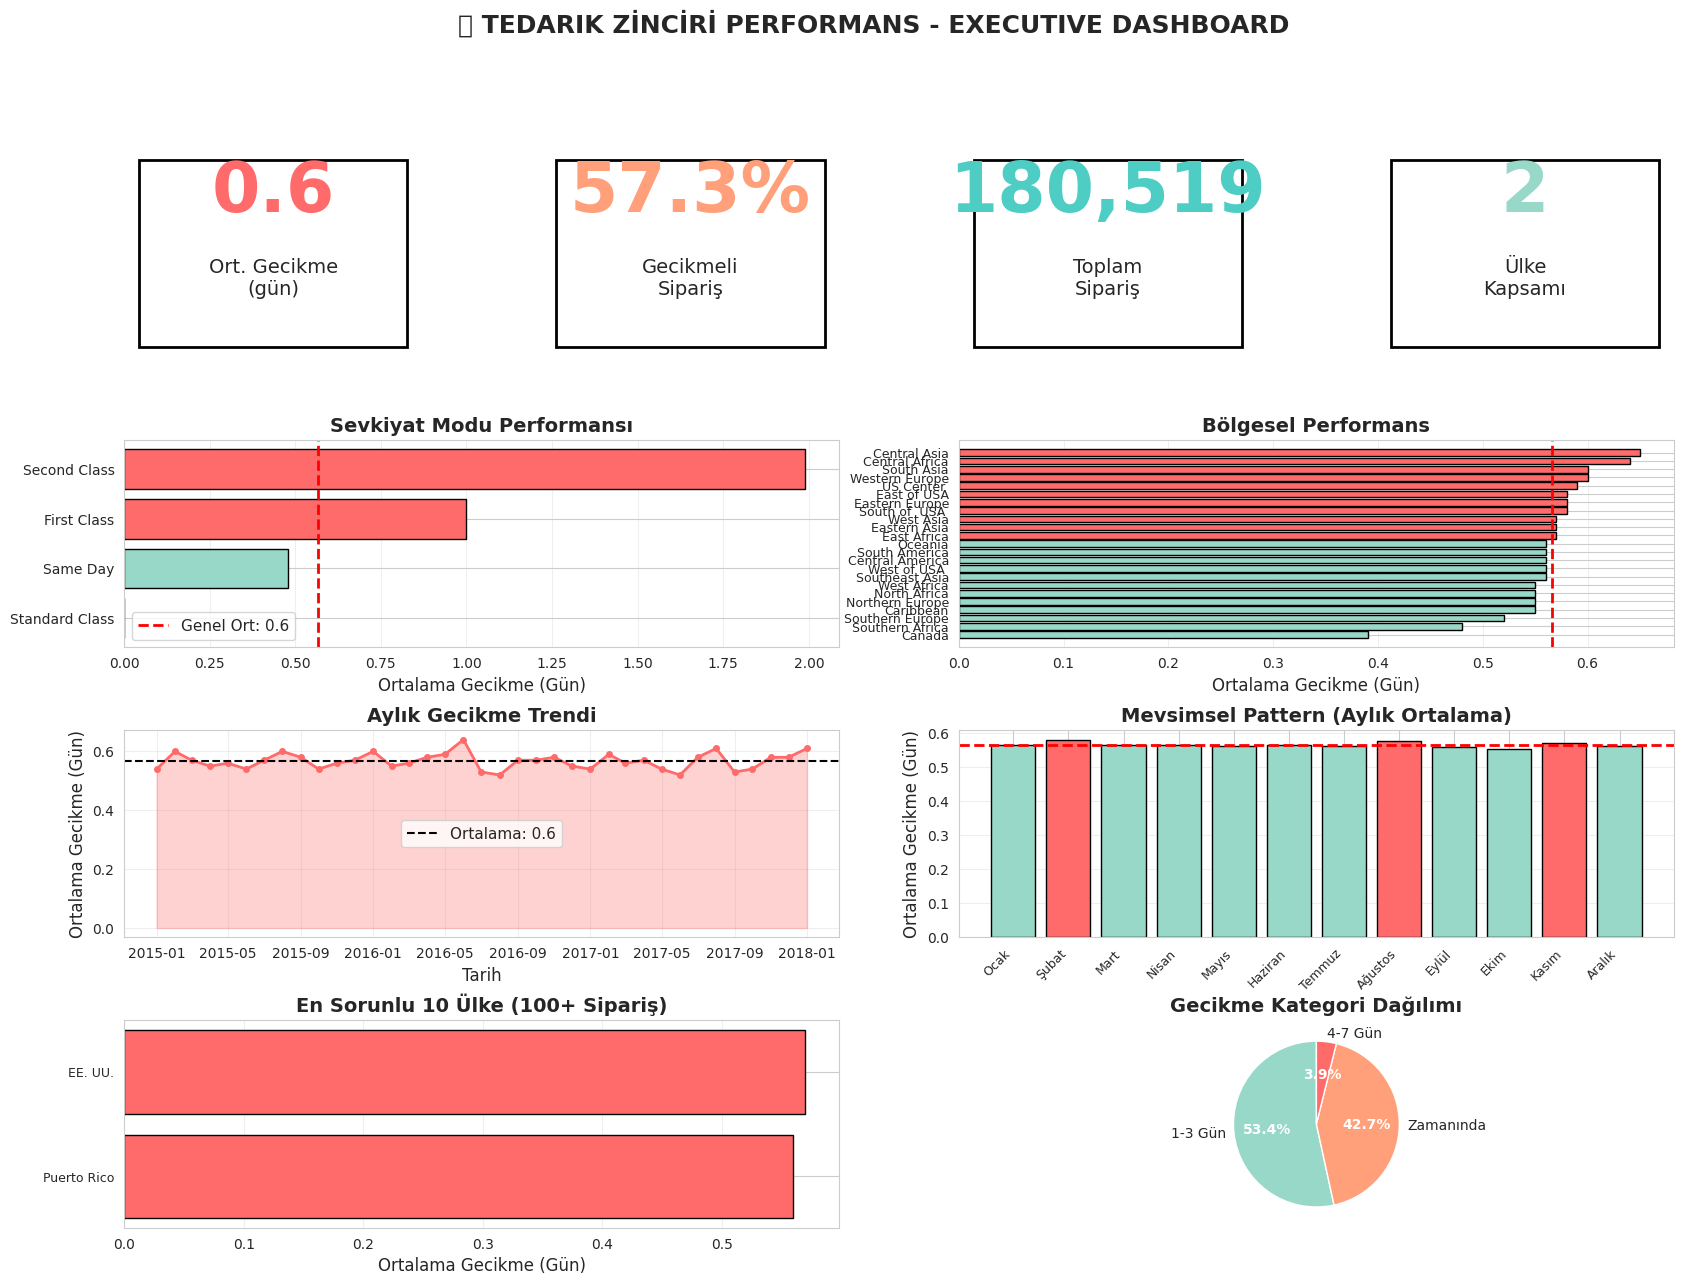


✅ Executive Dashboard oluşturuldu ve kaydedildi!


In [32]:
print("\n" + "="*80)
print("FINAL: ÖZET DASHBOARD OLUŞTURULUYOR...")
print("="*80)

# Mega dashboard - tüm önemli metrikleri tek sayfada
fig = plt.figure(figsize=(20, 14))
gs = fig.add_gridspec(4, 4, hspace=0.4, wspace=0.4)
fig.suptitle('🎯 TEDARIK ZİNCİRİ PERFORMANS - EXECUTIVE DASHBOARD',
             fontsize=18, fontweight='bold', y=0.98)

# Row 1: Ana metrikler (KPI kartları)
ax1 = fig.add_subplot(gs[0, 0])
ax1.text(0.5, 0.7, f'{avg_delay:.1f}', fontsize=50, fontweight='bold',
        ha='center', color='#FF6B6B')
ax1.text(0.5, 0.3, 'Ort. Gecikme\n(gün)', fontsize=14, ha='center')
ax1.set_xlim(0, 1)
ax1.set_ylim(0, 1)
ax1.axis('off')
ax1.add_patch(plt.Rectangle((0.05, 0.05), 0.9, 0.9, fill=False, edgecolor='black', linewidth=2))

ax2 = fig.add_subplot(gs[0, 1])
ax2.text(0.5, 0.7, f'{delayed_pct:.1f}%', fontsize=50, fontweight='bold',
        ha='center', color='#FFA07A')
ax2.text(0.5, 0.3, 'Gecikmeli\nSipariş', fontsize=14, ha='center')
ax2.set_xlim(0, 1)
ax2.set_ylim(0, 1)
ax2.axis('off')
ax2.add_patch(plt.Rectangle((0.05, 0.05), 0.9, 0.9, fill=False, edgecolor='black', linewidth=2))

ax3 = fig.add_subplot(gs[0, 2])
ax3.text(0.5, 0.7, f'{total_orders:,}', fontsize=50, fontweight='bold',
        ha='center', color='#4ECDC4')
ax3.text(0.5, 0.3, 'Toplam\nSipariş', fontsize=14, ha='center')
ax3.set_xlim(0, 1)
ax3.set_ylim(0, 1)
ax3.axis('off')
ax3.add_patch(plt.Rectangle((0.05, 0.05), 0.9, 0.9, fill=False, edgecolor='black', linewidth=2))

ax4 = fig.add_subplot(gs[0, 3])
ax4.text(0.5, 0.7, f'{unique_countries}', fontsize=50, fontweight='bold',
        ha='center', color='#98D8C8')
ax4.text(0.5, 0.3, 'Ülke\nKapsamı', fontsize=14, ha='center')
ax4.set_xlim(0, 1)
ax4.set_ylim(0, 1)
ax4.axis('off')
ax4.add_patch(plt.Rectangle((0.05, 0.05), 0.9, 0.9, fill=False, edgecolor='black', linewidth=2))

# Row 2: Sevkiyat modu + Bölgesel performans
ax5 = fig.add_subplot(gs[1, :2])
shipping_perf_sorted = shipping_perf.sort_values('Ort_Gecikme')
ax5.barh(range(len(shipping_perf_sorted)), shipping_perf_sorted['Ort_Gecikme'],
        color=['#98D8C8' if x < avg_delay else '#FF6B6B'
               for x in shipping_perf_sorted['Ort_Gecikme']], edgecolor='black')
ax5.set_yticks(range(len(shipping_perf_sorted)))
ax5.set_yticklabels(shipping_perf_sorted.index)
ax5.set_xlabel('Ortalama Gecikme (Gün)')
ax5.set_title('Sevkiyat Modu Performansı', fontweight='bold')
ax5.axvline(avg_delay, color='red', linestyle='--', linewidth=2, label=f'Genel Ort: {avg_delay:.1f}')
ax5.legend()
ax5.grid(True, alpha=0.3, axis='x')

ax6 = fig.add_subplot(gs[1, 2:])
region_perf_sorted = region_perf.sort_values('Ort_Gecikme')
ax6.barh(range(len(region_perf_sorted)), region_perf_sorted['Ort_Gecikme'],
        color=['#98D8C8' if x < avg_delay else '#FF6B6B'
               for x in region_perf_sorted['Ort_Gecikme']], edgecolor='black')
ax6.set_yticks(range(len(region_perf_sorted)))
ax6.set_yticklabels(region_perf_sorted.index, fontsize=9)
ax6.set_xlabel('Ortalama Gecikme (Gün)')
ax6.set_title('Bölgesel Performans', fontweight='bold')
ax6.axvline(avg_delay, color='red', linestyle='--', linewidth=2)
ax6.grid(True, alpha=0.3, axis='x')

# Row 3: Zaman trendi + Mevsimsellik
ax7 = fig.add_subplot(gs[2, :2])
ax7.plot(monthly_stats.index, monthly_stats['Ort_Gecikme'],
        linewidth=2, marker='o', markersize=4, color='#FF6B6B')
ax7.fill_between(monthly_stats.index, monthly_stats['Ort_Gecikme'],
                alpha=0.3, color='#FF6B6B')
ax7.axhline(avg_delay, color='black', linestyle='--', linewidth=1.5,
           label=f'Ortalama: {avg_delay:.1f}')
ax7.set_xlabel('Tarih')
ax7.set_ylabel('Ortalama Gecikme (Gün)')
ax7.set_title('Aylık Gecikme Trendi', fontweight='bold')
ax7.legend()
ax7.grid(True, alpha=0.3)

ax8 = fig.add_subplot(gs[2, 2:])
month_perf = df.groupby('month')['delay_days'].mean()
month_labels = [month_names_map[i] for i in range(1, 13)]
ax8.bar(range(12), [month_perf[i] for i in range(1, 13)],
       color=['#FF6B6B' if month_perf[i] > avg_delay else '#98D8C8' for i in range(1, 13)],
       edgecolor='black')
ax8.set_xticks(range(12))
ax8.set_xticklabels(month_labels, rotation=45, ha='right', fontsize=9)
ax8.set_ylabel('Ortalama Gecikme (Gün)')
ax8.set_title('Mevsimsel Pattern (Aylık Ortalama)', fontweight='bold')
ax8.axhline(avg_delay, color='red', linestyle='--', linewidth=2)
ax8.grid(True, alpha=0.3, axis='y')

# Row 4: Top sorunlu ülkeler + Gecikme dağılımı
ax9 = fig.add_subplot(gs[3, :2])
worst_10_countries = country_perf.nlargest(10, 'Ort_Gecikme')
ax9.barh(range(len(worst_10_countries)), worst_10_countries['Ort_Gecikme'],
        color='#FF6B6B', edgecolor='black')
ax9.set_yticks(range(len(worst_10_countries)))
ax9.set_yticklabels(worst_10_countries.index, fontsize=9)
ax9.set_xlabel('Ortalama Gecikme (Gün)')
ax9.set_title('En Sorunlu 10 Ülke (100+ Sipariş)', fontweight='bold')
ax9.invert_yaxis()
ax9.grid(True, alpha=0.3, axis='x')

ax10 = fig.add_subplot(gs[3, 2:])
delay_cat_counts = df['delay_category'].value_counts()
colors_pie = ['#98D8C8', '#FFA07A', '#FF6B6B', '#8B0000']
wedges, texts, autotexts = ax10.pie(delay_cat_counts, labels=delay_cat_counts.index,
       autopct='%1.1f%%', colors=colors_pie, startangle=90, textprops={'fontsize': 10})
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')
ax10.set_title('Gecikme Kategori Dağılımı', fontweight='bold')

plt.savefig('/content/drive/MyDrive/Data-Analyst-Portfolio/Project-1-Supply-Chain/dashboards/18_EXECUTIVE_DASHBOARD.png',
            dpi=300, bbox_inches='tight')
plt.show()

print("\n✅ Executive Dashboard oluşturuldu ve kaydedildi!")

In [33]:
# Satış rakamlarının genel yapısına ve para birimi sembolü olup olmadığına bakalım
print(df['sales'].describe())
print(df['sales'].head(10))

count    180519.000000
mean        203.772096
std         132.273077
min           9.990000
25%         119.980003
50%         199.919998
75%         299.950012
max        1999.989990
Name: sales, dtype: float64
0    327.75
1    327.75
2    327.75
3    327.75
4    327.75
5    327.75
6    327.75
7    327.75
8    327.75
9    327.75
Name: sales, dtype: float64


In [34]:
# Power BI'daki o büyük "T" harfinin nedenini anlamak için gerçek toplamı görelim
total_sales_raw = df['sales'].sum()
print(f"Gerçek Toplam Satış: {total_sales_raw:,.2f}")

Gerçek Toplam Satış: 36,784,735.01
